## Showing some very convenient features you can do with python

A guide towards using advanced Python features. You can increase
your development efficiency 50% by learning just the following few tricks...

## Example. How far can object flight...
### A basic implementation

Different kinds of airplanes
- Drone
- Glider
- AirbusPlane

In [1]:
class Drone:
    def __init__(self, x, y, v=200):
        self.x = x
        self.y = y
        self.v = v

class Glider:
    def __init__(self, x, y, v=100):
        self.x = x
        self.y = y
        self.v = v

class AirbusPlane:
    def __init__(self, x, y, v=500):
        self.x = x
        self.y = y
        self.v = v

In [2]:
plane1 = Drone(0, 500)
plane2 = Glider(0, 5000)
plane3 = AirbusPlane(0, 10000)

planes = [plane1, plane2, plane3]

In [3]:
print(planes)

[<__main__.Drone object at 0x10ec6a410>, <__main__.Glider object at 0x10ec6b390>, <__main__.AirbusPlane object at 0x10ec6a3d0>]


### Improvement 1.

1. Rewrite ```print()``` function (overwrite ```__repr__``` or ```__str__```)
2. Print one by one (basic for loop or list comprehension)
3. order plane by speed
4. order plane by speed (reverse order)
5. order plane by height
6. filter plane (speed must be >= 200 kph)

In [4]:
class Drone:
    def __init__(self, x, y, v=200):
        self.x = x
        self.y = y
        self.v = v
    def __repr__(self):
        c_name = self.__class__.__name__
        return f"{c_name} (x,y,v)=({self.x}, {self.y}, {self.v})"

class Glider:
    def __init__(self, x, y, v=100):
        self.x = x
        self.y = y
        self.v = v
    def __repr__(self):
        c_name = self.__class__.__name__
        return f"{c_name} (x,y,v)=({self.x}, {self.y}, {self.v})"

class AirbusPlane:
    def __init__(self, x, y, v=500):
        self.x = x
        self.y = y
        self.v = v
    def __repr__(self):
        c_name = self.__class__.__name__
        return f"{c_name} (x,y,v)=({self.x}, {self.y}, {self.v})"

In [5]:
plane1 = Drone(0, 20)
plane2 = Glider(0, 100)
plane3 = AirbusPlane(0, 200)

planes = [plane1, plane2, plane3]

In [6]:
for plane in planes:
    print(plane)

Drone (x,y,v)=(0, 20, 200)
Glider (x,y,v)=(0, 100, 100)
AirbusPlane (x,y,v)=(0, 200, 500)


In [7]:
# the list know how to print item by item
print(planes)

[Drone (x,y,v)=(0, 20, 200), Glider (x,y,v)=(0, 100, 100), AirbusPlane (x,y,v)=(0, 200, 500)]


In [8]:
# task: sort by their height
def order_by_height(obj):
    return obj.y

print(sorted(planes, key=order_by_height))

[Drone (x,y,v)=(0, 20, 200), Glider (x,y,v)=(0, 100, 100), AirbusPlane (x,y,v)=(0, 200, 500)]


In [9]:
sorted(planes, key=lambda obj: obj.y)

[Drone (x,y,v)=(0, 20, 200),
 Glider (x,y,v)=(0, 100, 100),
 AirbusPlane (x,y,v)=(0, 200, 500)]

In [10]:
sorted(planes, key=lambda obj: obj.y, reverse=True)

[AirbusPlane (x,y,v)=(0, 200, 500),
 Glider (x,y,v)=(0, 100, 100),
 Drone (x,y,v)=(0, 20, 200)]

In [11]:
sorted(planes, key=lambda obj: obj.y)[::-1]

[AirbusPlane (x,y,v)=(0, 200, 500),
 Glider (x,y,v)=(0, 100, 100),
 Drone (x,y,v)=(0, 20, 200)]

### Improvement 2. Use Inheritence

drone/glider/airplane are all similar in terms of data and methods. 
So, let's create a parent class to make those formats a standard...
- create parent class ```class plane```
- three subclasses inherients from ```class plane```
- add new function a ranking function

Don't Repeat Yourself (DRY) principle

In [12]:
# parent class
class Plane:
    def __init__(self, x, y, v):
        self.x = x
        self.y = y
        self.v = v
    def __repr__(self):
        c_name = self.__class__.__name__
        return f"{c_name} (x,y,v)=({self.x}, {self.y}, {self.v})"


class Drone(Plane):
    def __init__(self, x, y, v=200):
        super().__init__(x, y, x)

class Glider(Plane):
    def __init__(self, x, y, v=100):
        super().__init__(x, y, x)

class AirbusPlane(Plane):
    def __init__(self, x, y, v=500):
        super().__init__(x, y, x)


In [13]:
plane1 = Drone(0, 20)
plane2 = Glider(0, 100)
plane3 = AirbusPlane(0, 200)

planes = [plane1, plane2, plane3]

In [14]:
print(planes)

[Drone (x,y,v)=(0, 20, 0), Glider (x,y,v)=(0, 100, 0), AirbusPlane (x,y,v)=(0, 200, 0)]


In [15]:
# try to order planes (not successful)
sorted(planes)

TypeError: '<' not supported between instances of 'Glider' and 'Drone'

### Improvement 3. Compare objects

More functions that can be overwrite...
- overwrite ```__eq__``` to compare if two objects are equal
- overwrite ```__lt__``` to compare if two this object is (<) the other object

In [16]:
# parent class
class Plane(object):
    def __init__(self, x, y, v):
        self.x = x
        self.y = y
        self.v = v
    
    def __repr__(self):
        c_name = self.__class__.__name__
        return f"{c_name} (x,y,v)=({self.x}, {self.y}, {self.v})"
    
    def __eq__(self, other):
        flag = (self.x == other.x) and (self.y == other.y) and (self.v == other.v)
        return flag
    
    def __lt__(self, other):
        # let's compare by speed
        if self.v < other.v:
            return True
        return False


class Drone(Plane):
    def __init__(self, x, y, v=200):
        super().__init__(x, y, v)

class Glider(Plane):
    def __init__(self, x, y, v=100):
        super().__init__(x, y, v)

class AirbusPlane(Plane):
    def __init__(self, x, y, v=500):
        super().__init__(x, y, v)

In [17]:
plane1 = Drone(0, 20)
plane2 = Glider(0, 100)
plane3 = AirbusPlane(0, 200)

planes = [plane1, plane2, plane3]
print(planes)

[Drone (x,y,v)=(0, 20, 200), Glider (x,y,v)=(0, 100, 100), AirbusPlane (x,y,v)=(0, 200, 500)]


In [18]:
# try to order planes by speed (this time successful)
sorted(planes)

[Glider (x,y,v)=(0, 100, 100),
 Drone (x,y,v)=(0, 20, 200),
 AirbusPlane (x,y,v)=(0, 200, 500)]

### Improvement 4. personalization

Up until now, three subclasses are different, but in fact they are not
- Drone: have an extra battery variable from 0-100 in percentage; cannot glide when there is no power
- Glider: no power; can glide a long distance
- Airbus: have an extra gas variable from 0-100 in percentage; can glide a bit is powered off.


In [19]:
class Drone(Plane):
    def __init__(self, x, y, v=200):
        super().__init__(x, y, v)
        self.decline_rate = 0
        self.battery = 100
        self.battery_per_km = 1
    
    def get_x_max(self):
        travel_dist = (self.battery / self.battery_per_km)
        return self.x + travel_dist


class Glider(Plane):
    def __init__(self, x, y, v=100):
        super().__init__(x, y, v)
        self.decline_rate = 0.05  # decline 1 meter, glide 20 meters
        
    def get_x_max(self):
        return self.x + self.y / self.decline_rate / 1000


class AirbusPlane(Plane):
    def __init__(self, x, y, v=500):
        super().__init__(x, y, v)
        self.decline_rate = 0.1  # decline 1 meter, glide 10 meters
        self.gas = 100
        self.gas_per_km = 2
    
    def get_x_max(self):
        travel_dist_gas = self.gas / self.gas_per_km
        travel_dist_glide = self.y / self.decline_rate / 1000
        return self.x + travel_dist_gas + travel_dist_glide

In [20]:
plane1 = Drone(0, 200)
plane2 = Glider(0, 5000)
plane3 = AirbusPlane(0, 10_000)

planes = [plane1, plane2, plane3]
print(planes)

[Drone (x,y,v)=(0, 200, 200), Glider (x,y,v)=(0, 5000, 100), AirbusPlane (x,y,v)=(0, 10000, 500)]


In [21]:
dists_x_max = [plane.get_x_max() for plane in planes]
print(dists_x_max)

[100.0, 100.0, 150.0]


### Improvement 4. class varialbles, copy vs deepcopy
- Create a function to randomly generates planes (e.g., random planes)
- count number of planes created (using class variables)


In [22]:
# parent class
class Plane(object):
    num_planes = 0
    def __init__(self, x, y, v):
        self.x = x
        self.y = y
        self.v = v
        Plane.num_planes += 1
    
    def __repr__(self):
        c_name = self.__class__.__name__
        return f"{c_name} (x,y,v)=({self.x}, {self.y}, {self.v})"
    
    def __eq__(self, other):
        flag = (self.x == other.x) and (self.y == other.y) and (self.v == other.v)
        return flag
    
    def __lt__(self, other):
        # let's compare by speed
        if self.v < other.v:
            return True
        return False


class Drone(Plane):
    num_drones = 0
    def __init__(self, x, y, v=50):
        super().__init__(x, y, v)
        self.decline_rate = 0
        self.battery = 100
        self.battery_per_km = 10
        Drone.num_drones += 1
    
    def get_x_max(self):
        travel_dist = (self.battery / self.battery_per_km)
        return self.x + travel_dist
    
    def has_fuel(self):
        if self.battery > 0:
            return True
        return False


class Glider(Plane):
    num_gliders = 0
    def __init__(self, x, y, v=100):
        super().__init__(x, y, v)
        self.decline_rate = 5  # decline 1 meter, glide 5 meters
        Glider.num_gliders += 1
        
    def get_x_max(self):
        return self.x + self.y / self.decline_rate
    
    def has_fuel(self):
        return False  # no power all the time

class AirbusPlane(Plane):
    num_airbus = 0
    def __init__(self, x, y, v=500):
        super().__init__(x, y, v)
        self.decline_rate = 2  # decline 1 meter, glide 2 meter
        self.gas = 100
        self.gas_per_km = 10
        AirbusPlane.num_airbus += 1
    
    def get_x_max(self):
        travel_dist_gas = self.gas / self.gas_per_km
        travel_dist_glide = self.y / self.decline_rate
        return self.x + travel_dist_gas + travel_dist_glide
    
    def has_fuel(self):
        if self.gas > 0:
            return True
        return False

In [23]:
# here random is default package of Python
# you may prefer to use numpy (a third-party package) for this kind of tasks...
import random

def generates_n_planes(n):
    # 0 for drone, 1 for glider, 2 for airbus
    indices = [random.randint(0, 2) for _ in range(n)]
    
    # create objects
    planes = []
    for ind in indices:
        if ind == 0:
            p = Drone(0, random.gauss(mu=100, sigma=5.0))
        elif ind == 1:
            p = Glider(0, random.gauss(mu=1000, sigma=5.0))
        else:
            p = AirbusPlane(0, random.gauss(mu=5000, sigma=5.0))
        planes.append(p)
    
    return planes

In [24]:
# randomly generates 100 planes
planes100 = generates_n_planes(n=100)
print(planes100)

[AirbusPlane (x,y,v)=(0, 4995.764003335938, 500), AirbusPlane (x,y,v)=(0, 5005.320379047816, 500), Glider (x,y,v)=(0, 999.9418664379136, 100), AirbusPlane (x,y,v)=(0, 4986.062267584852, 500), Glider (x,y,v)=(0, 992.3385932061888, 100), AirbusPlane (x,y,v)=(0, 5001.4093064656345, 500), AirbusPlane (x,y,v)=(0, 5002.394554269658, 500), Glider (x,y,v)=(0, 997.0238028068817, 100), Drone (x,y,v)=(0, 97.31612672208925, 50), AirbusPlane (x,y,v)=(0, 4991.965460695491, 500), Glider (x,y,v)=(0, 1001.4333336520305, 100), AirbusPlane (x,y,v)=(0, 5003.280655595449, 500), AirbusPlane (x,y,v)=(0, 4998.659281866065, 500), AirbusPlane (x,y,v)=(0, 5003.965827319147, 500), AirbusPlane (x,y,v)=(0, 5004.631140663797, 500), AirbusPlane (x,y,v)=(0, 4995.679741463009, 500), Drone (x,y,v)=(0, 98.86663057231937, 50), Glider (x,y,v)=(0, 1002.4901391270353, 100), Drone (x,y,v)=(0, 102.56414760888697, 50), Drone (x,y,v)=(0, 94.1761942581055, 50), AirbusPlane (x,y,v)=(0, 4999.097599862387, 500), Drone (x,y,v)=(0, 94

In [25]:
print(f"Total number of planes: {Plane.num_planes}")
print(f"Total number of drones: {Drone.num_drones}")
print(f"Total number of gliders: {Glider.num_gliders}")
print(f"Total number of airbus: {AirbusPlane.num_airbus}")

Total number of planes: 100
Total number of drones: 26
Total number of gliders: 33
Total number of airbus: 41


## Congratulations!

If you can understand the concepts about, you can write flexible Python code efficienctly (+50% efficiency). 

Two books I recommend:
- Fluent Python 《流畅的Python》
- Effective Python

In the book, there are more similar concepts.
1. Use of abc module
2. Use of collection module
3. Context Manager (with command)
4. Use of decorator

However, since Python becomes too dynamic, it might be hard to develop in long term. Thus, there are many efforts to make the language suitable for large scale development, especially in large companies.

1. Goose typing (also use abc)
2. Linter (type hint)
3. meta-programming
4. multi-processing (3 major strategies)


## Let's continue the journey...

As mentioned, there are still many other good syntax/properties that can be leveraged. Let's finish the demo project for completeness.

## Improvement 5. Use abstract method
abc is very important tool in Python for class inheritence, standardization etc.
The meaning of abc is: **Abstract Base Class**.

- Subclass of Plane **must** implement two methods
    - 
    - has_fuel: whether there is left fuel?
    - is_on_ground: is the plane falled on ground already?

We can use abc to write abstract methods in the parent classes. 
All child classes must inherient and implement this method.


In [26]:
from abc import ABC, abstractmethod

# parent class
class Plane(ABC):
    def __init__(self, x, y, v):
        self.x = x
        self.y = y
        self.v = v
    
    def __repr__(self):
        c_name = self.__class__.__name__
        return f"{c_name} (x,y,v)=({self.x}, {self.y}, {self.v})"
    
    def __eq__(self, other):
        flag = (self.x == other.x) and (self.y == other.y) and (self.v == other.v)
        return flag
    
    def __lt__(self, other):
        # let's compare by speed
        if self.v < other.v:
            return True
        return False
    
    # create abstract methods for subclasses to implement
    @abstractmethod
    def get_x_max(self):
        pass
    
    @abstractmethod
    def has_fuel(self):
        pass
    
    @abstractmethod
    def is_on_ground(self):
        pass


class Drone(Plane):
    num_drones = 0
    def __init__(self, x, y, v=50):
        super().__init__(x, y, v)
        self.decline_rate = 0
        self.battery = 100
        self.battery_per_km = 10
        Drone.num_drones += 1
    
    def get_x_max(self):
        travel_dist = (self.battery / self.battery_per_km)
        return self.x + travel_dist
    
    def has_fuel(self):
        if self.battery > 0:
            return True
        return False


class Glider(Plane):
    num_gliders = 0
    def __init__(self, x, y, v=100):
        super().__init__(x, y, v)
        self.decline_rate = 20  # decline 1 meter, glide 20 meters
        Glider.num_gliders += 1
        
    def get_x_max(self):
        return self.x + self.y / self.decline_rate
    
    def has_fuel(self):
        return False  # no power all the time


class AirbusPlane(Plane):
    num_airbus = 0
    def __init__(self, x, y, v=500):
        super().__init__(x, y, v)
        self.decline_rate = 10  # decline 1 meter, glide 10 meters
        self.gas = 100
        self.gas_per_km = 10
        AirbusPlane.num_airbus += 1
    
    def get_x_max(self):
        travel_dist_gas = self.gas / self.gas_per_km
        travel_dist_glide = self.y / self.decline_rate
        return self.x + travel_dist_gas + travel_dist_glide
    
    def has_fuel(self):
        if self.gas > 0:
            return True
        return False

In [27]:
# we forget to implement is_on_ground method...
plane1 = Drone(0, 100)
plane2 = Glider(0, 1000)
plane3 = AirbusPlane(0, 5000)

planes = [plane1, plane2, plane3]
print(planes)

TypeError: Can't instantiate abstract class Drone with abstract method is_on_ground

In [28]:
class Drone(Plane):
    num_drones = 0
    def __init__(self, x, y, v=50):
        super().__init__(x, y, v)
        self.decline_rate = 0
        self.battery = 100
        self.battery_per_km = 10
        Drone.num_drones += 1
    
    def get_x_max(self):
        travel_dist = (self.battery / self.battery_per_km)
        return self.x + travel_dist
    
    def has_fuel(self):
        if self.battery > 0:
            return True
        return False
    
    def is_on_ground(self):
        if self.y <= 0 :
            return True
        return False


class Glider(Plane):
    num_gliders = 0
    def __init__(self, x, y, v=100):
        super().__init__(x, y, v)
        self.decline_rate = 20  # decline 1 meter, glide 20 meters
        Glider.num_gliders += 1
        
    def get_x_max(self):
        return self.x + self.y / self.decline_rate
    
    def has_fuel(self):
        return False  # no power all the time
    
    def is_on_ground(self):
        if self.y <= 0 :
            return True
        return False


class AirbusPlane(Plane):
    num_airbus = 0
    def __init__(self, x, y, v=500):
        super().__init__(x, y, v)
        self.decline_rate = 10  # decline 1 meter, glide 10 meters
        self.gas = 100
        self.gas_per_km = 10
        AirbusPlane.num_airbus += 1
    
    def get_x_max(self):
        travel_dist_gas = self.gas / self.gas_per_km
        travel_dist_glide = self.y / self.decline_rate
        return self.x + travel_dist_gas + travel_dist_glide
    
    def has_fuel(self):
        if self.gas > 0:
            return True
        return False
    
    def is_on_ground(self):
        if self.y <= 0 :
            return True
        return False

In [29]:
# this time, we can init the objects
plane1 = Drone(0, 100)
plane2 = Glider(0, 1000)
plane3 = AirbusPlane(0, 5000)

planes = [plane1, plane2, plane3]
print(planes)

[Drone (x,y,v)=(0, 100, 50), Glider (x,y,v)=(0, 1000, 100), AirbusPlane (x,y,v)=(0, 5000, 500)]


## Improvement 6. Try to add getters and setters
Sometimes, it is reasonable to masks information use getters and setters.
This is similar to Java's getters and setters.
Directly access a varible in object is possible, but you can add more logic 
by using getters and setters...

Tasks:
- Let's change is_on_ground as a property.
- Implement is_on_ground's getters and setters...

In [30]:
from abc import ABC, abstractmethod

# parent class
class Plane(ABC):
    def __init__(self, x, y, v):
        self.x = x
        self.y = y
        self.v = v
    
    def __repr__(self):
        c_name = self.__class__.__name__
        return f"{c_name} (x,y,v)=({self.x}, {self.y}, {self.v})"
    
    def __eq__(self, other):
        flag = (self.x == other.x) and (self.y == other.y) and (self.v == other.v)
        return flag
    
    def __lt__(self, other):
        # let's compare by speed
        if self.v < other.v:
            return True
        return False
    
    # create abstract methods for subclasses to implement
    @abstractmethod
    def get_x_max(self):
        pass
    
    @abstractmethod
    def has_fuel(self):
        pass
    
    @property
    def is_on_ground(self):
        if self.y <= 0 :
            return True
        return False
    
    @is_on_ground.setter
    def is_on_ground(self, on_ground):
        # if on ground, set speed and height to zero also
        if on_ground is True:
            self.y = 0
            self.v = 0
        else:  # try to set is False
            if self.is_on_ground is True:
                raise ValueError("Currently, on ground planes cannot set to take off.")


class Drone(Plane):
    num_drones = 0
    def __init__(self, x, y, v=50):
        super().__init__(x, y, v)
        self.decline_rate = 0
        self.battery = 100
        self.battery_per_km = 10
        Drone.num_drones += 1
    
    def get_x_max(self):
        travel_dist = (self.battery / self.battery_per_km)
        return self.x + travel_dist
    
    def has_fuel(self):
        if self.battery > 0:
            return True
        return False


class Glider(Plane):
    num_gliders = 0
    def __init__(self, x, y, v=100):
        super().__init__(x, y, v)
        self.decline_rate = 20  # decline 1 meter, glide 20 meters
        Glider.num_gliders += 1
        
    def get_x_max(self):
        return self.x + self.y / self.decline_rate
    
    def has_fuel(self):
        return False  # no power all the time


class AirbusPlane(Plane):
    num_airbus = 0
    def __init__(self, x, y, v=500):
        super().__init__(x, y, v)
        self.decline_rate = 10  # decline 1 meter, glide 10 meter
        self.gas = 100
        self.gas_per_km = 10
        AirbusPlane.num_airbus += 1
    
    def get_x_max(self):
        travel_dist_gas = self.gas / self.gas_per_km
        travel_dist_glide = self.y / self.decline_rate
        return self.x + travel_dist_gas + travel_dist_glide
    
    def has_fuel(self):
        if self.gas > 0:
            return True
        return False

In [31]:
# this time, it works...
# this is how you control the methods to be implemented...
plane1 = Drone(0, 100)
plane2 = Glider(0, 1000)
plane3 = AirbusPlane(0, 5000)
plane4 = AirbusPlane(0, 0)
plane5 = AirbusPlane(0, -10)

planes = [plane1, plane2, plane3, plane4, plane5]
print(planes)

[Drone (x,y,v)=(0, 100, 50), Glider (x,y,v)=(0, 1000, 100), AirbusPlane (x,y,v)=(0, 5000, 500), AirbusPlane (x,y,v)=(0, 0, 500), AirbusPlane (x,y,v)=(0, -10, 500)]


In [32]:
[plane.is_on_ground for plane in planes]

[False, False, False, True, True]

In [33]:
# let's put all planes to the sky
# currently, this is not supported
for plane in planes:
    plane.is_on_ground=False

[plane.is_on_ground for plane in planes]

ValueError: Currently, on ground planes cannot set to take off.

In [34]:
# let's put all planes to the ground
for plane in planes:
    plane.is_on_ground=True

# all planes are on ground now...
[plane.is_on_ground for plane in planes]

[True, True, True, True, True]

## The final version (to make it more complete)
- has_fuel is also a property. We need to implement the getter (just add @property decorator)
- let's change the power loss to percent per minute (instead of percent per km)
- let's remove the get_x_max function

In [35]:
from abc import ABC, abstractmethod

# parent class
class Plane(ABC):
    def __init__(self, x, y, v):
        self.x = x
        self.y = y
        self.v = v
    
    def __repr__(self):
        c_name = self.__class__.__name__
        return f"{c_name} (x,y,v)=({self.x}, {self.y}, {self.v})"
    
    def __eq__(self, other):
        flag = (self.x == other.x) and (self.y == other.y) and (self.v == other.v)
        return flag
    
    def __lt__(self, other):
        if self.v < other.v:
            return True
        return False
    
    # create abstract methods for subclasses to implement
    @abstractmethod
    def has_fuel(self):
        pass
    
    @abstractmethod
    def fly_by_hours(self, dt):
        pass
    
    @property
    def is_on_ground(self):
        if self.y <= 0 :
            return True
        return False
    
    @is_on_ground.setter
    def is_on_ground(self, on_ground):
        # if on ground, set speed and height to zero also
        if on_ground is True:
            self.y = 0
            self.v = 0
        else:  # try to set is False
            if self.is_on_ground is True:
                raise ValueError("Currently, on ground planes cannot set to take off.")


class Drone(Plane):
    num_drones = 0
    def __init__(self, x, y, v=200):
        super().__init__(x, y, v)
        self.battery = 100
        self.battery_per_km = 1
        Drone.num_drones += 1
    
    @property
    def has_fuel(self):
        if self.battery > 0:
            return True
        return False
    
    def fly_by_hours(self, dt):
        if self.is_on_ground:
            return True
        
        # update position
        if self.has_fuel:
            dx = self.v * dt
            dy = 0
            self.x += dx
            self.y += dy
            # update fuel
            self.battery -= (self.battery_per_km * dx)
        else:  # no fuel, just let it fall on ground
            self.is_on_ground = True
        return True


class Glider(Plane):
    num_gliders = 0
    def __init__(self, x, y, v=100):
        super().__init__(x, y, v)
        self.decline_rate = 0.05  # decline 1 meter, glide 20 meters
        Glider.num_gliders += 1
    
    @property
    def has_fuel(self):
        return False  # no power all the time
    
    def fly_by_hours(self, dt):
        if self.is_on_ground:
            return True
        dx = self.v * dt
        dy = -self.v * 1000 * self.decline_rate * dt
        
        self.x += dx
        self.y += dy
        return True


class AirbusPlane(Plane):
    num_airbus = 0
    def __init__(self, x, y, v=500):
        super().__init__(x, y, v)
        self.decline_rate = 0.1  # decline 1 meter, glide 10 meter
        self.gas = 100
        self.gas_per_km = 2
        AirbusPlane.num_airbus += 1
    
    @property
    def has_fuel(self):
        if self.gas > 0:
            return True
        return False
    
    def fly_by_hours(self, dt):
        if self.is_on_ground:
            return True
        
        if self.has_fuel:
            dx = self.v * dt
            dy = 0
        else:  # no fuel, let it glide
            dx = self.v * dt
            dy = -self.v * 1000 * self.decline_rate * dt
        
        self.x += dx
        self.y += dy
        # update fuel
        self.gas -= (self.gas_per_km * dx)
        return True

### Let's make this example a complete simulation
- plot planes position given a time
- write a simulation driver
- plot planes positions over time (minute by minute)
- make it an animation

In [98]:
import matplotlib.pyplot as plt

def plot_plane_position(planes, ax=None, t=0):
    plane_colors = {
        "Drone": "red",
        "Glider": "green",
        "AirbusPlane": "blue",
    }
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(7.5, 2.5), dpi=200)
    
    for plane in planes:
        cls_name = plane.__class__.__name__
        c = plane_colors[cls_name]
        ax.plot(plane.x, plane.y, 'o', color=c, label=f"{cls_name}")
    
    ax.set_ylim(-100, 12000)
    ax.set_xlim(-10, 200)
    ax.legend(prop={'size': 10})
    ax.set_xlabel("km")
    ax.set_ylabel("m")
    ax.annotate(text=f"t={int(t):03d} minute", xy=(0.5, 0.9), xycoords='figure fraction')
    return ax

In [99]:
# this time, it works...
# this is how you control the methods to be implemented...
plane1 = Drone(0, 500)
plane2 = Glider(0, 5000)
plane3 = AirbusPlane(0, 10000)

planes = [plane1, plane2, plane3]
print(planes)

[Drone (x,y,v)=(0, 500, 200), Glider (x,y,v)=(0, 5000, 100), AirbusPlane (x,y,v)=(0, 10000, 500)]


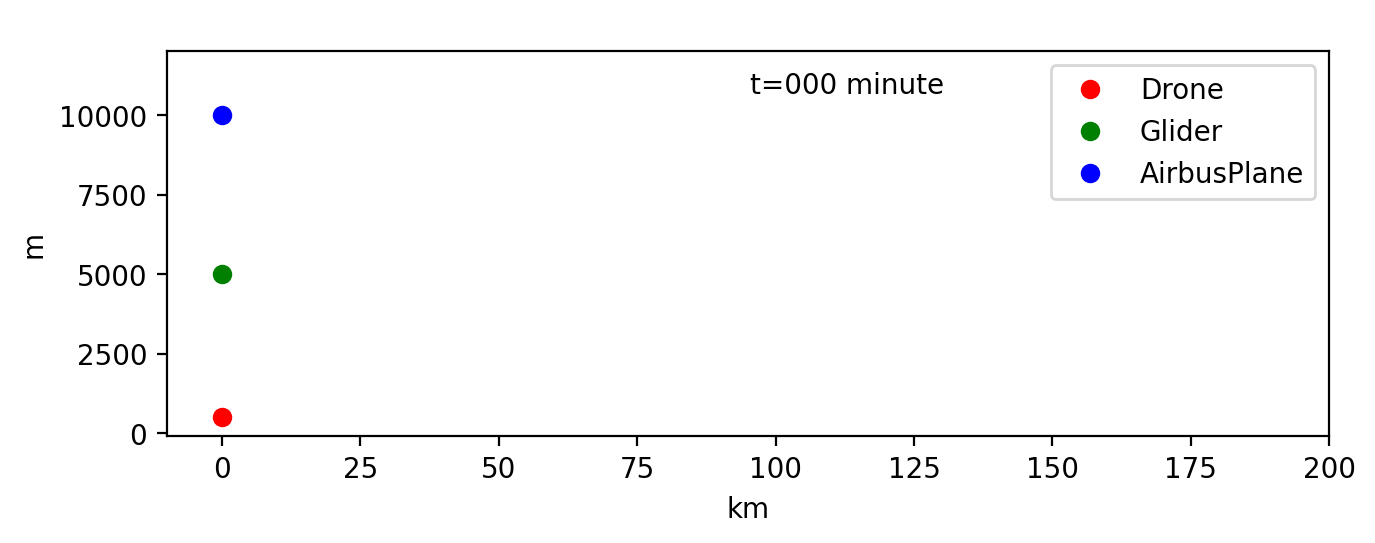

In [100]:
plot_plane_position(planes)

plt.show()

In [101]:
# the simulation driver
class Simulator:
    def __init__(self, planes):
        self.t = 0  # the clock in minutes
        self.planes = planes
        self.planes_trajectories = []
    
    def update_planes(self, planes, dt=0.01):
        for plane in planes:
            plane.fly_by_hours(dt=dt)
    
    def all_planes_on_ground(self, planes):
        flag = True
        for plane in planes:
            flag = flag & plane.is_on_ground
        return flag
    
    def run_sim(self):
        # run simulation until all planes on ground
        while True:
            # print(f"Simulation time: {self.t}")
            # # let's plot plane's position at time t...
            plot_plane_position(planes, t=self.t / 100 * 60)
            plt.savefig(f"figs/fig_{self.t:03}")
            self.planes_trajectories.append([(plane.x, plane.y, plane.v) for plane in self.planes])
            
            self.update_planes(self.planes)
            
            self.t += 1
            if self.all_planes_on_ground(self.planes):
                print("all planes on ground now")
                break
        print(f"Simulation time: {self.t}")

/var/folders/71/d5xhvtkn215cb3g26qsjh5q00000gn/T/ipykernel_24485/8358378.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(7.5, 2.5), dpi=200)


all planes on ground now
Simulation time: 100


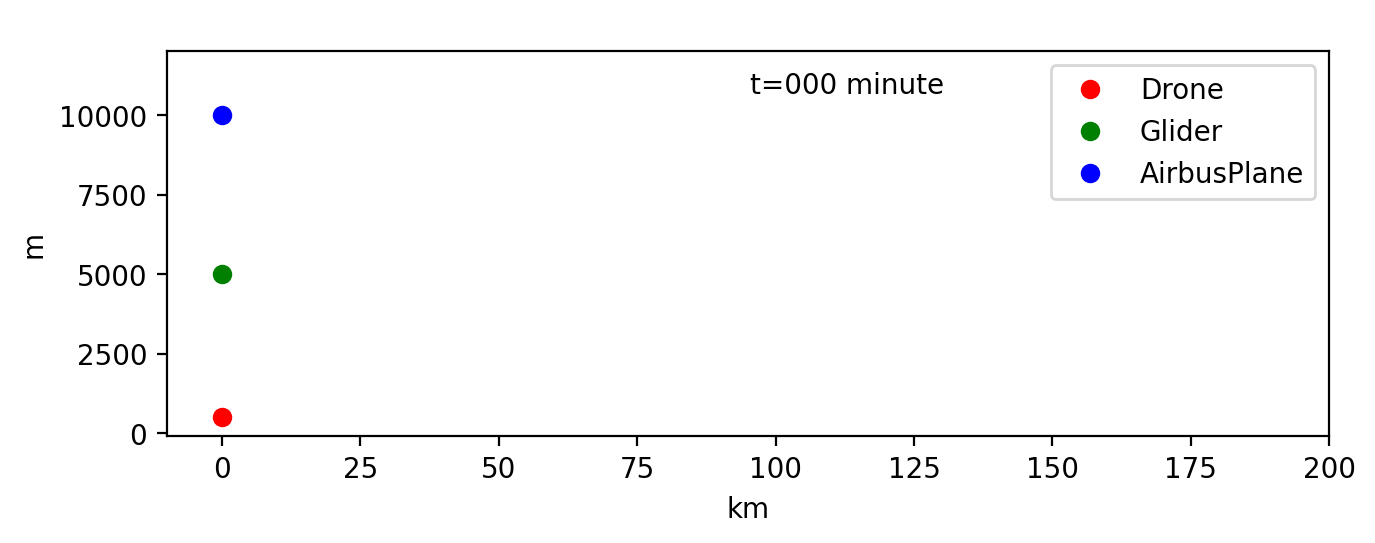

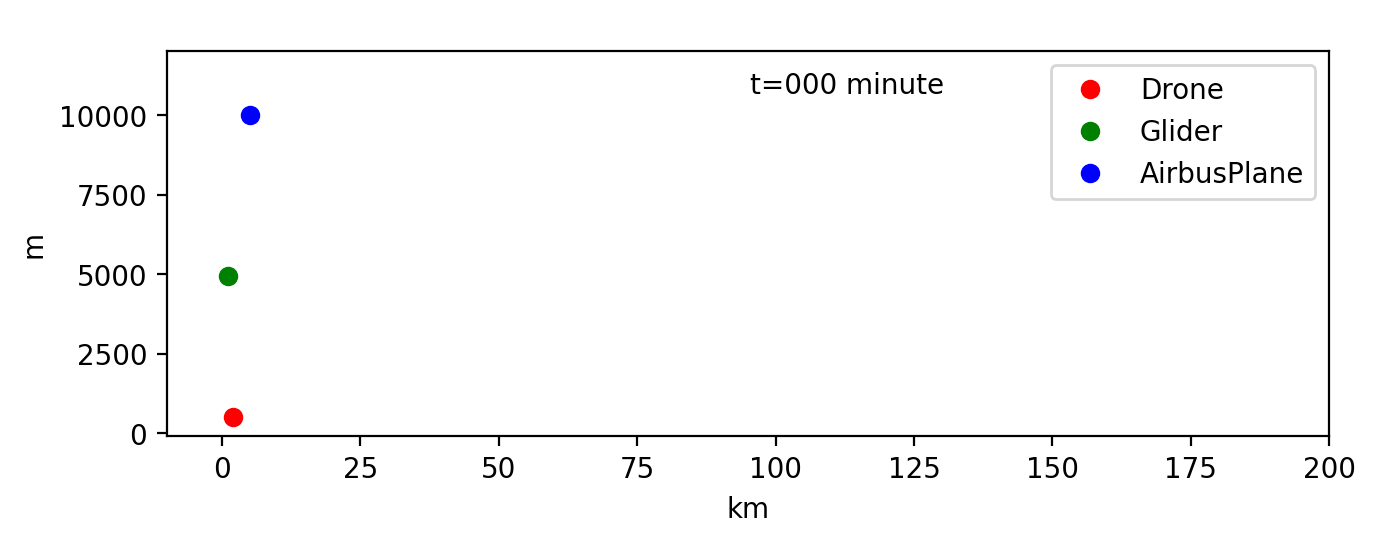

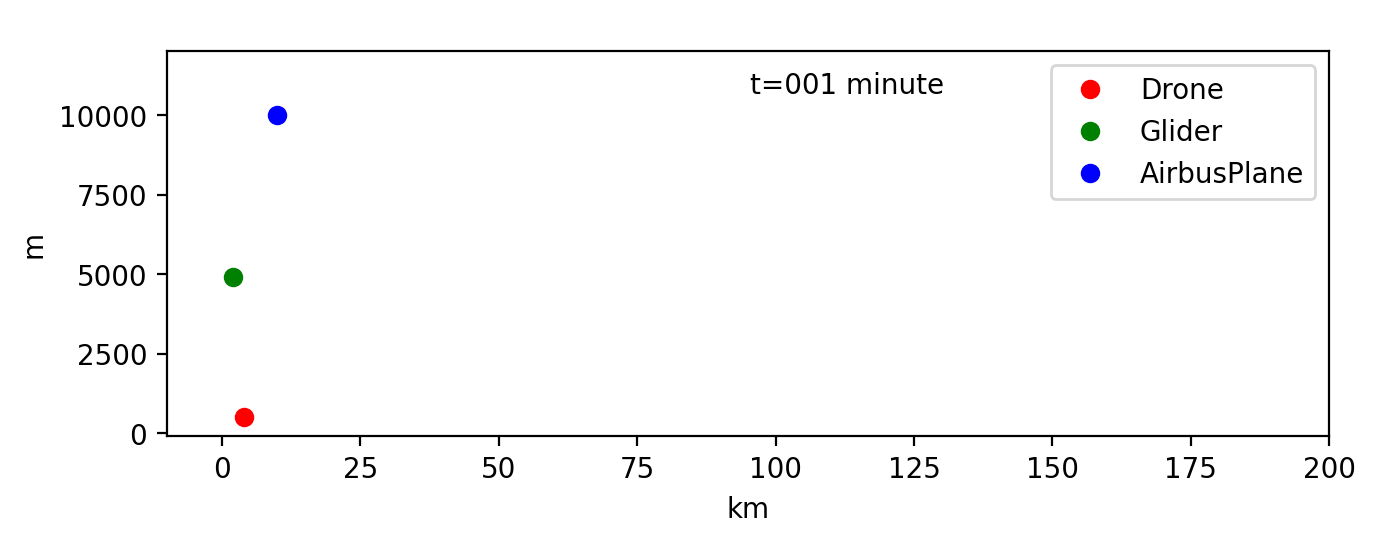

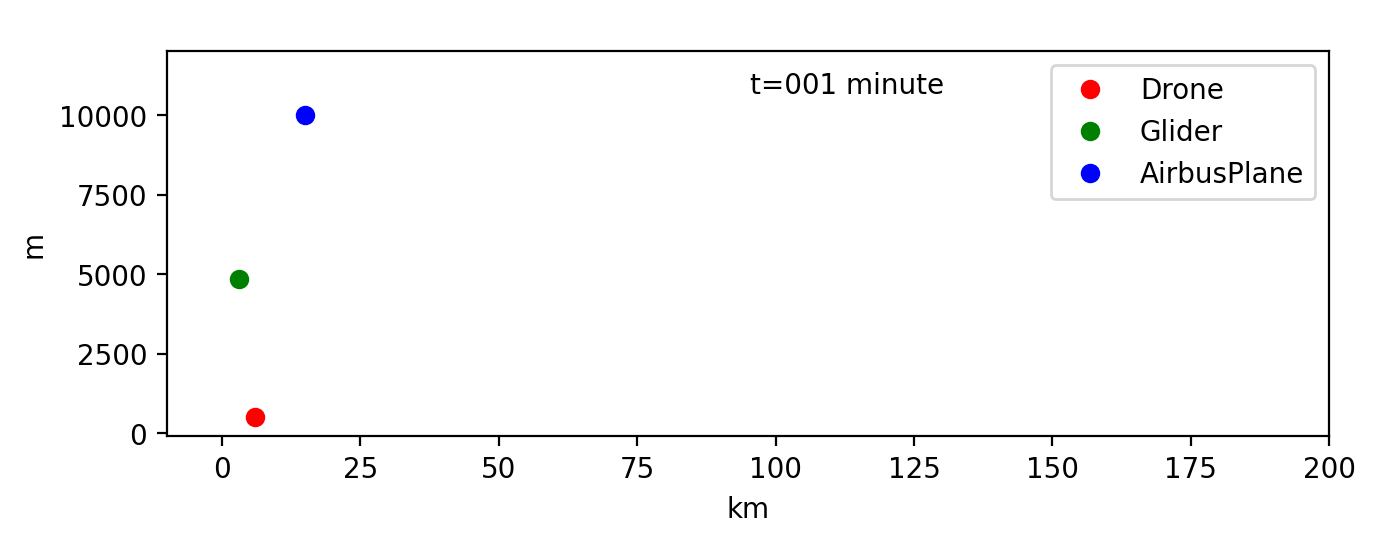

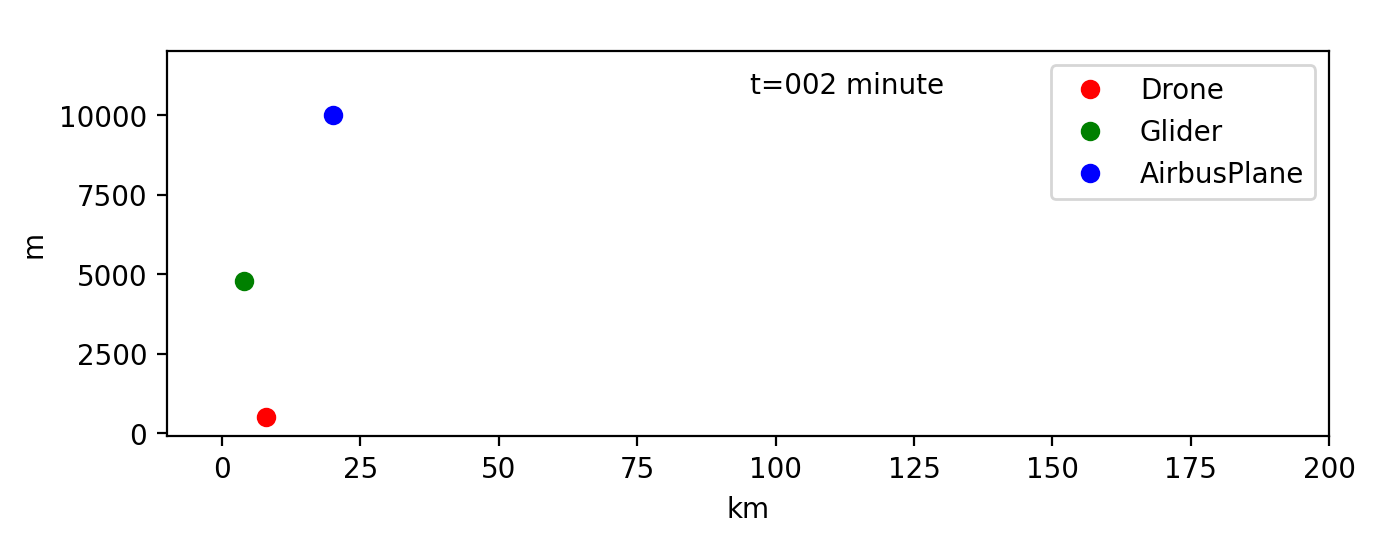

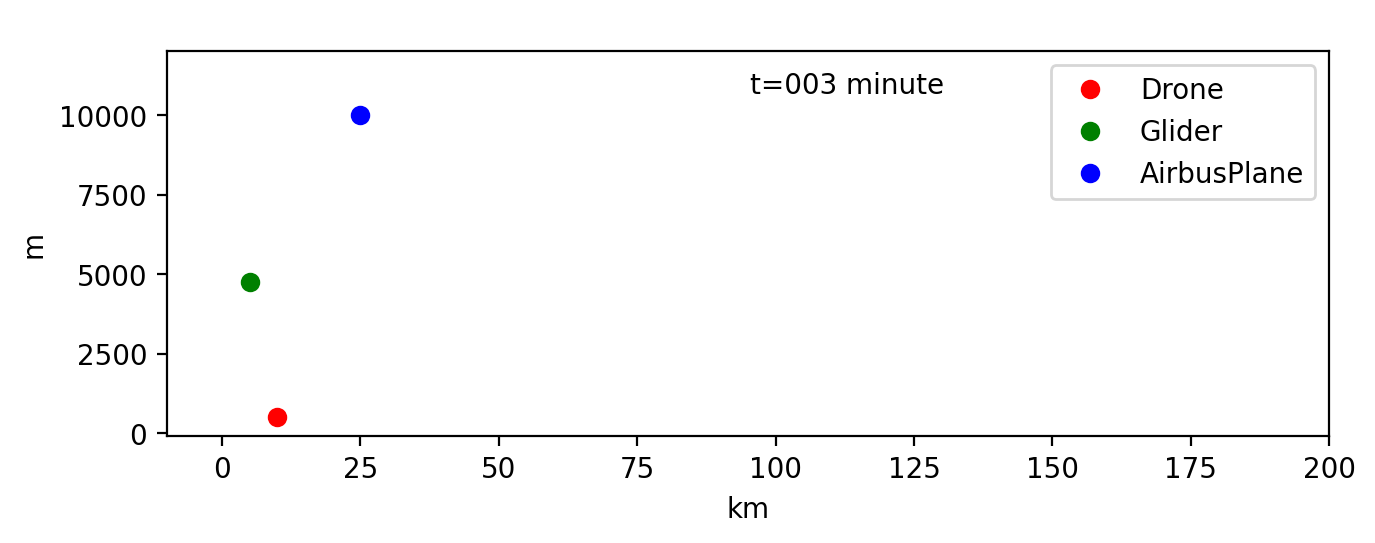

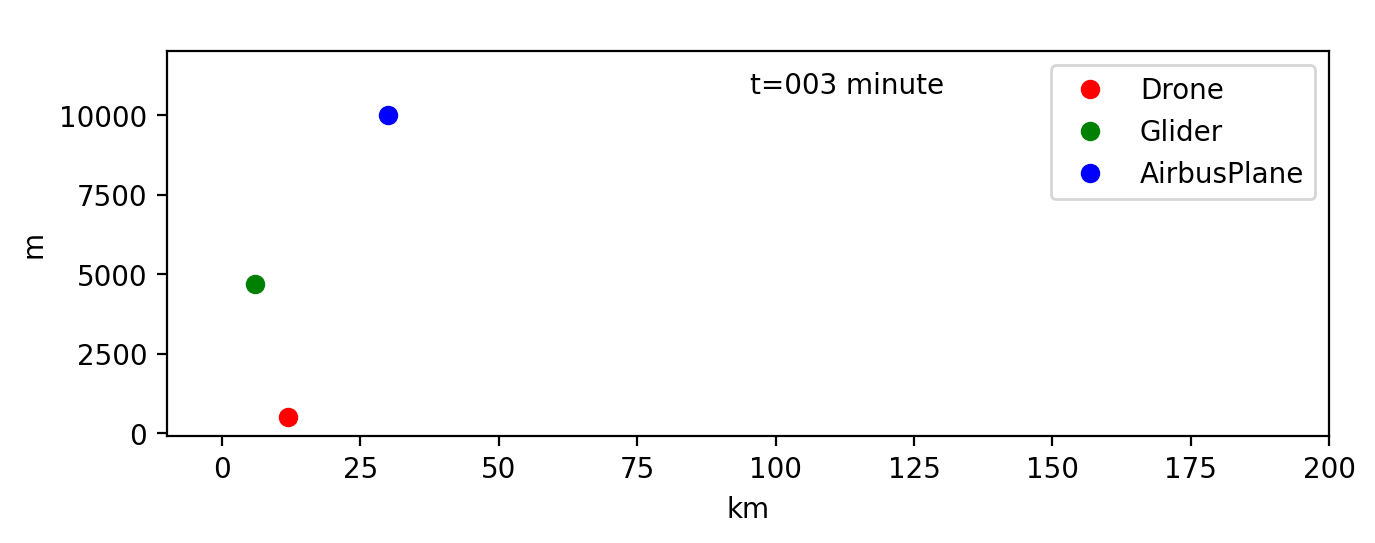

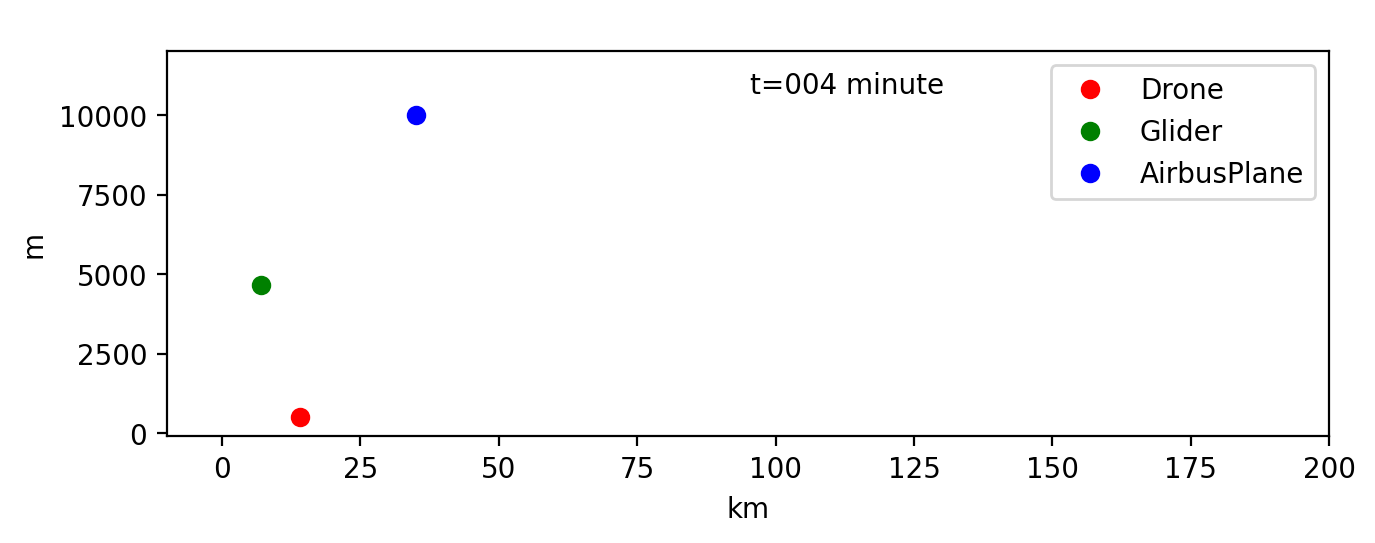

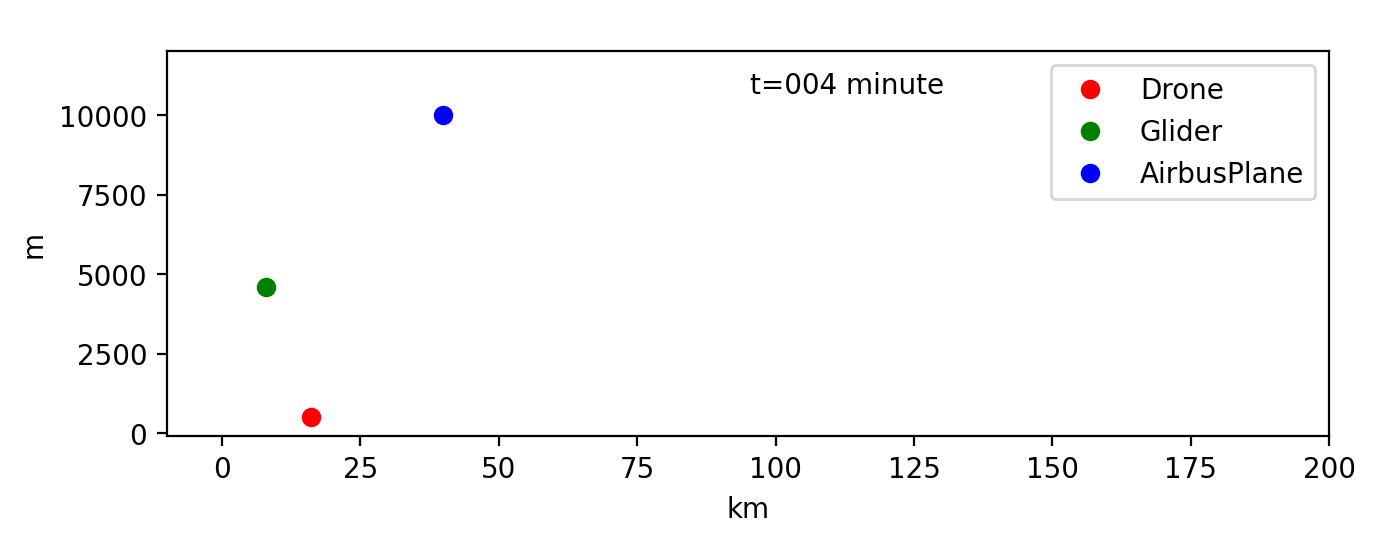

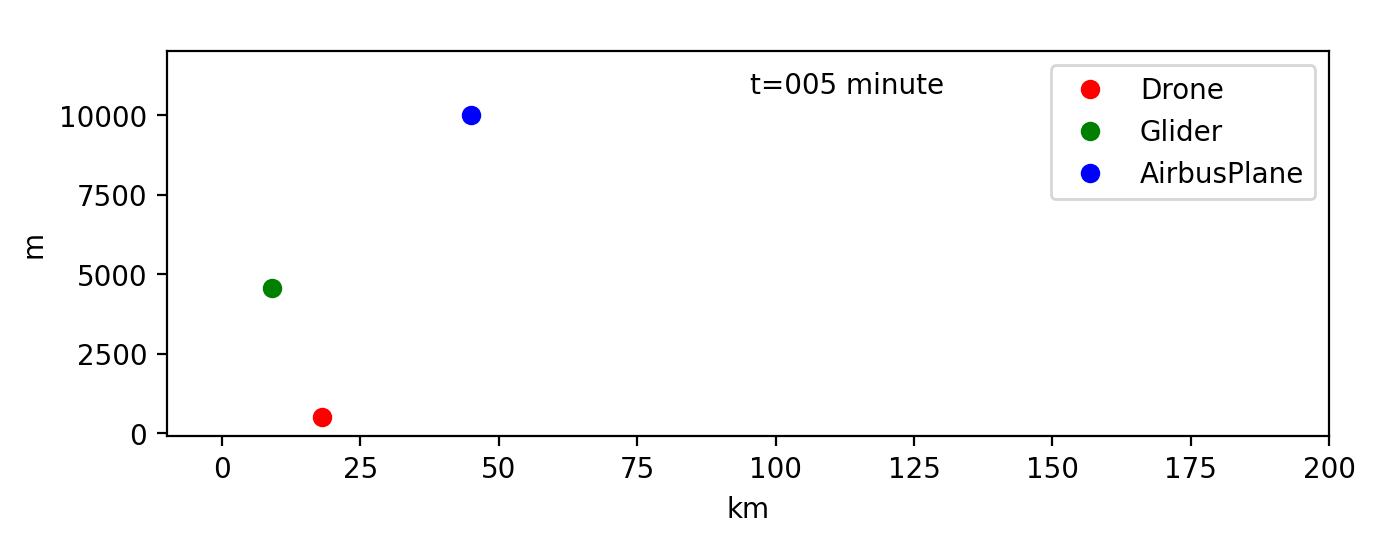

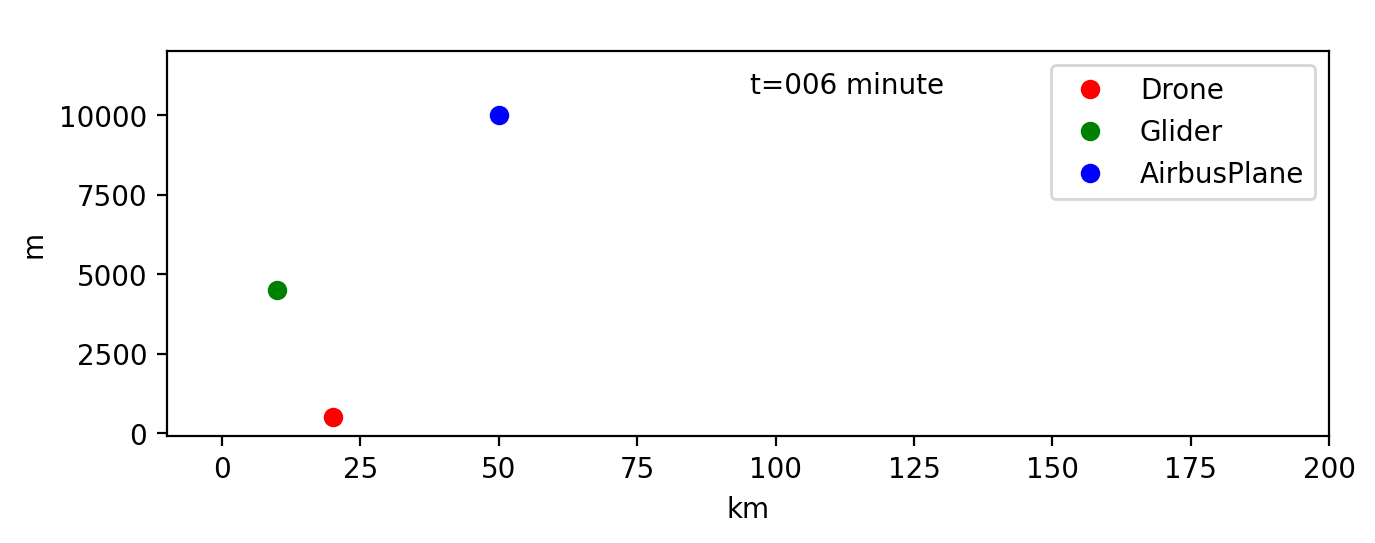

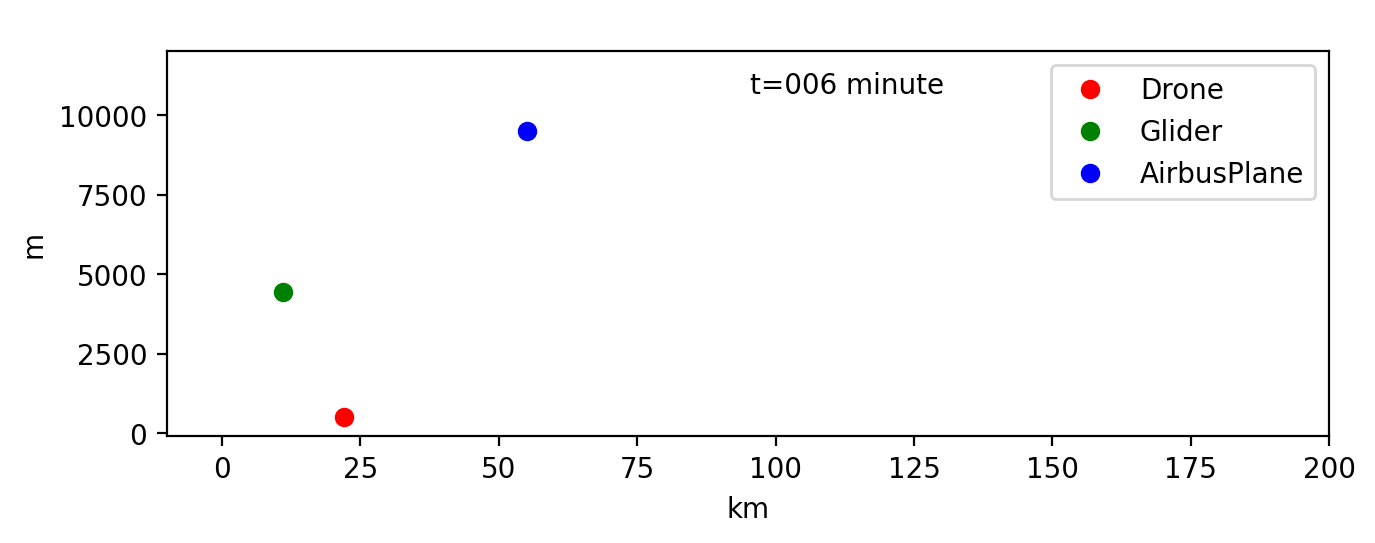

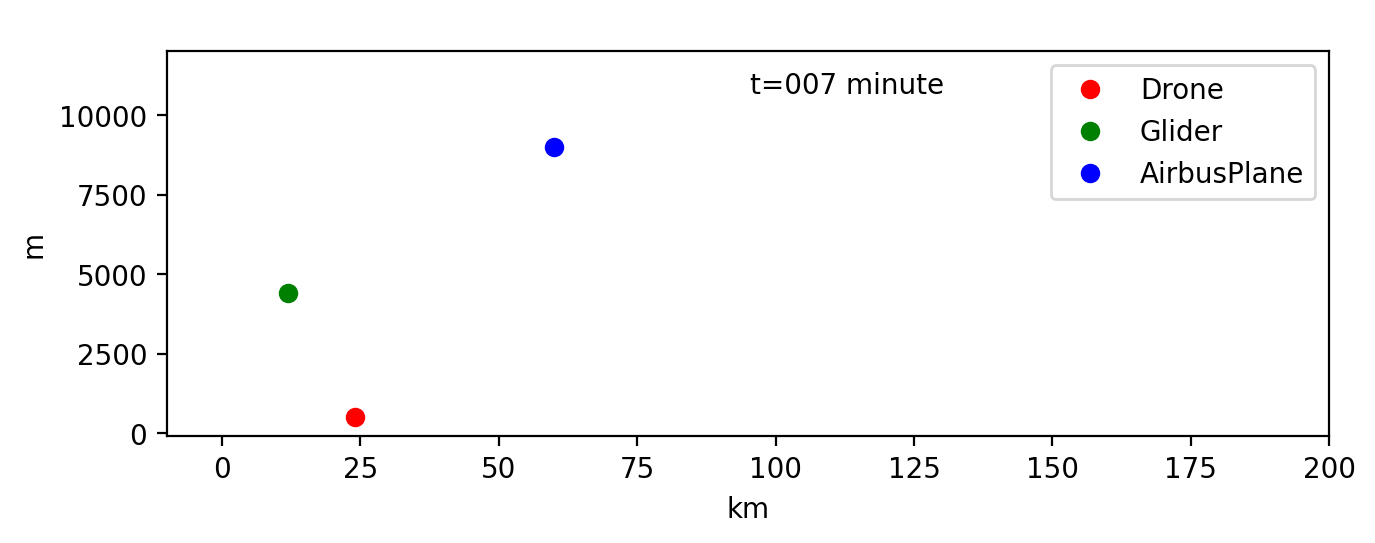

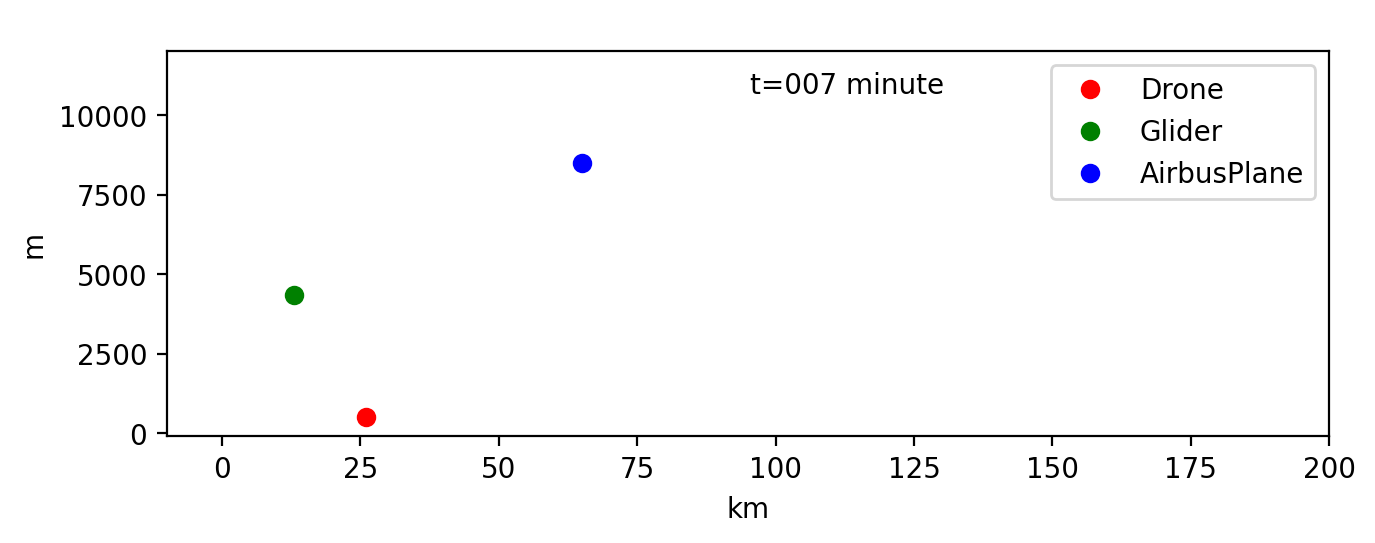

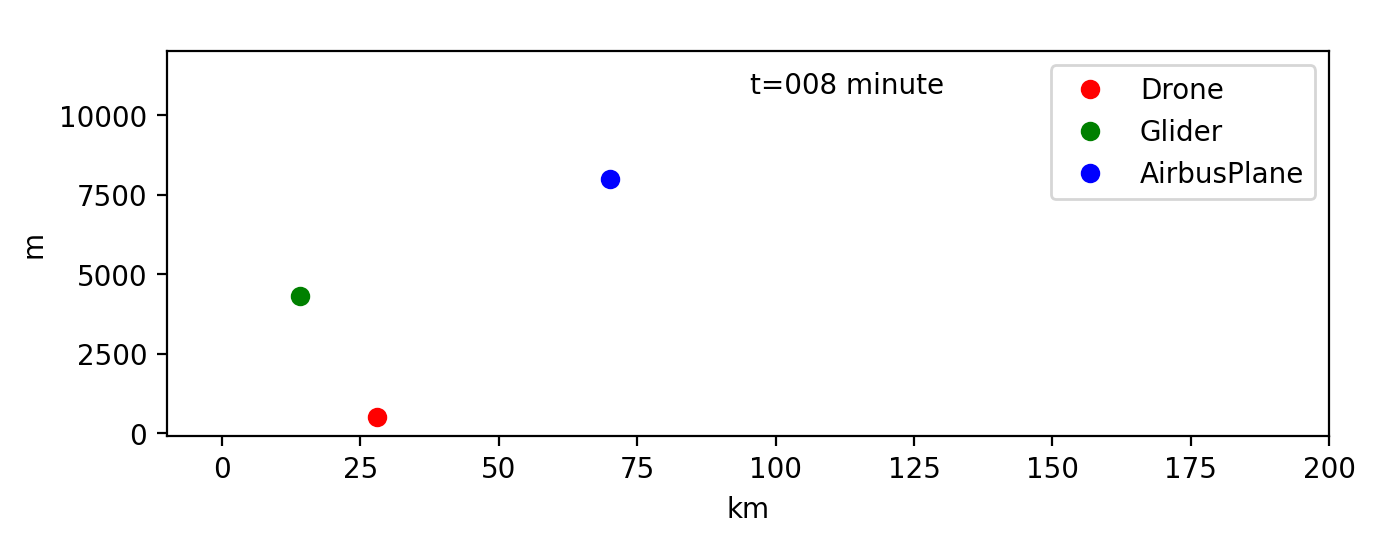

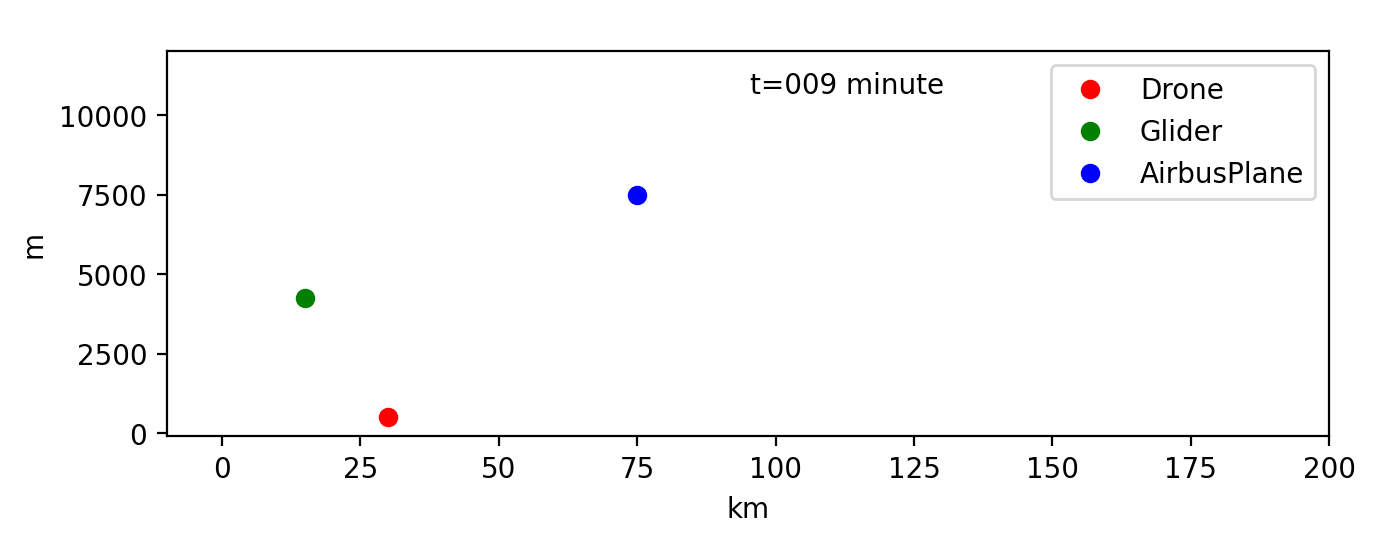

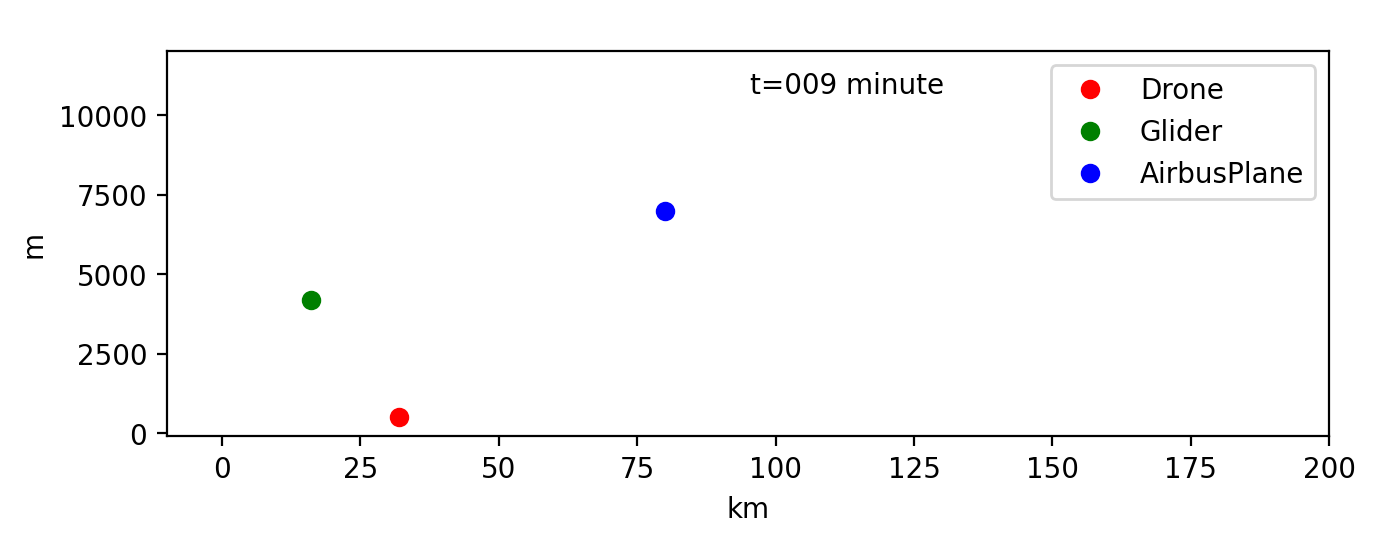

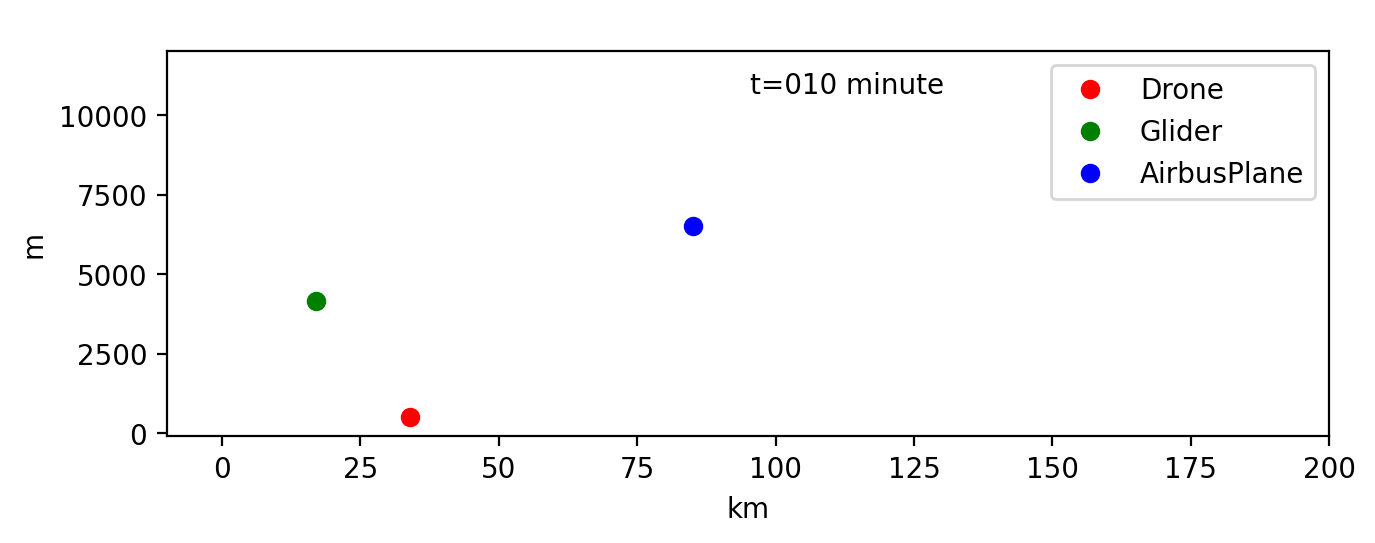

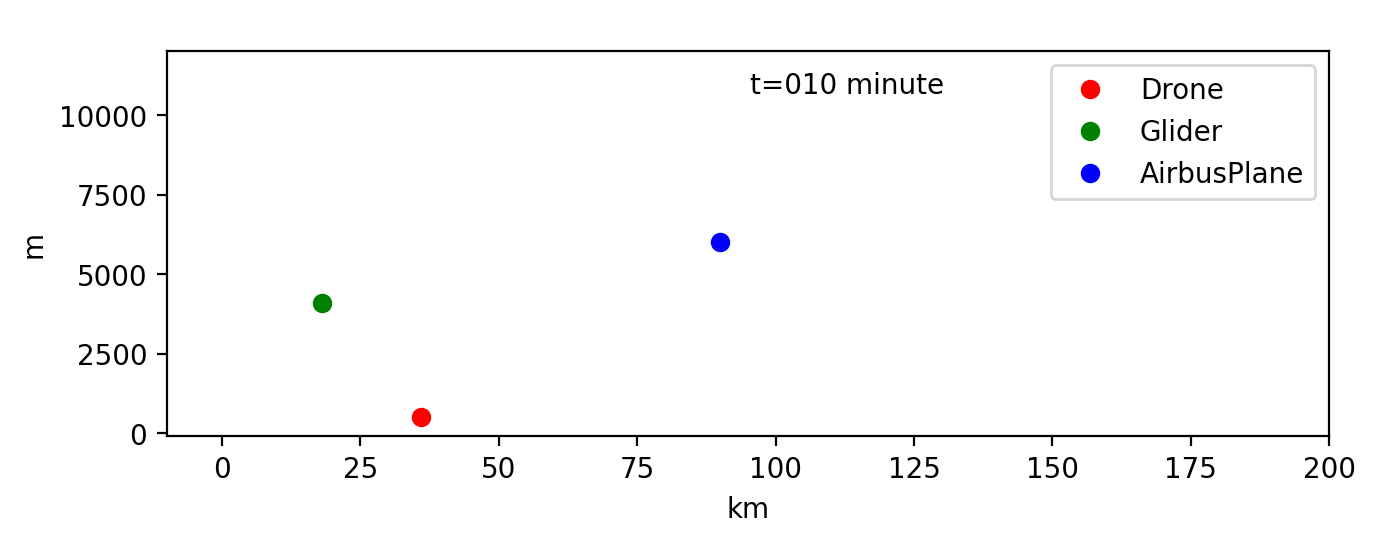

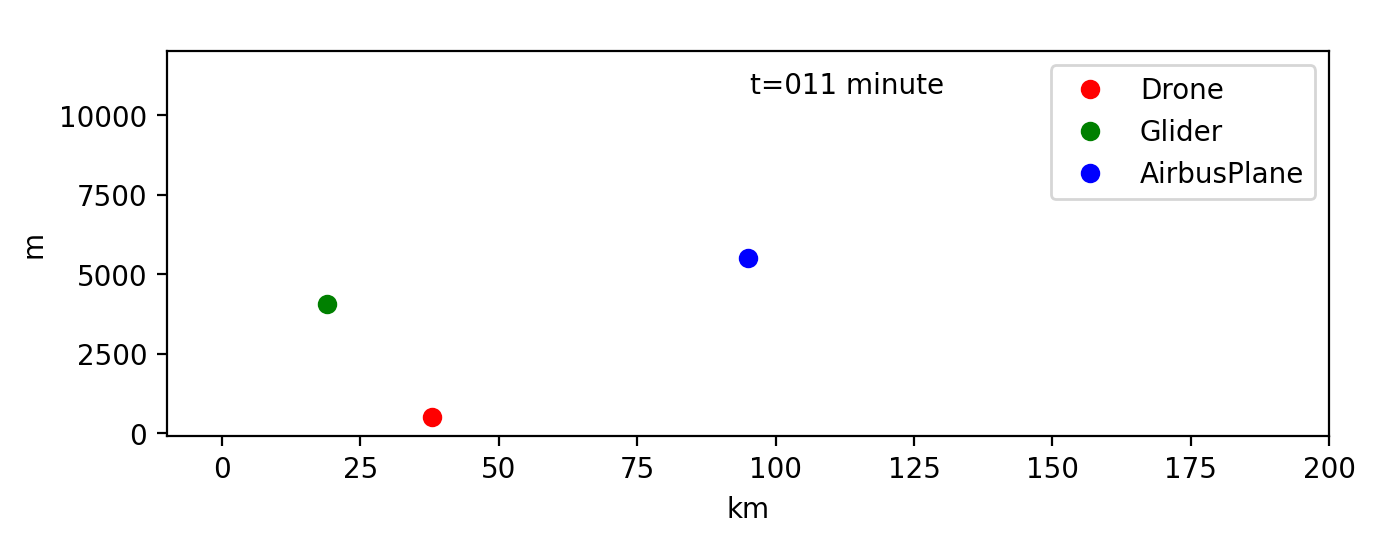

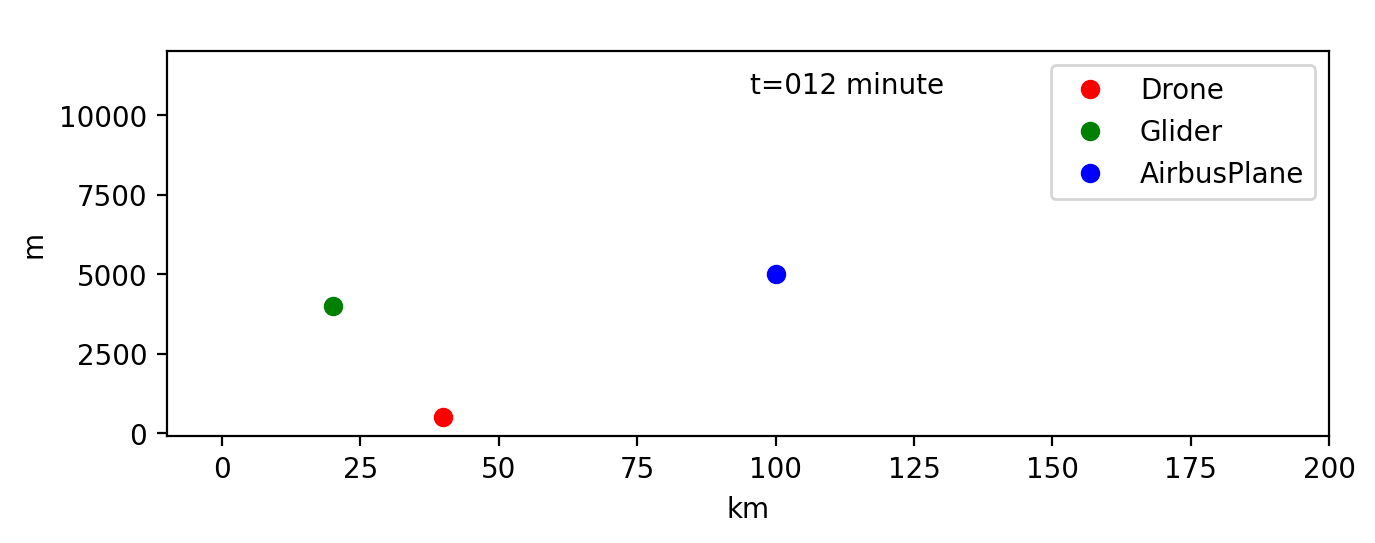

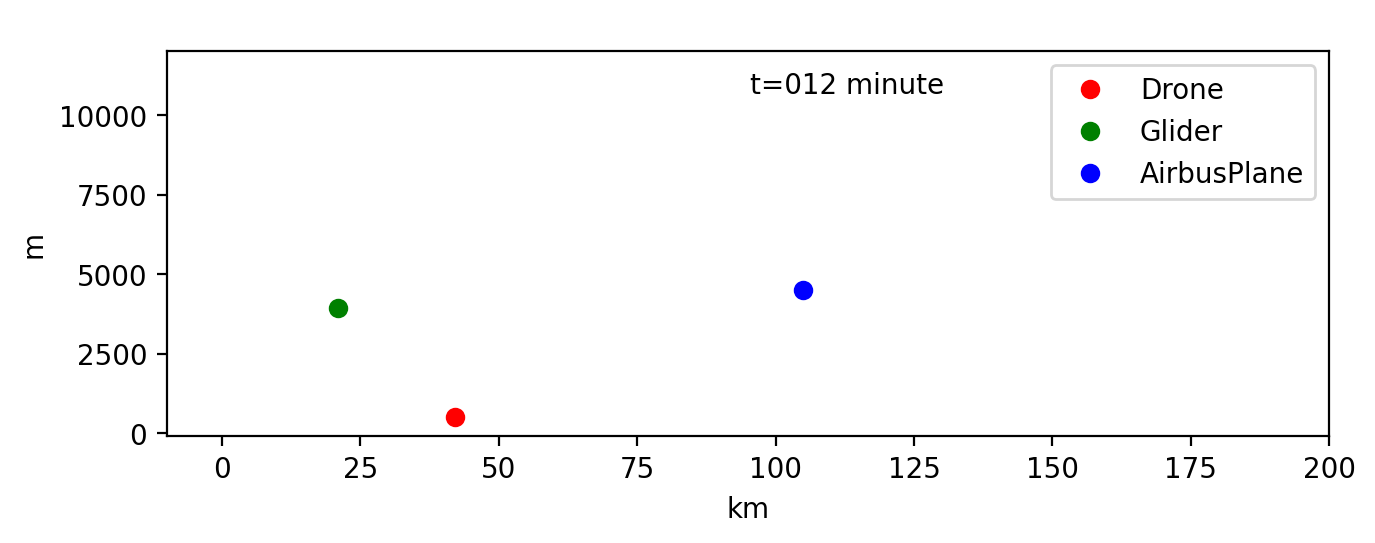

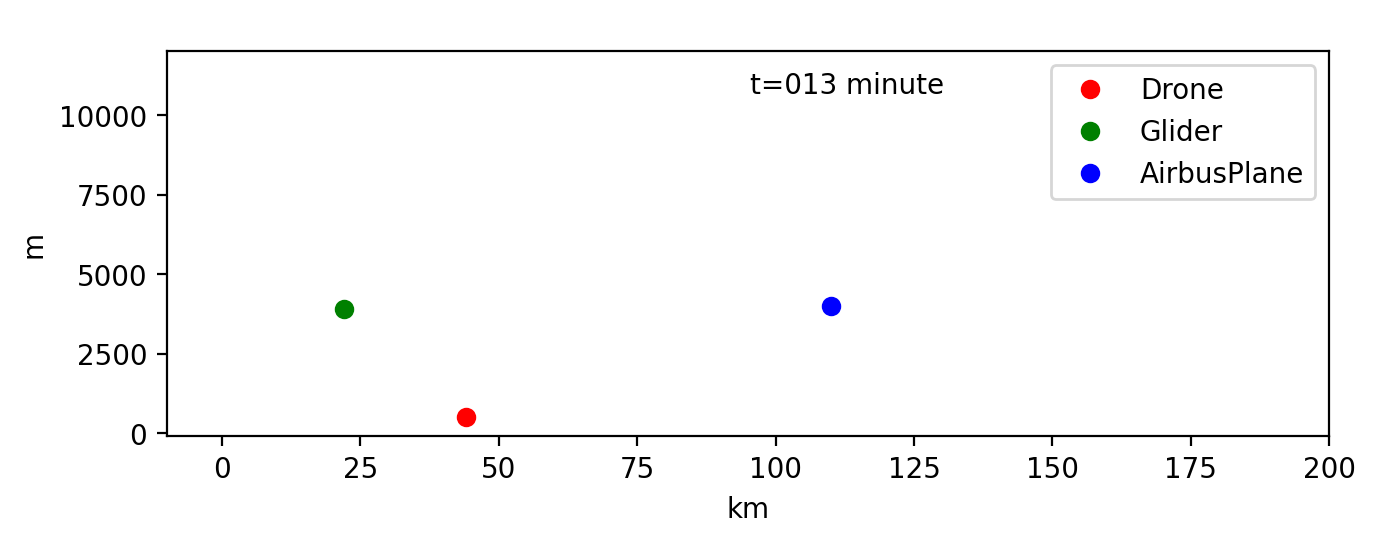

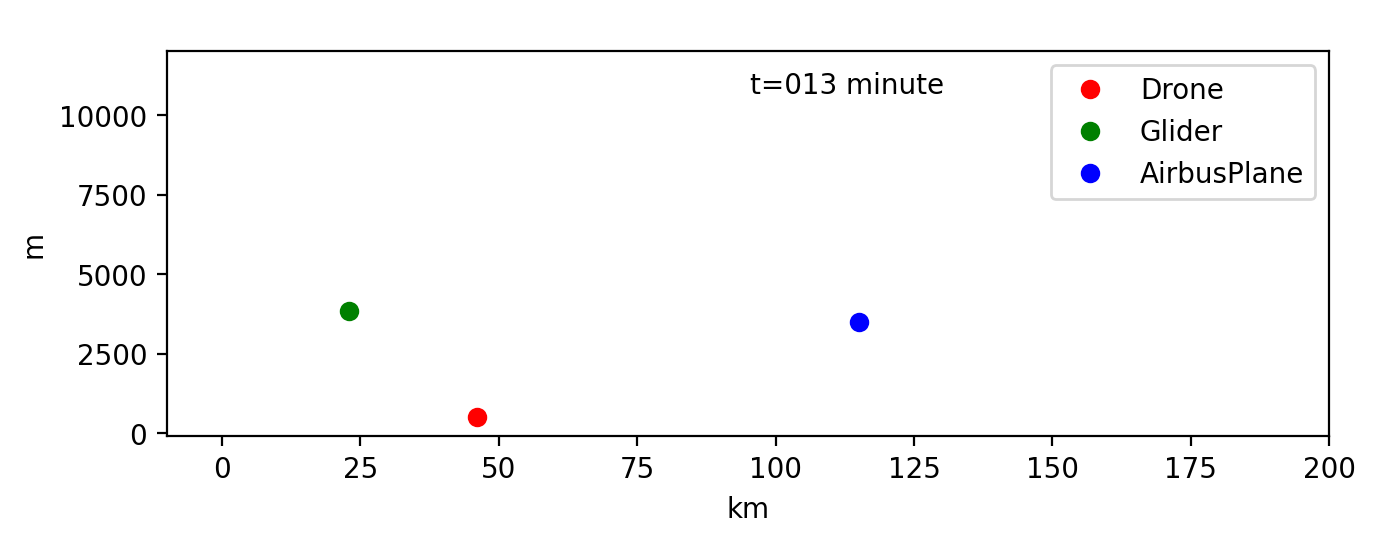

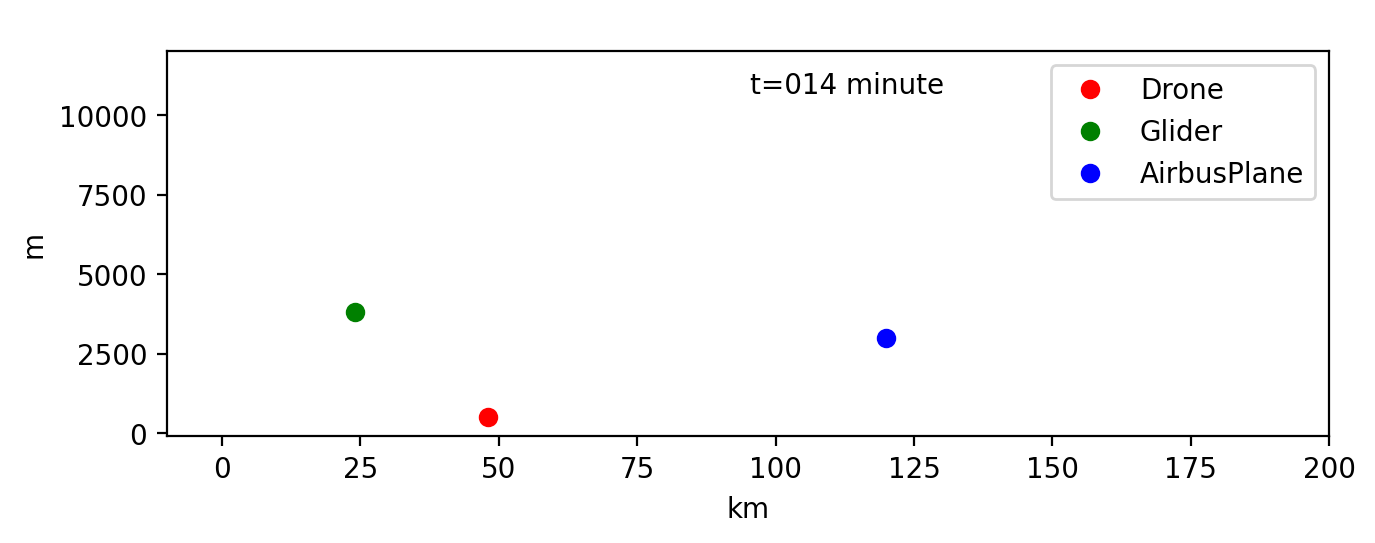

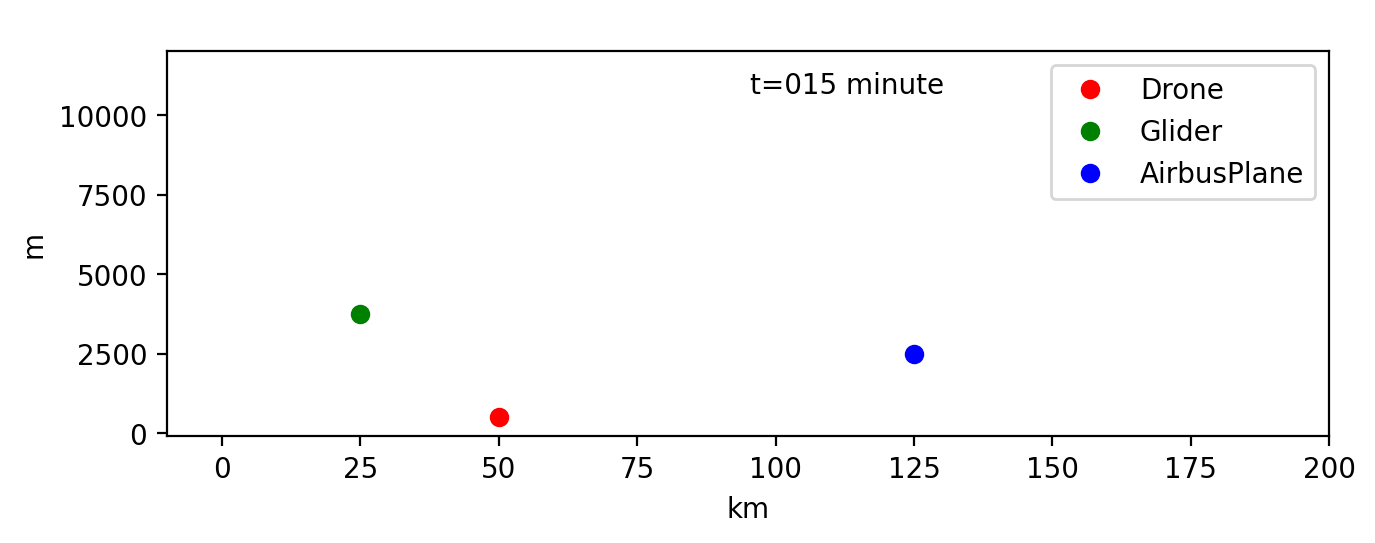

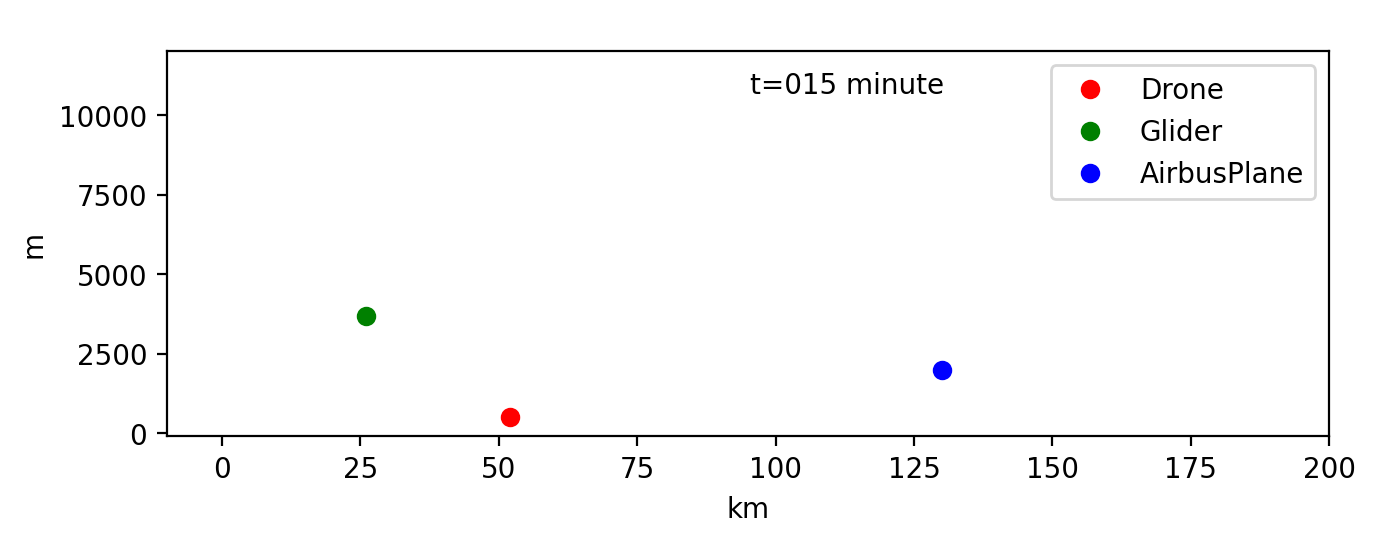

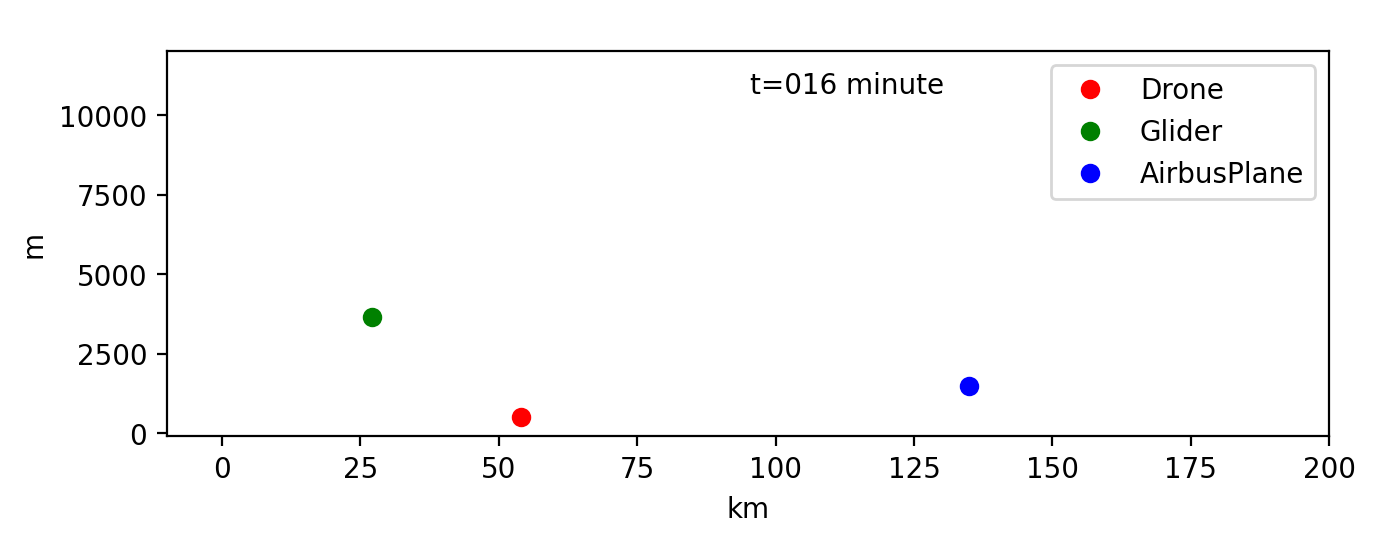

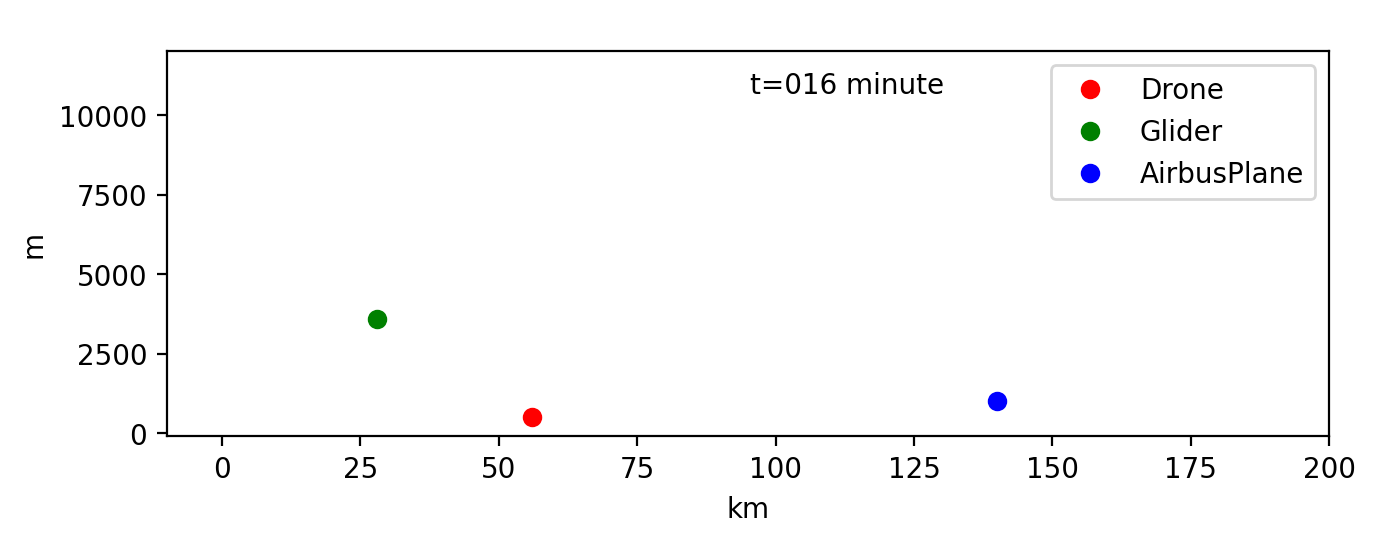

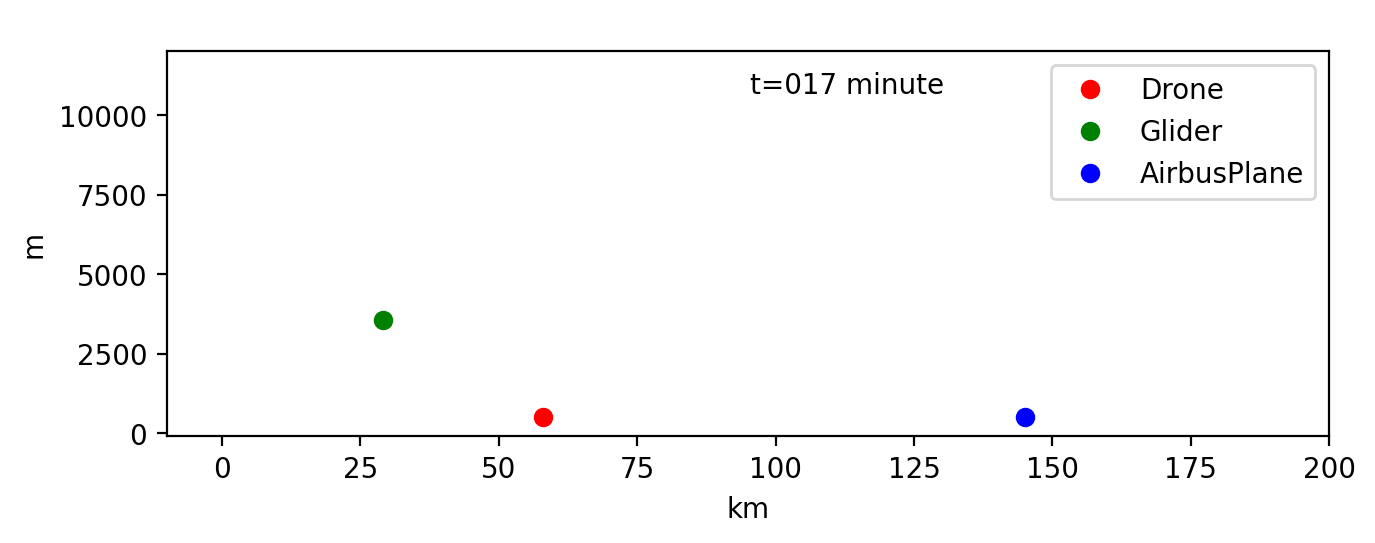

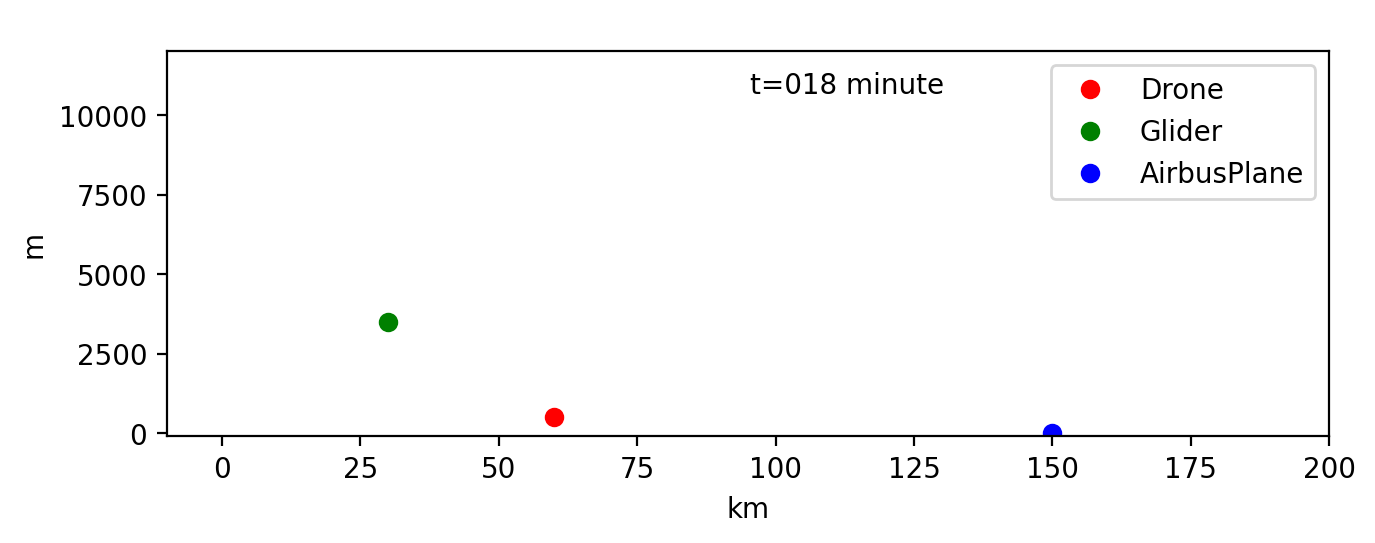

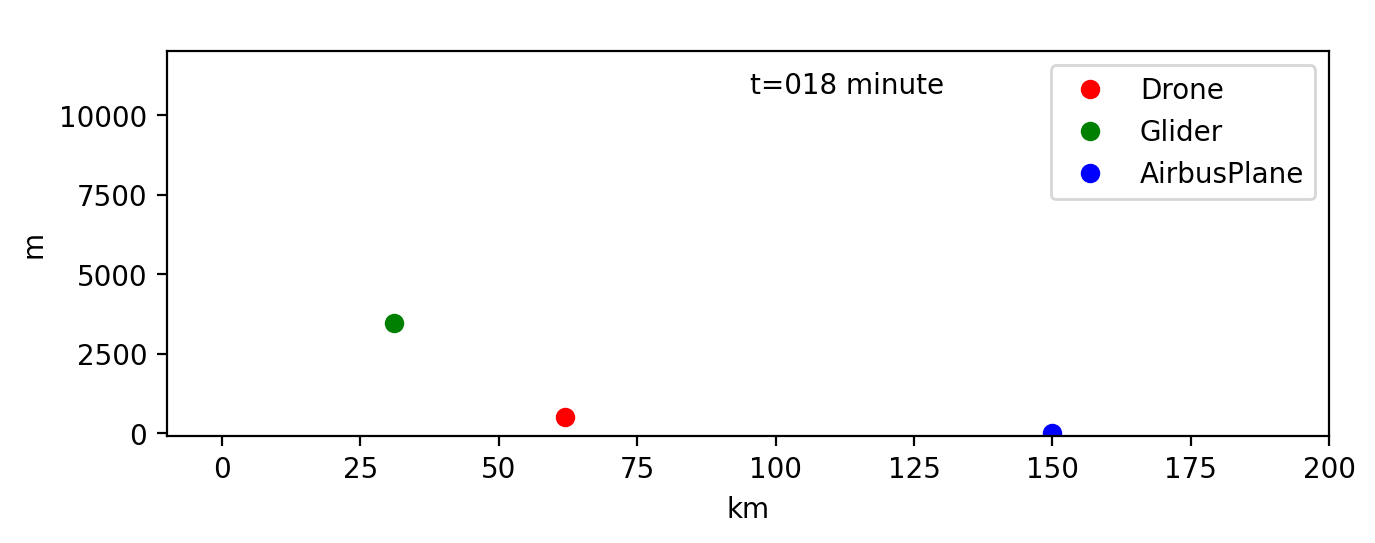

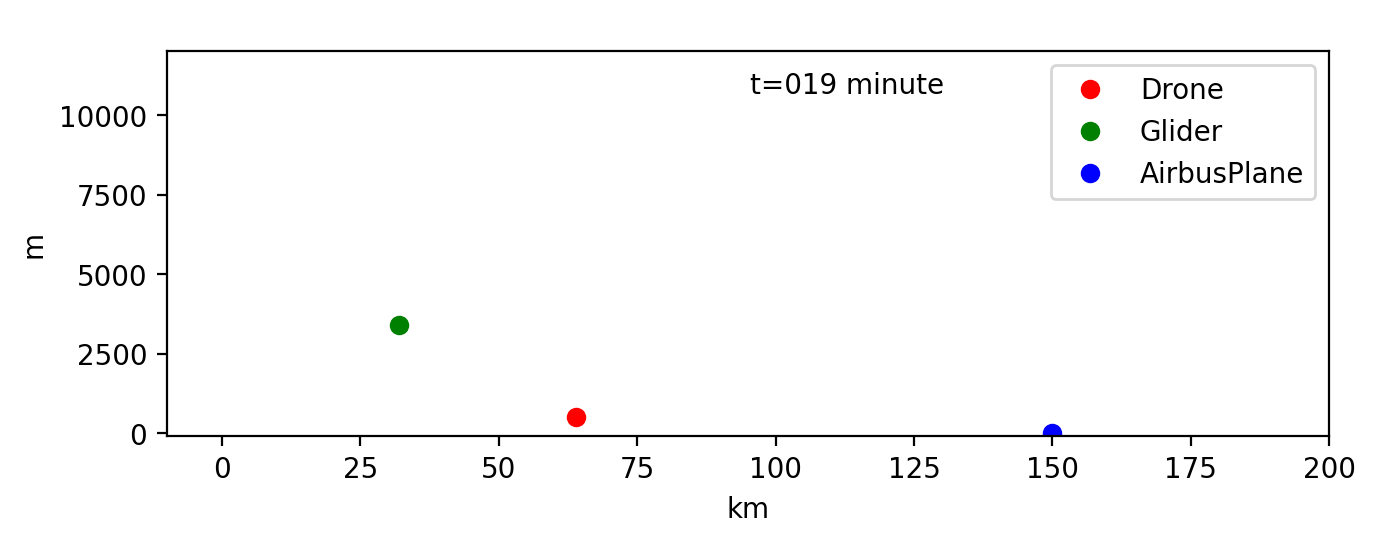

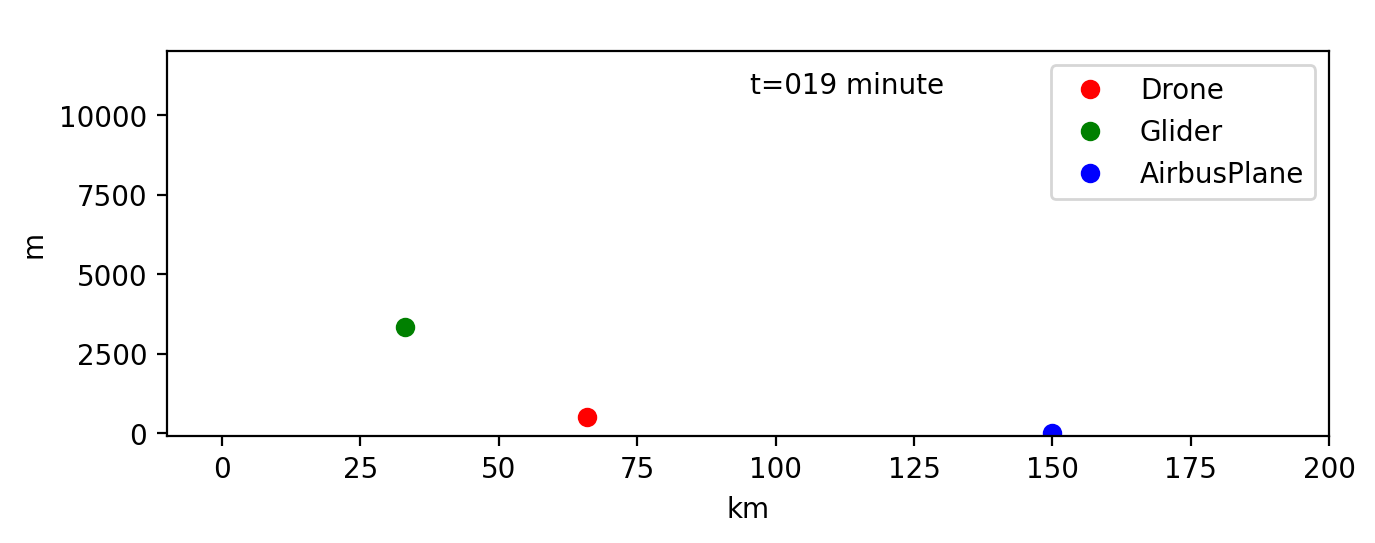

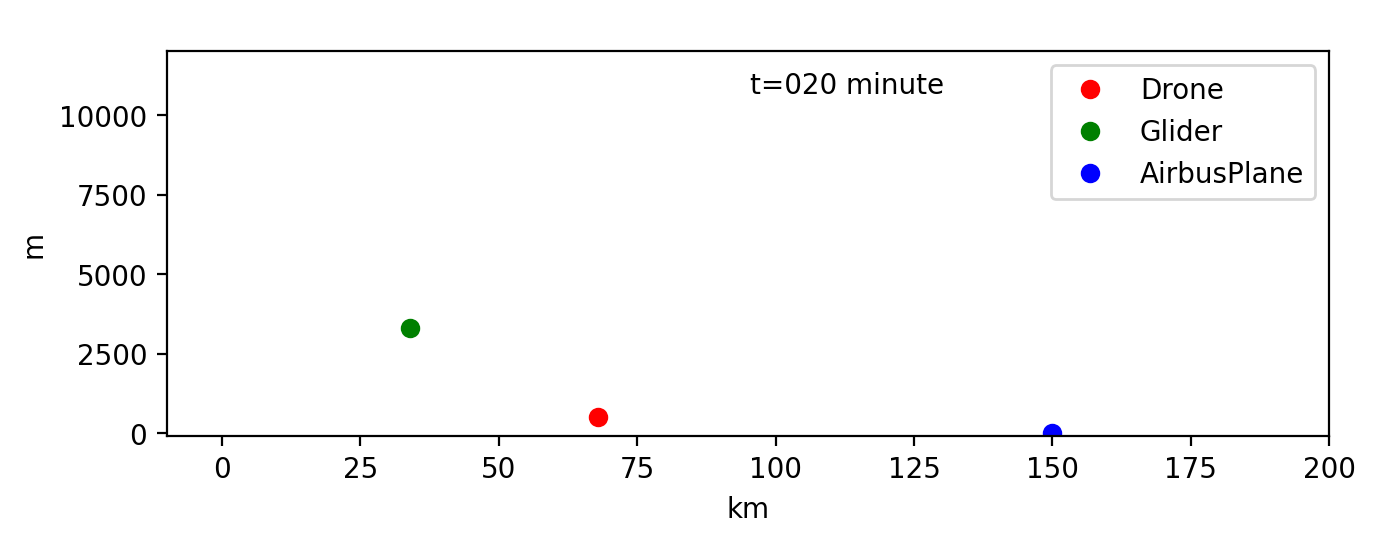

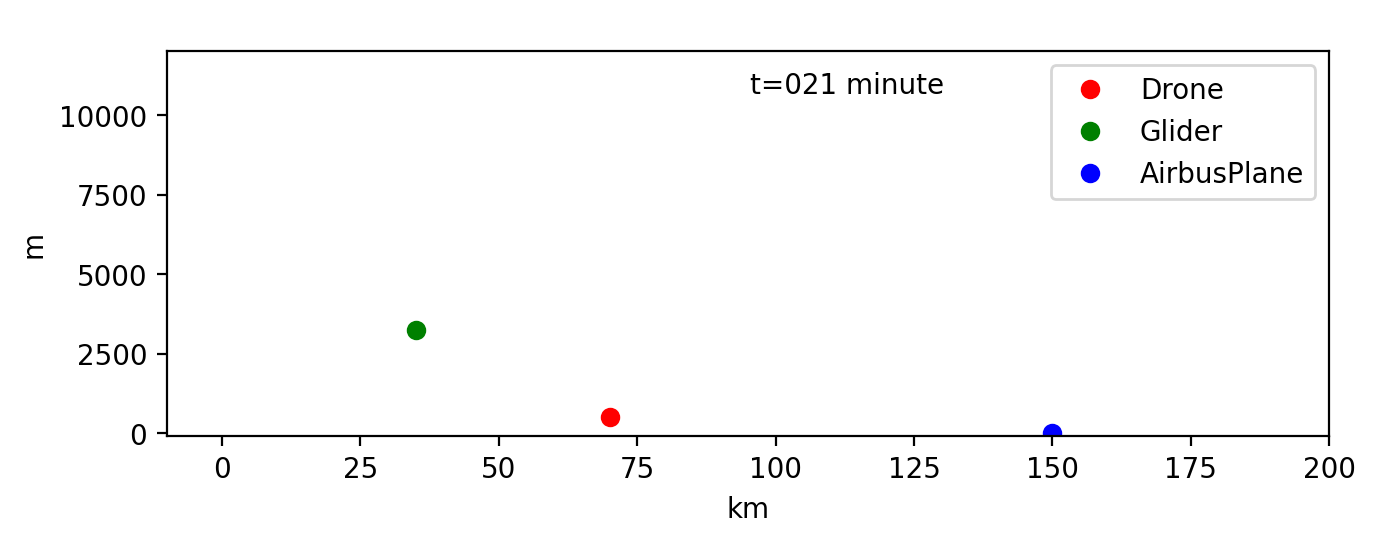

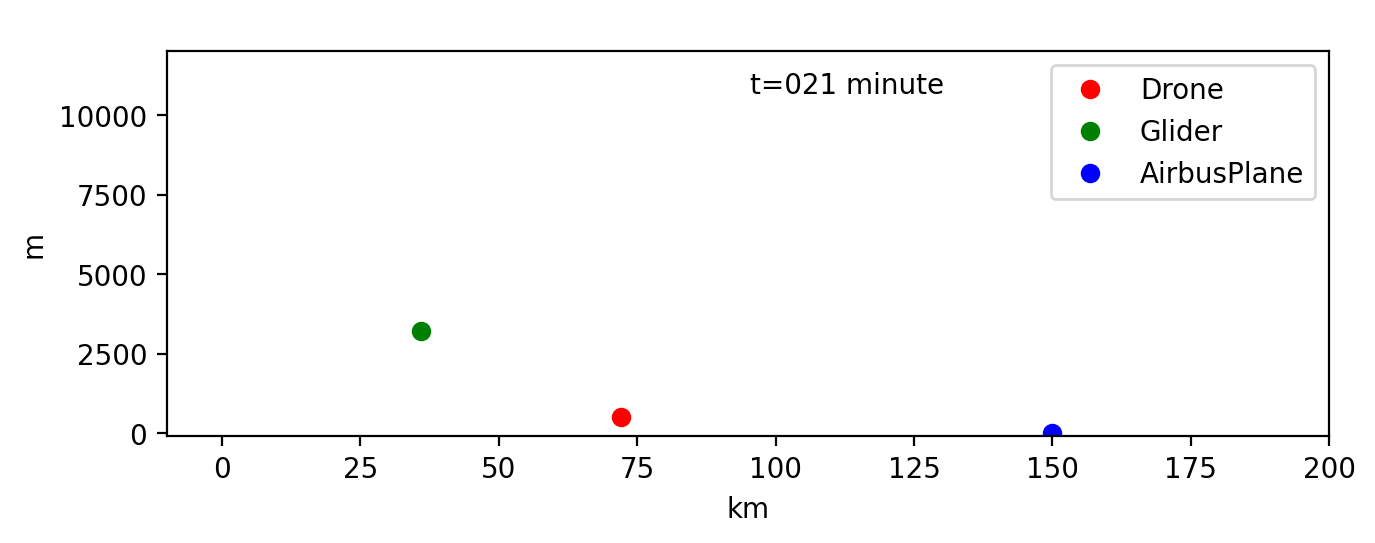

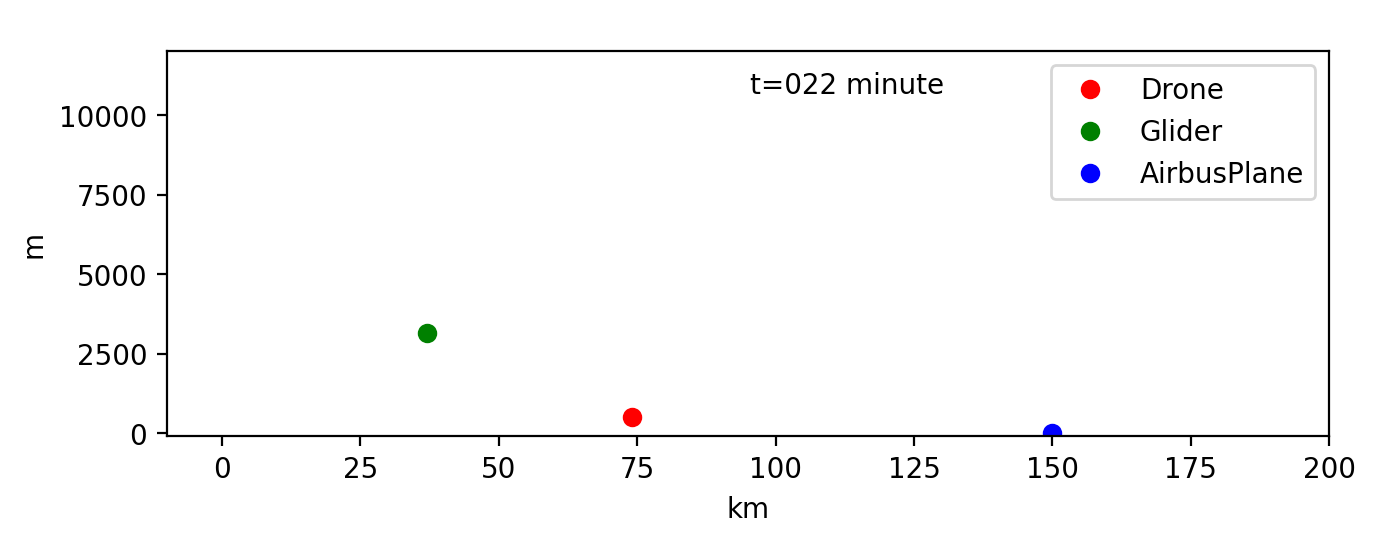

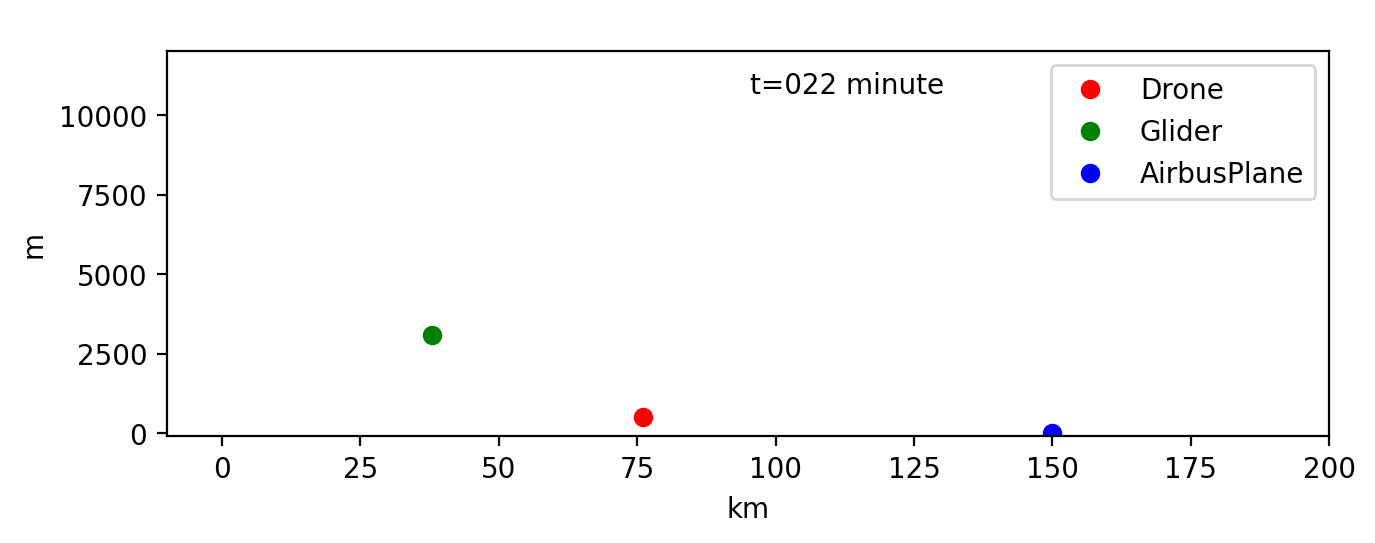

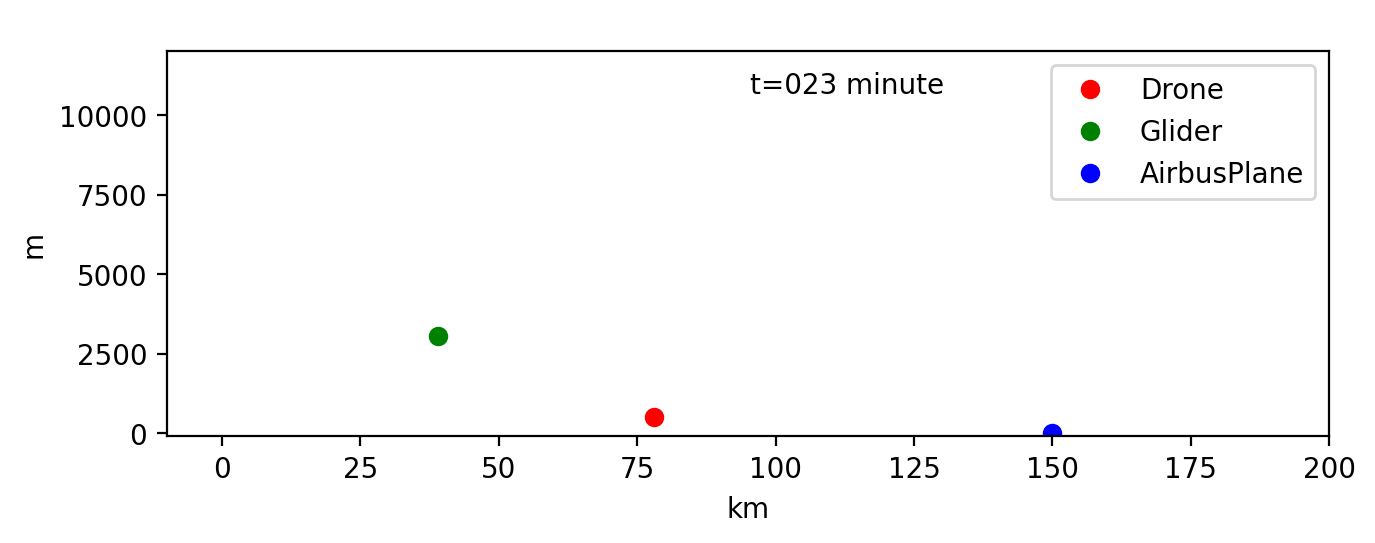

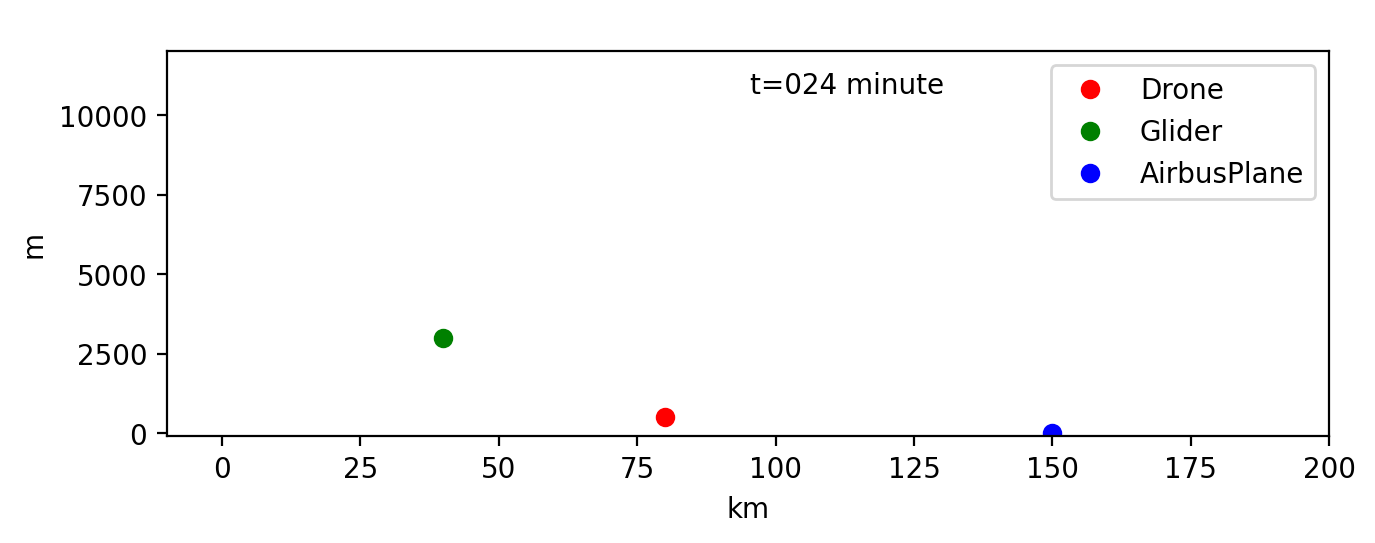

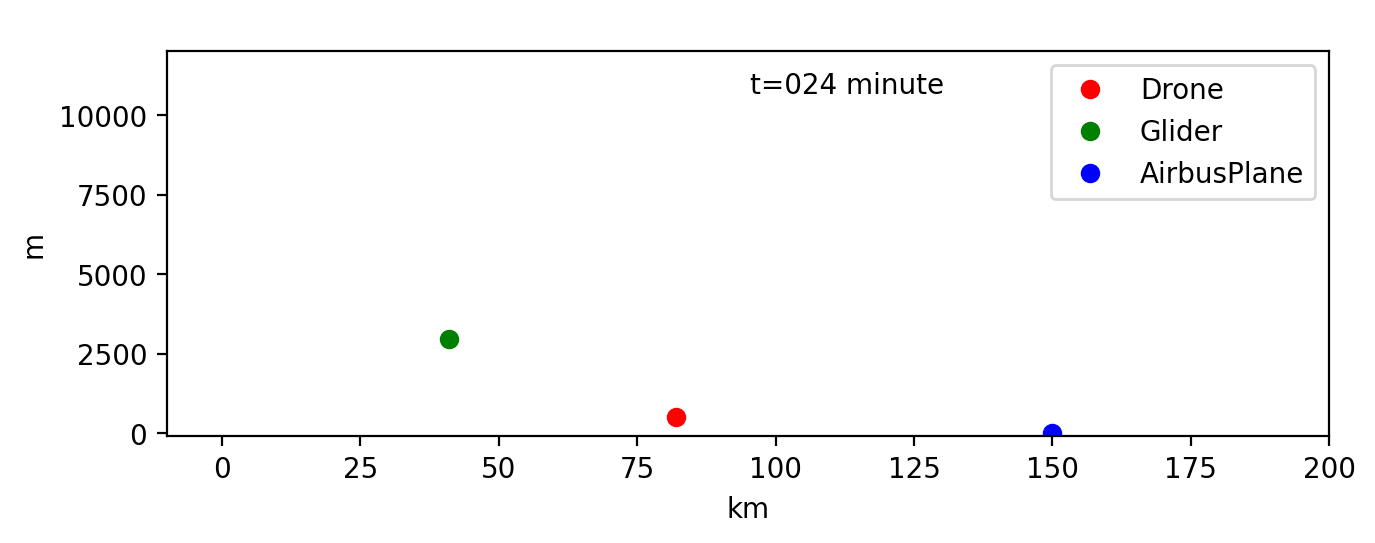

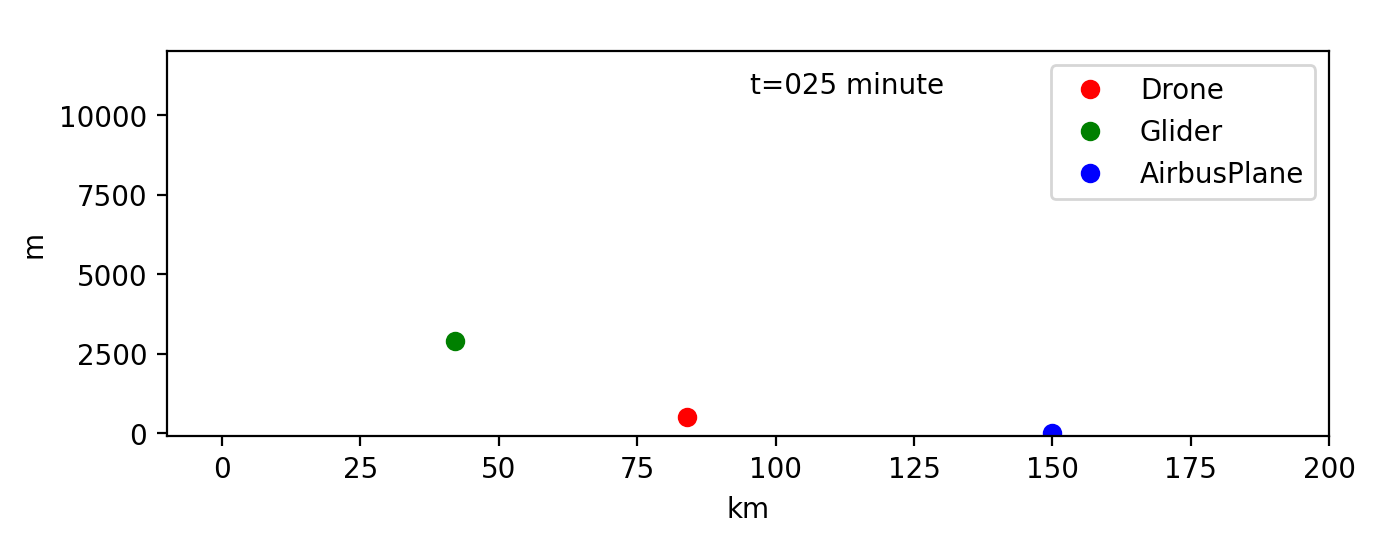

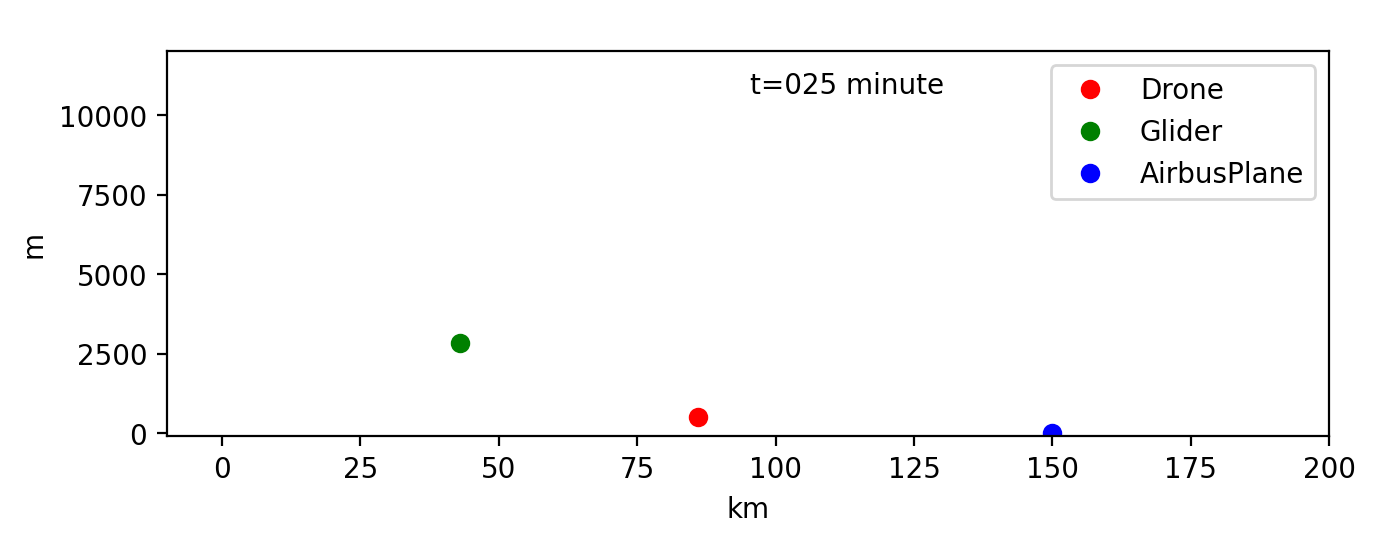

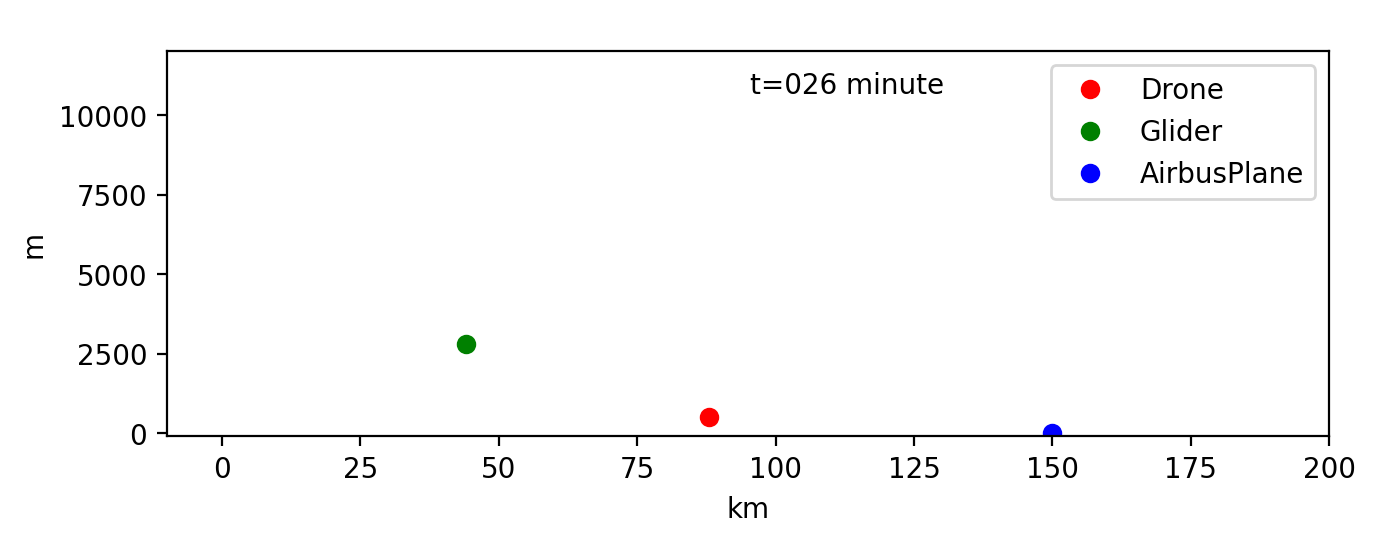

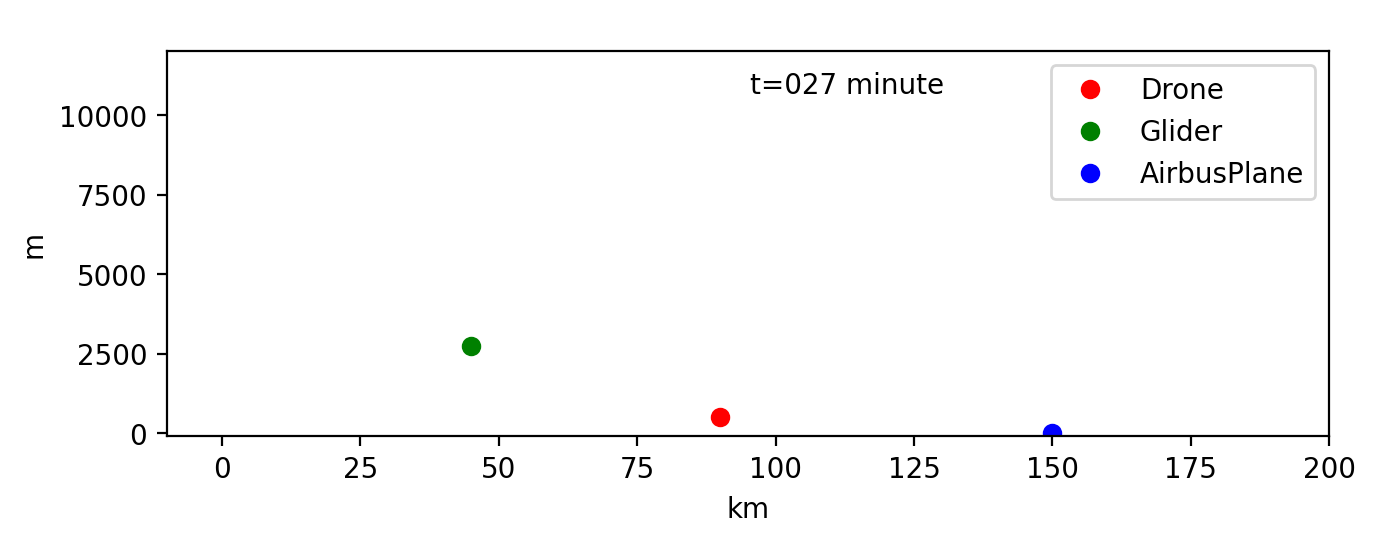

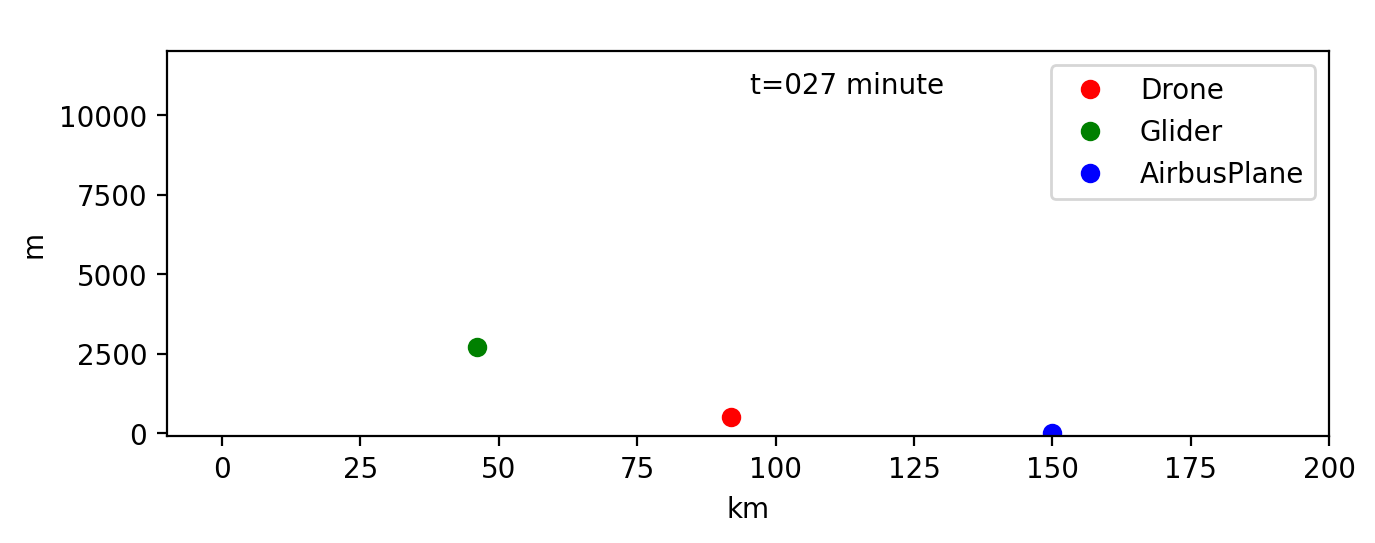

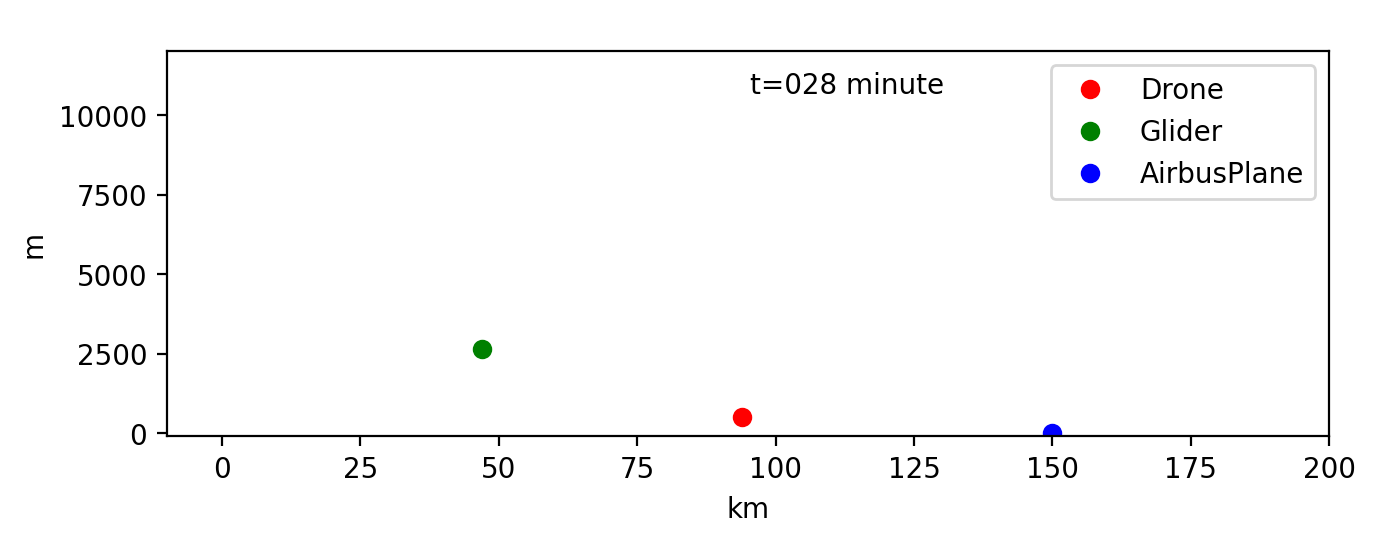

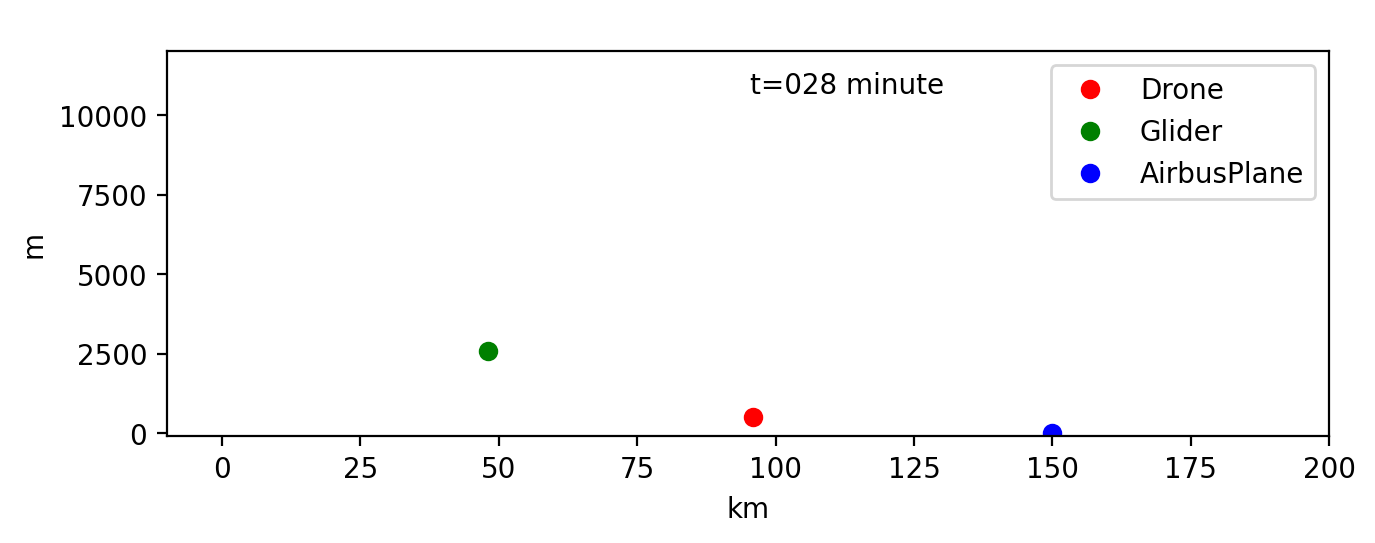

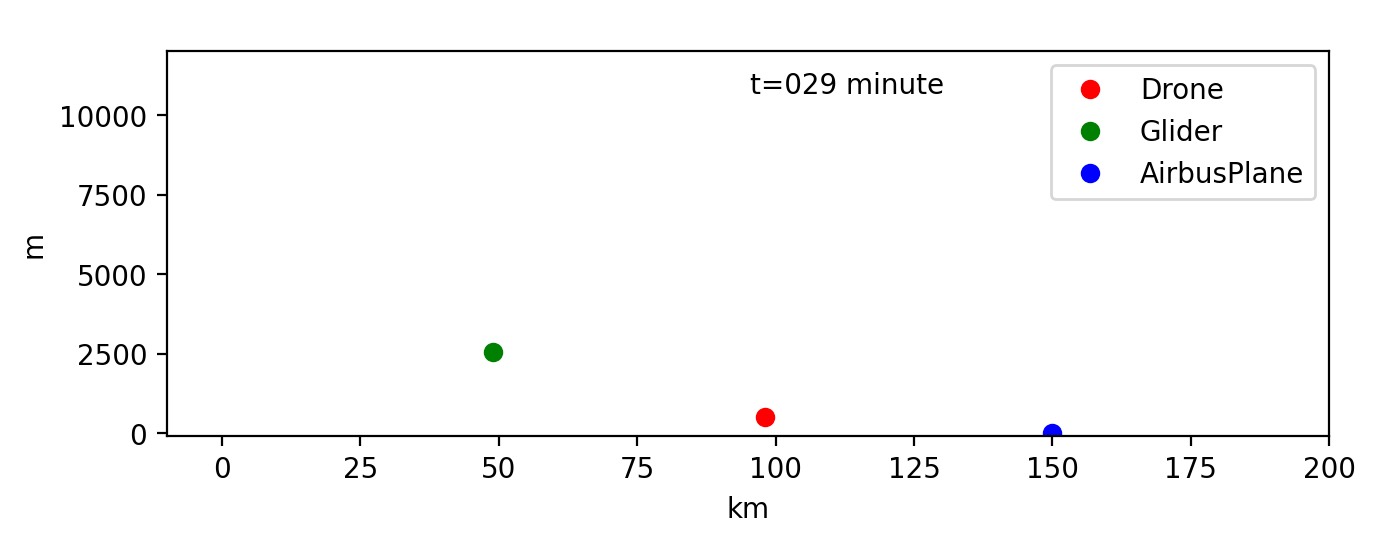

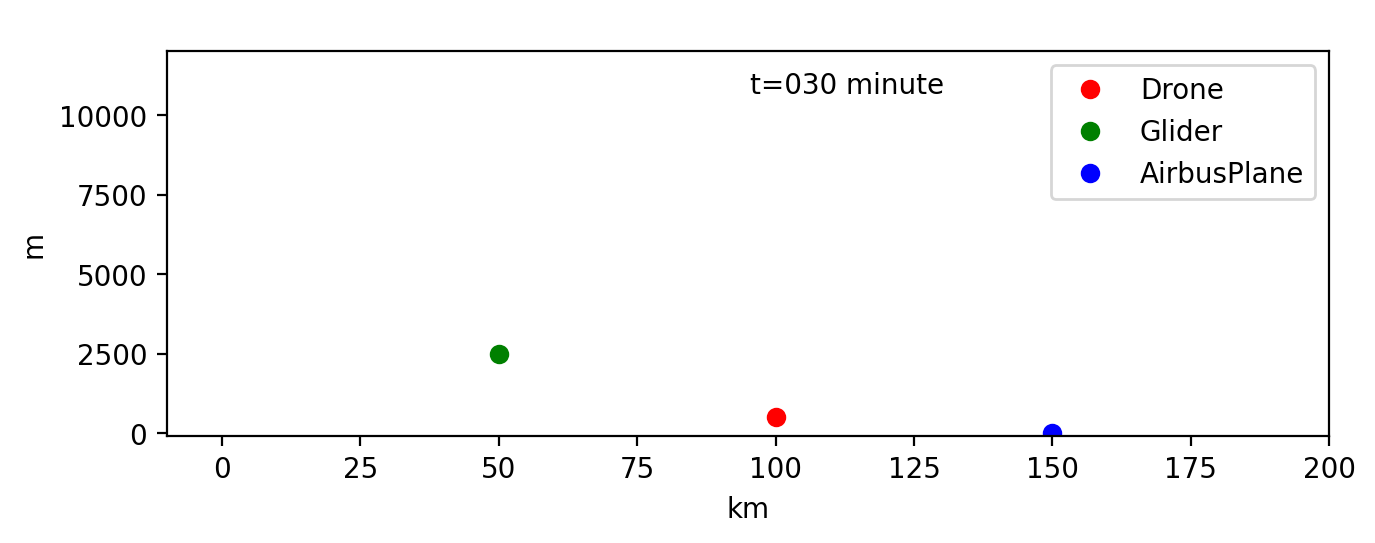

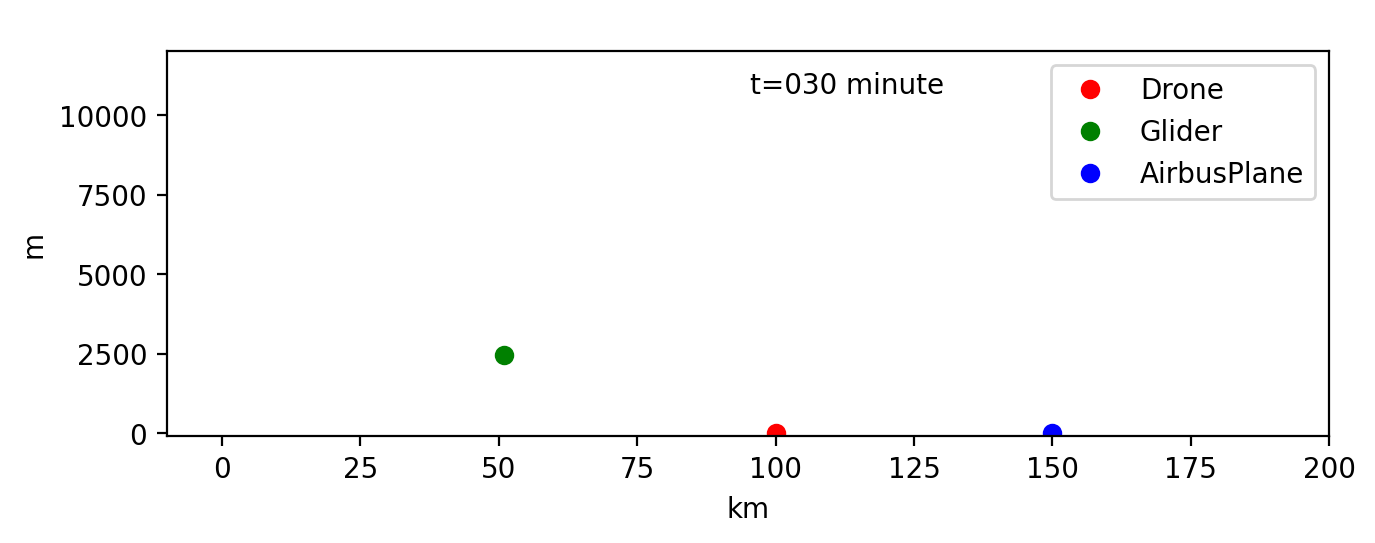

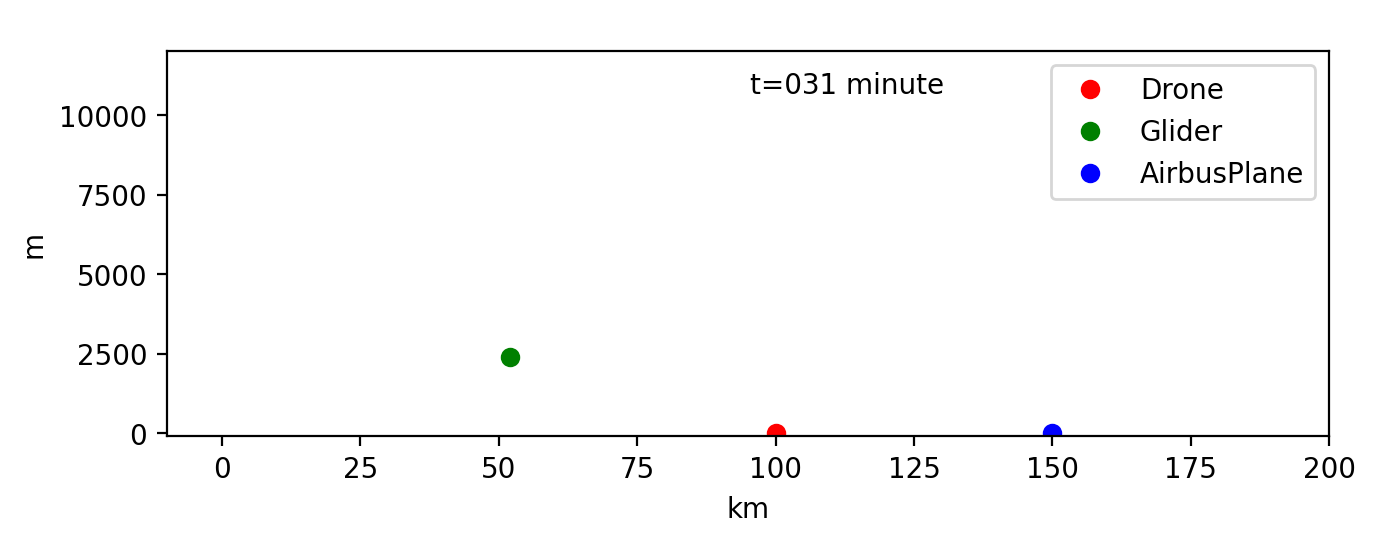

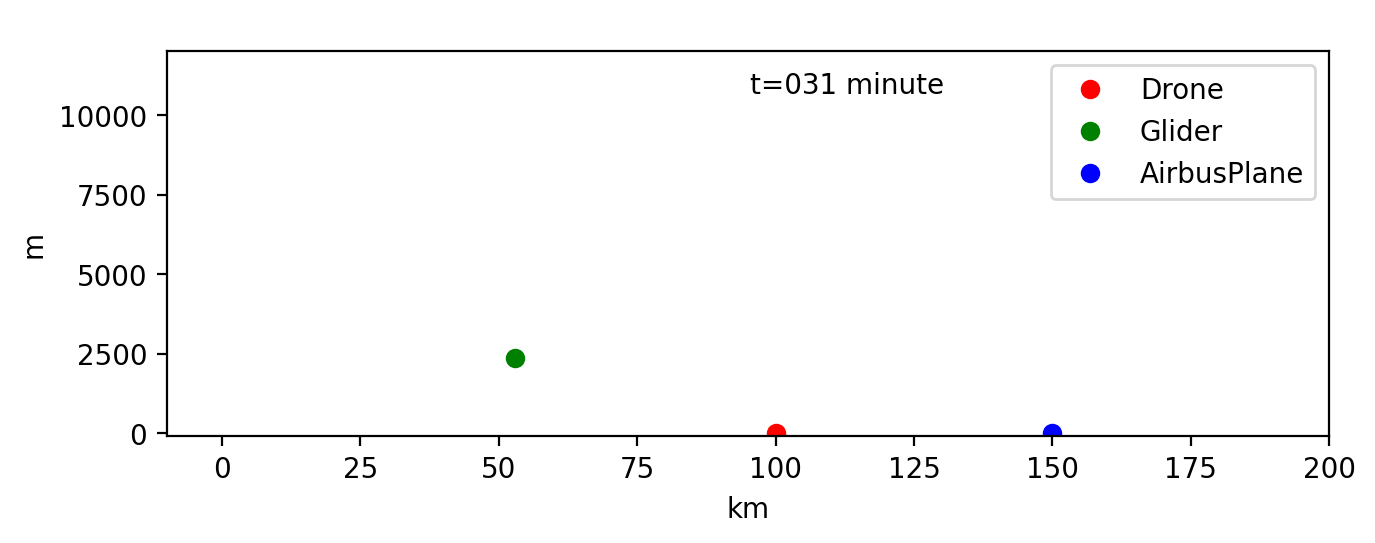

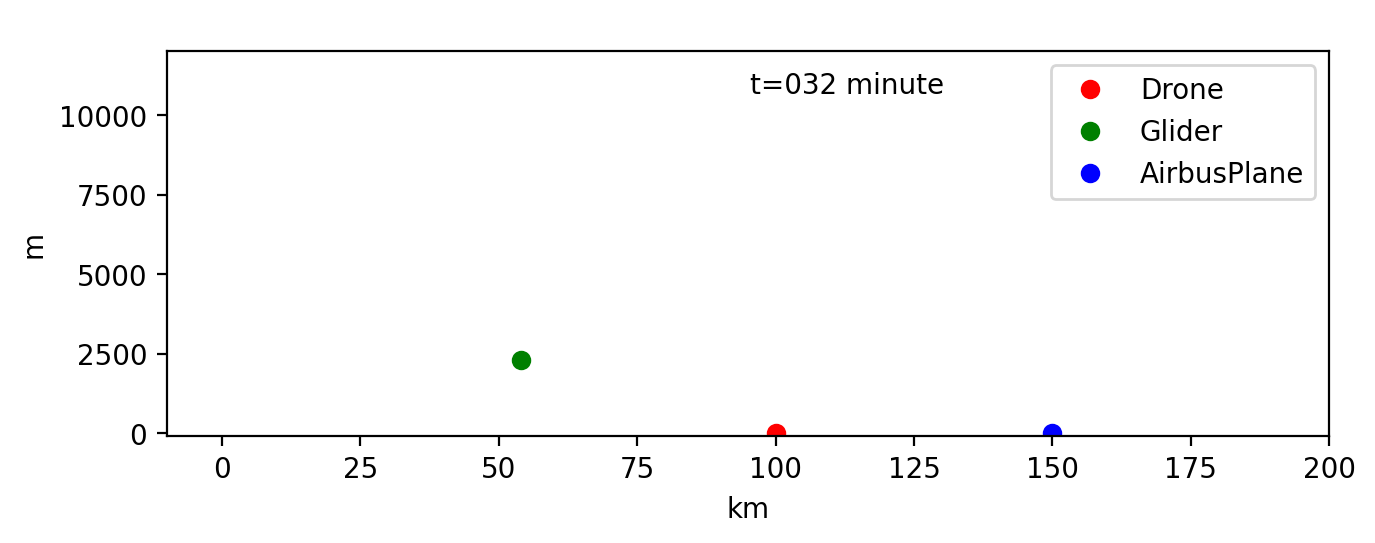

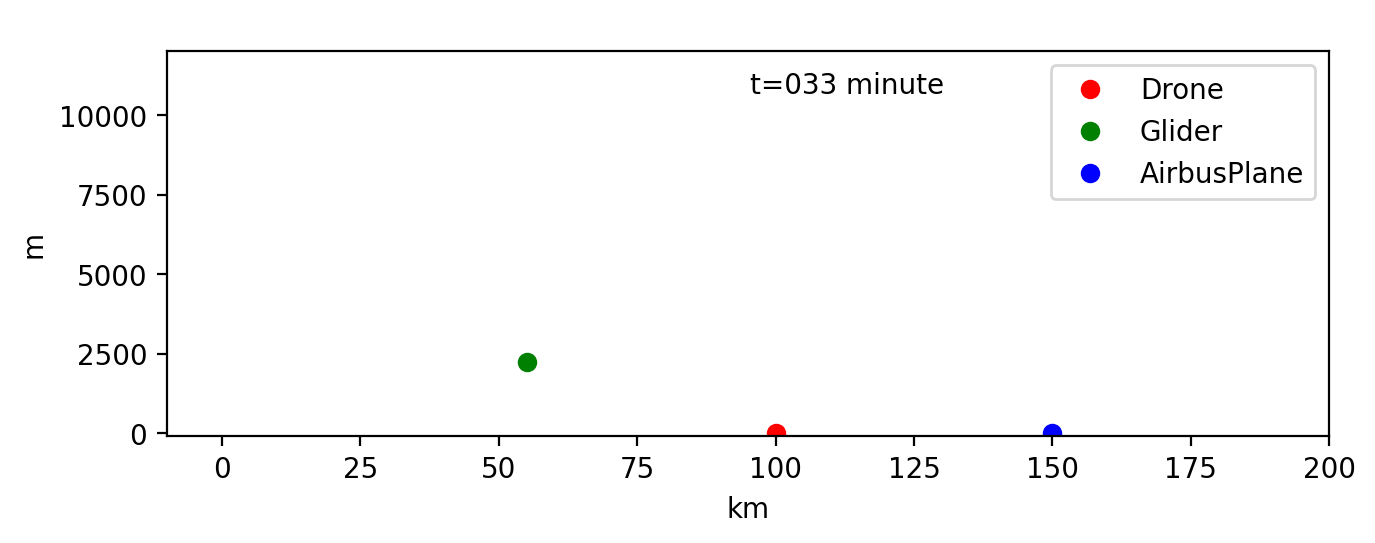

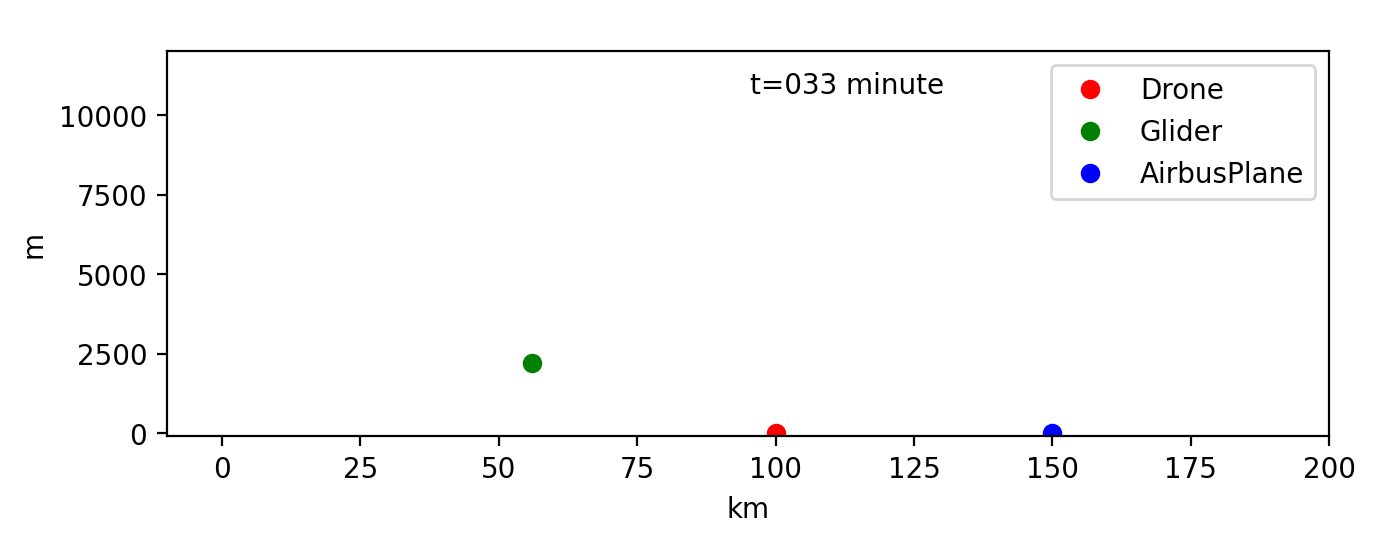

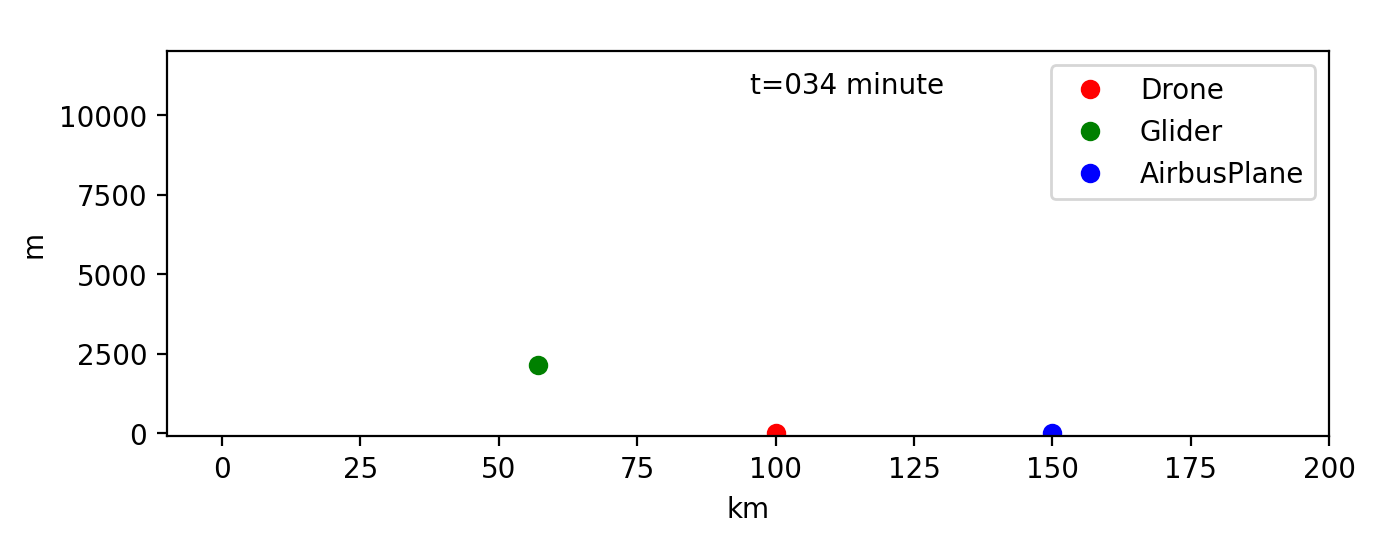

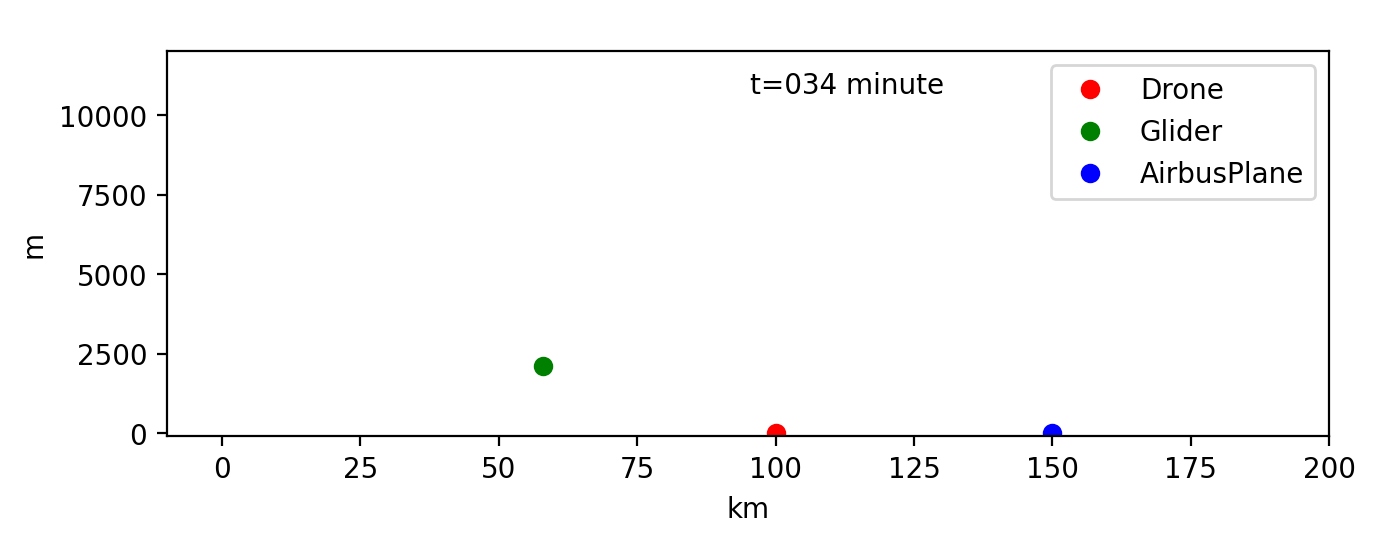

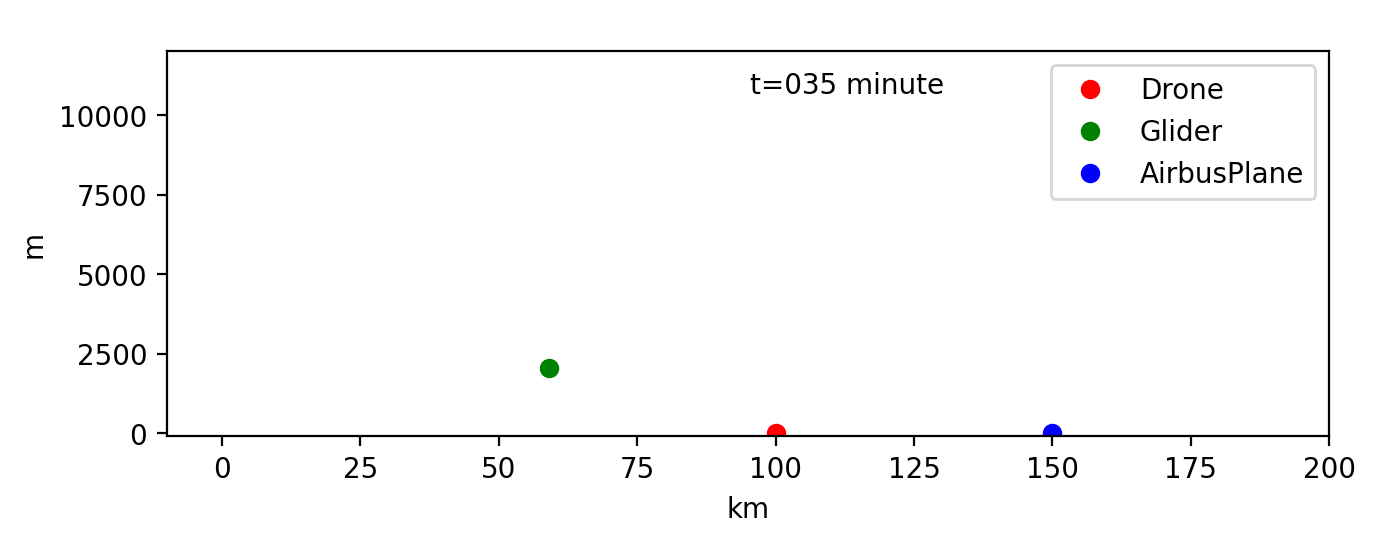

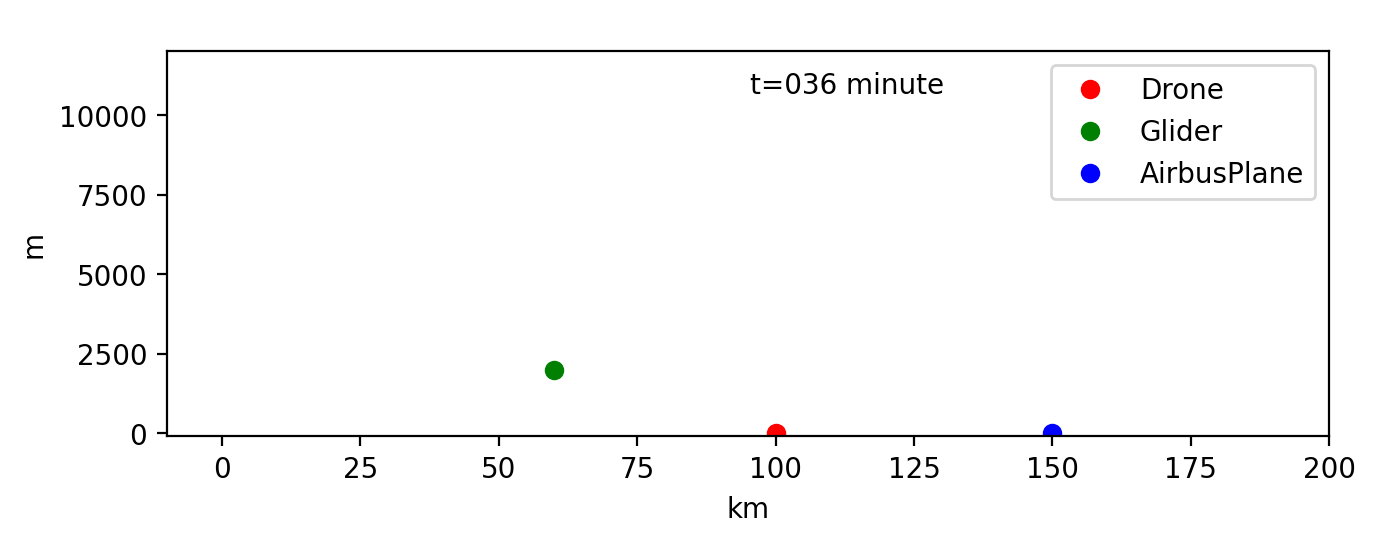

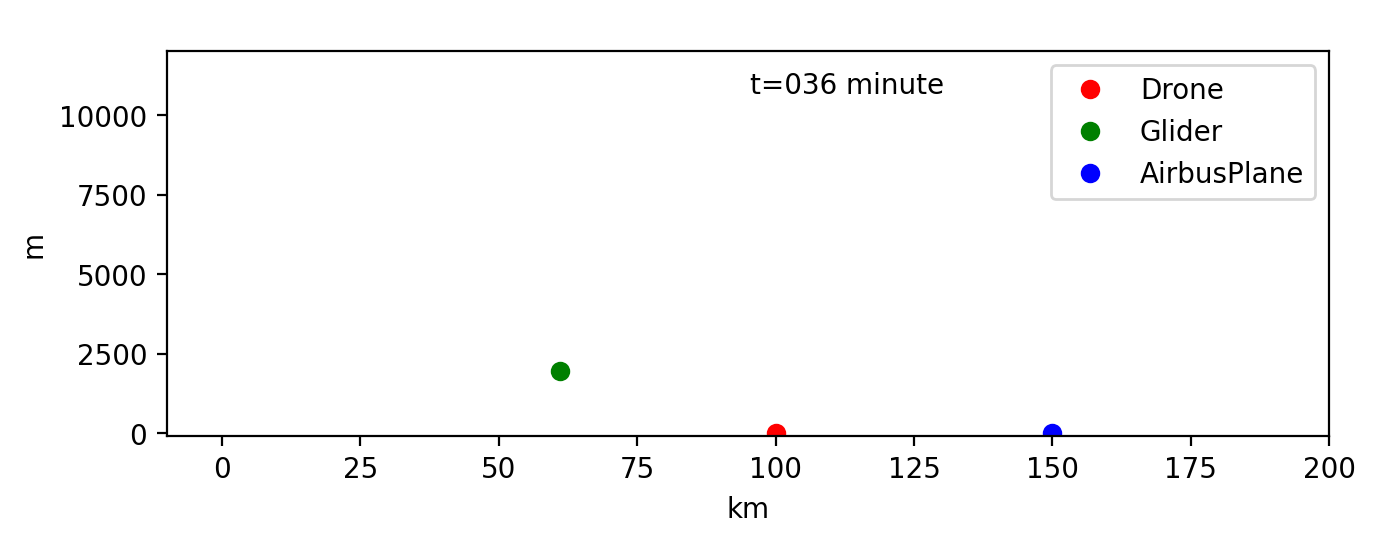

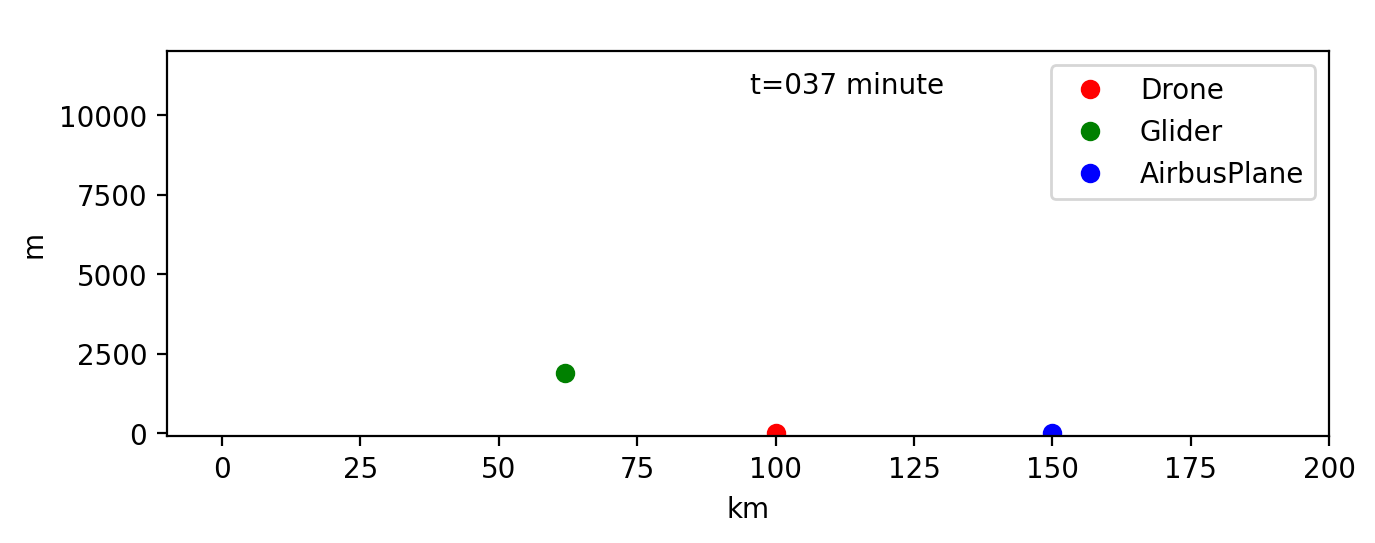

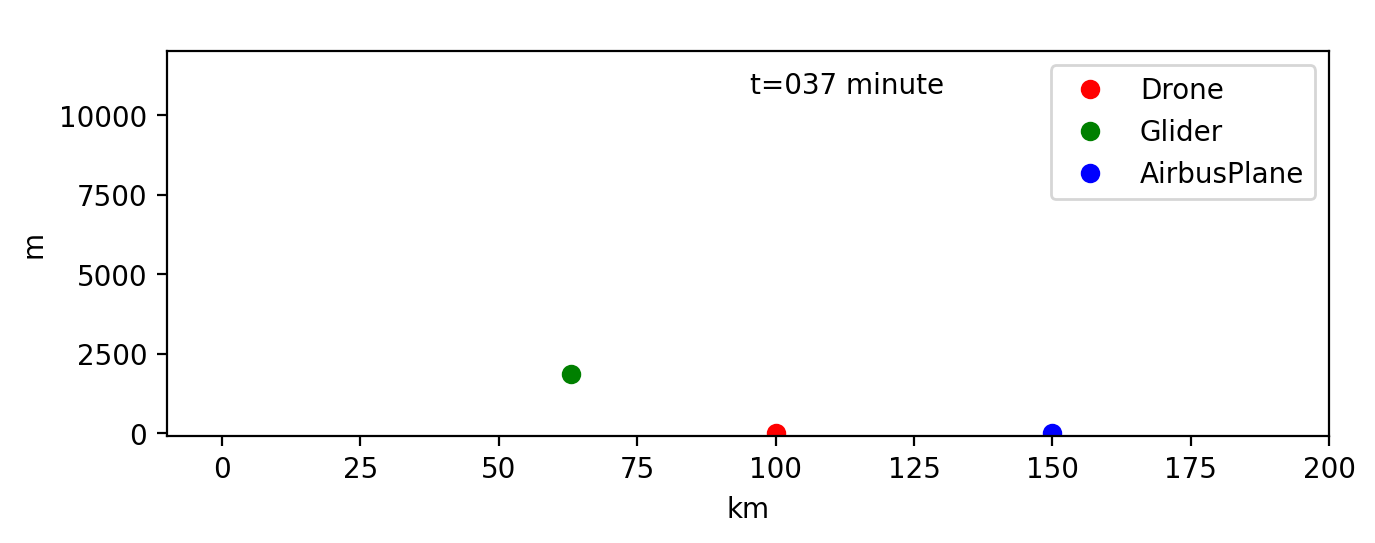

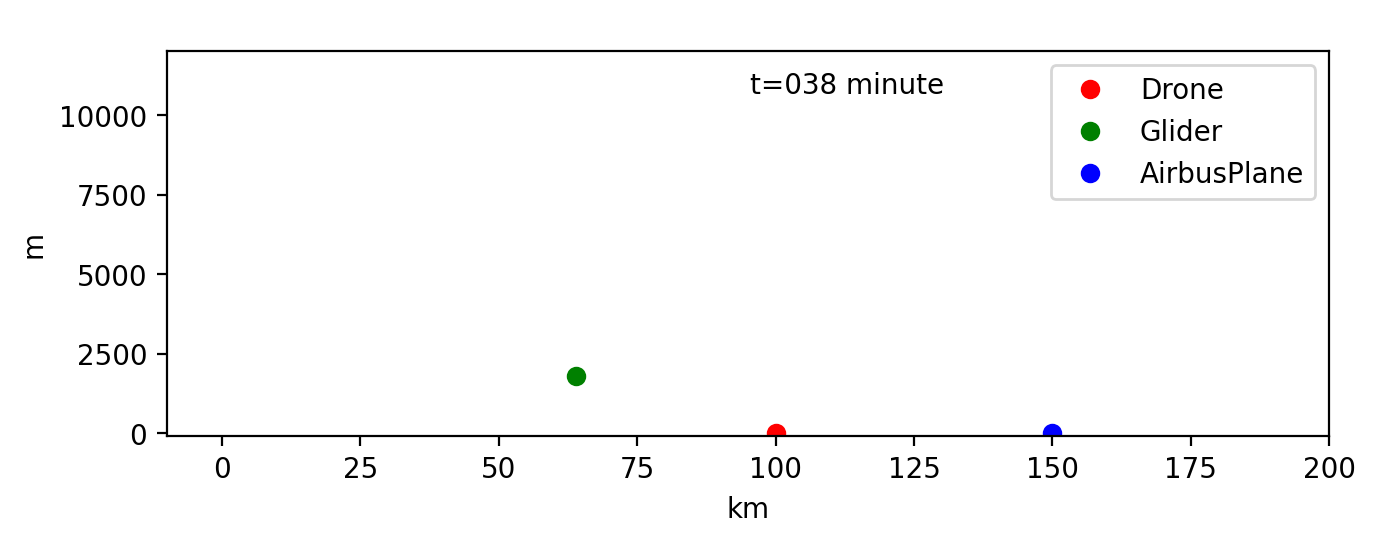

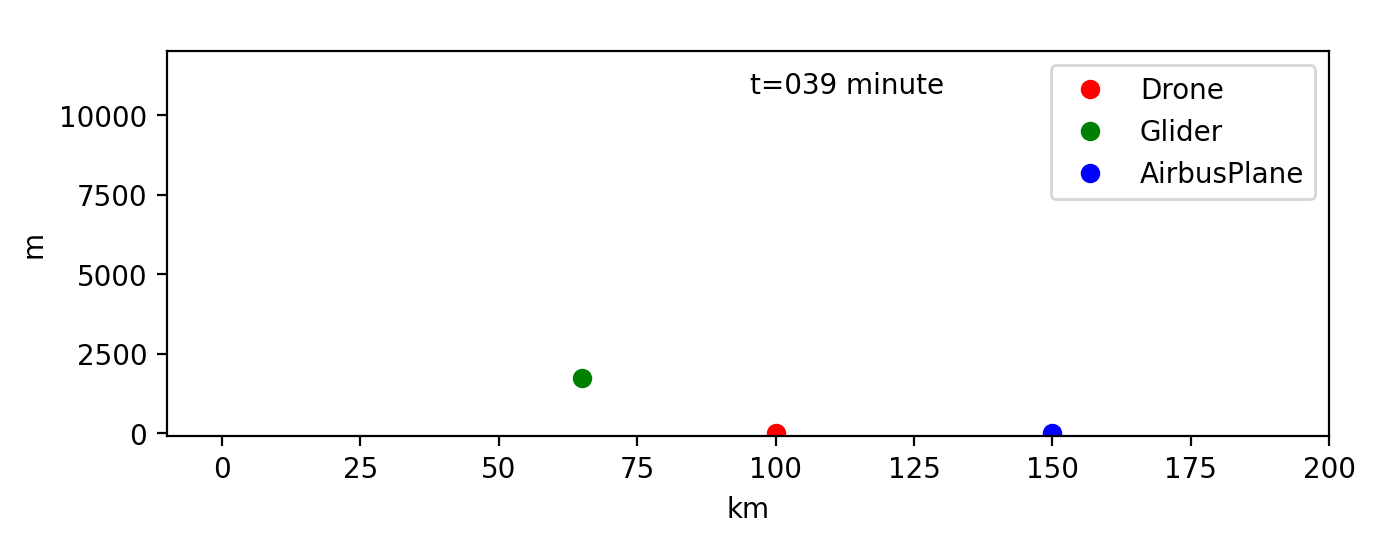

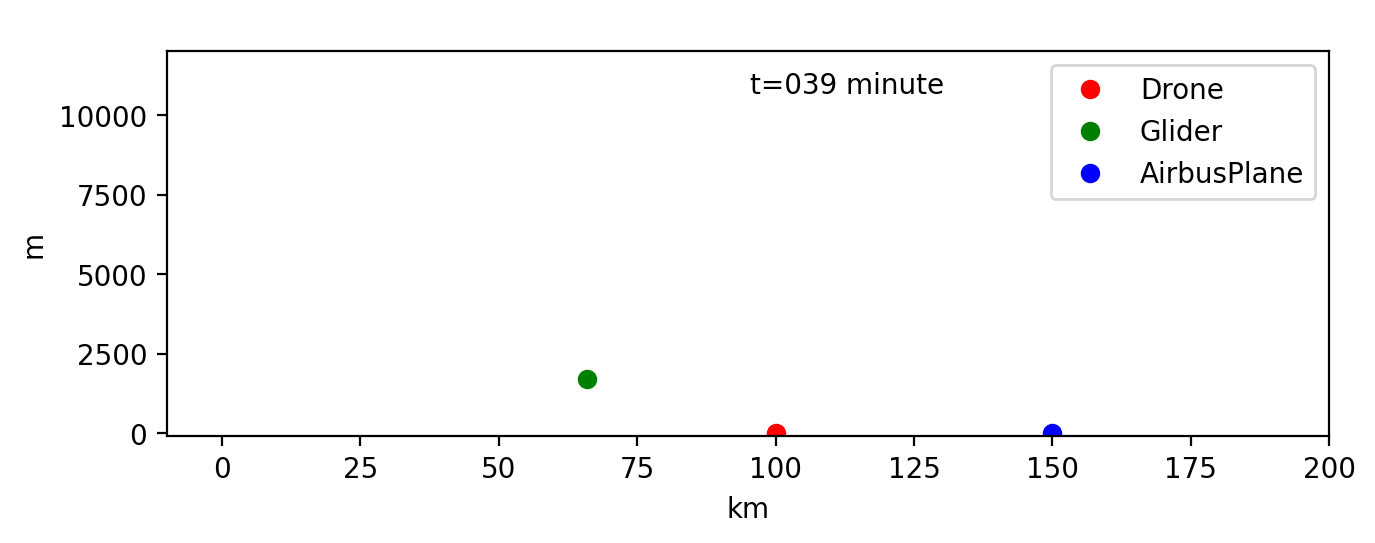

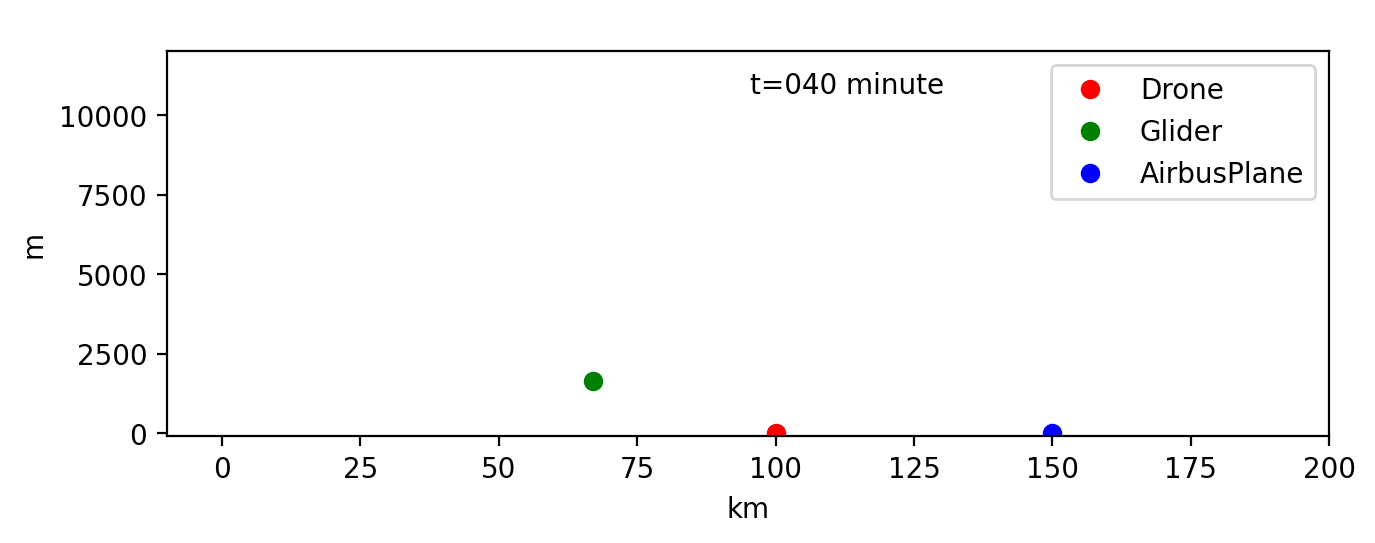

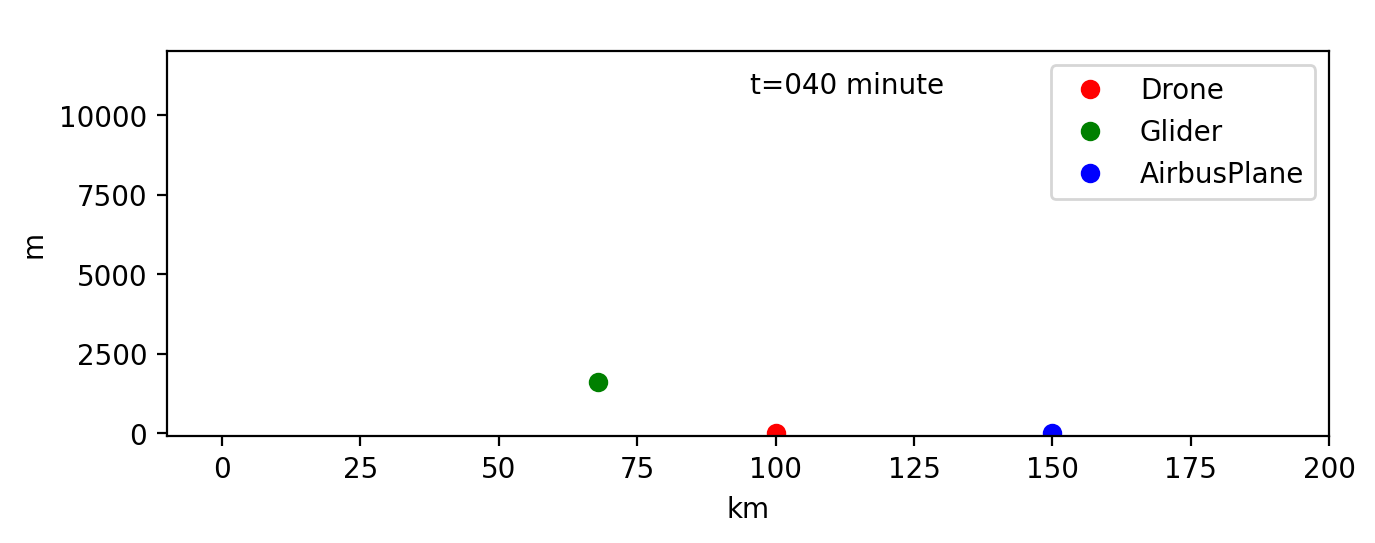

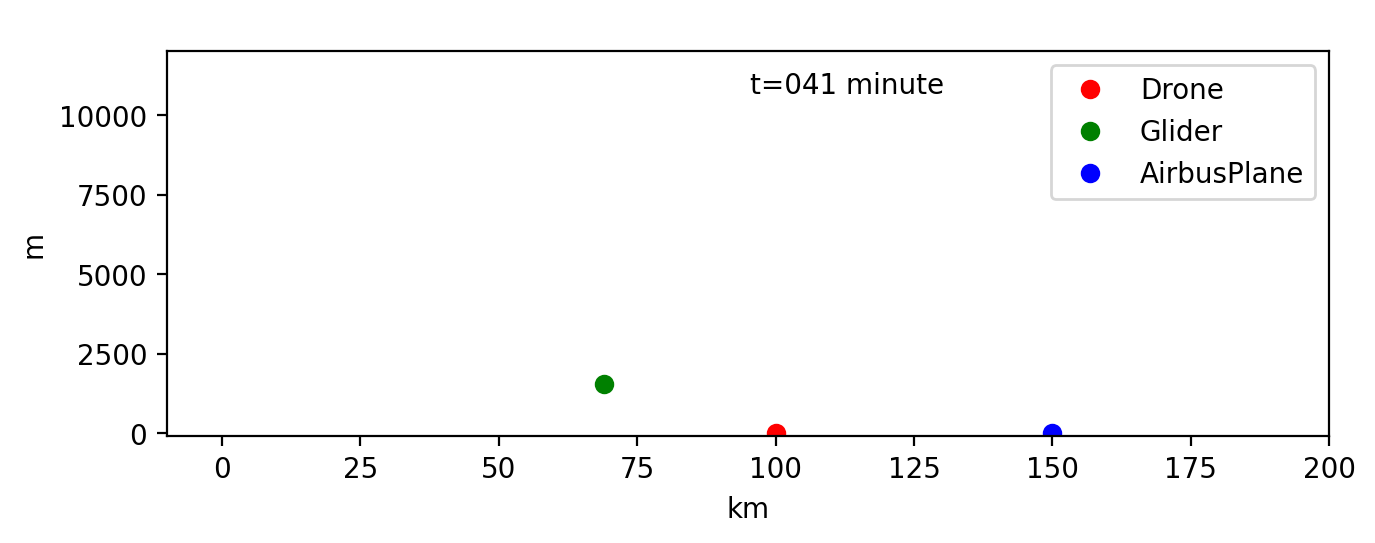

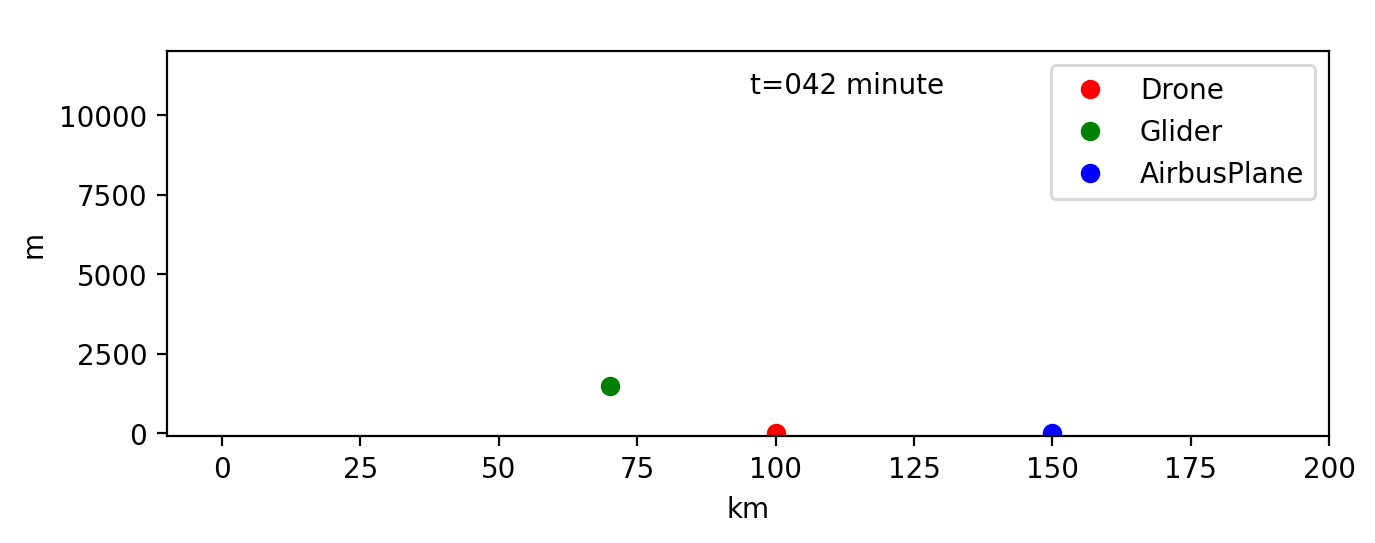

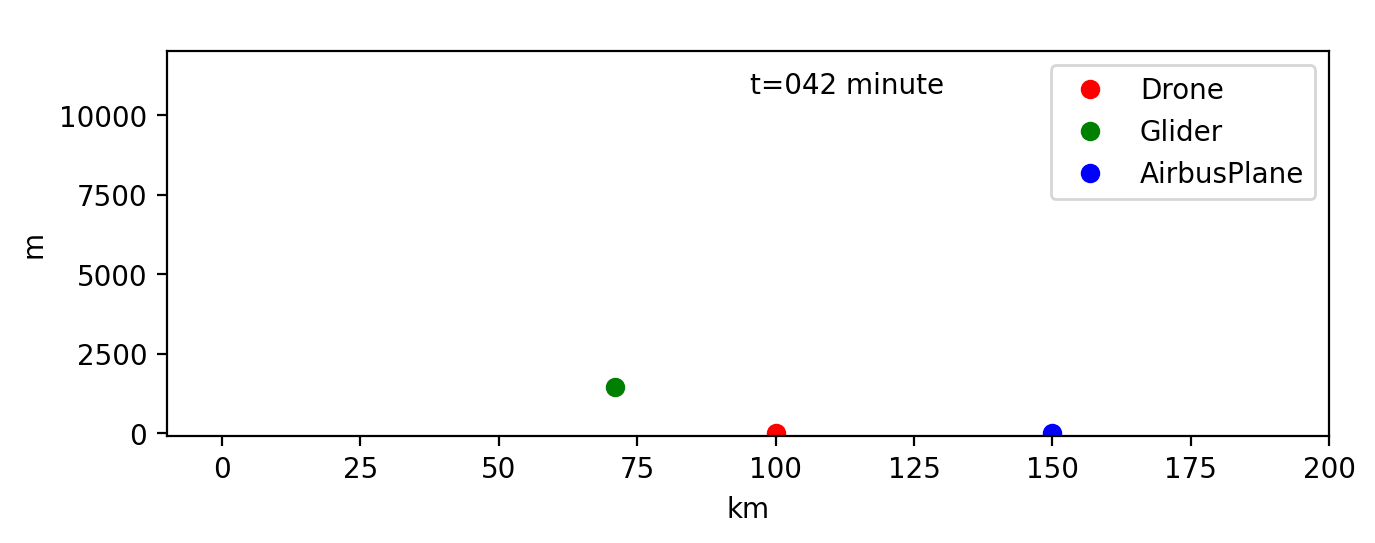

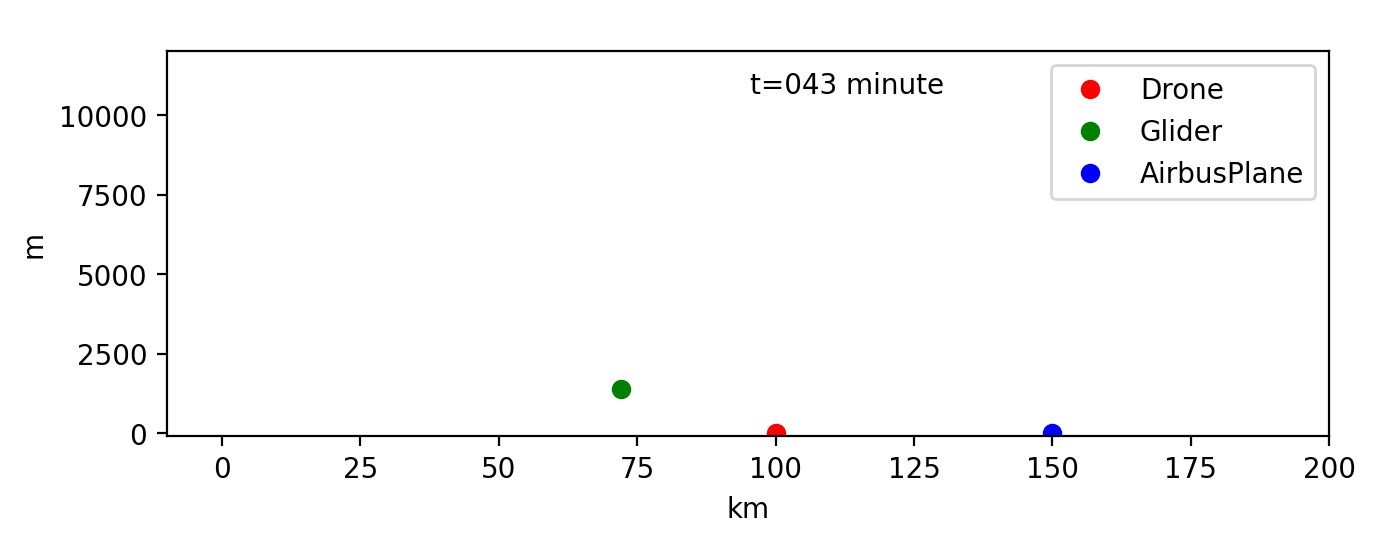

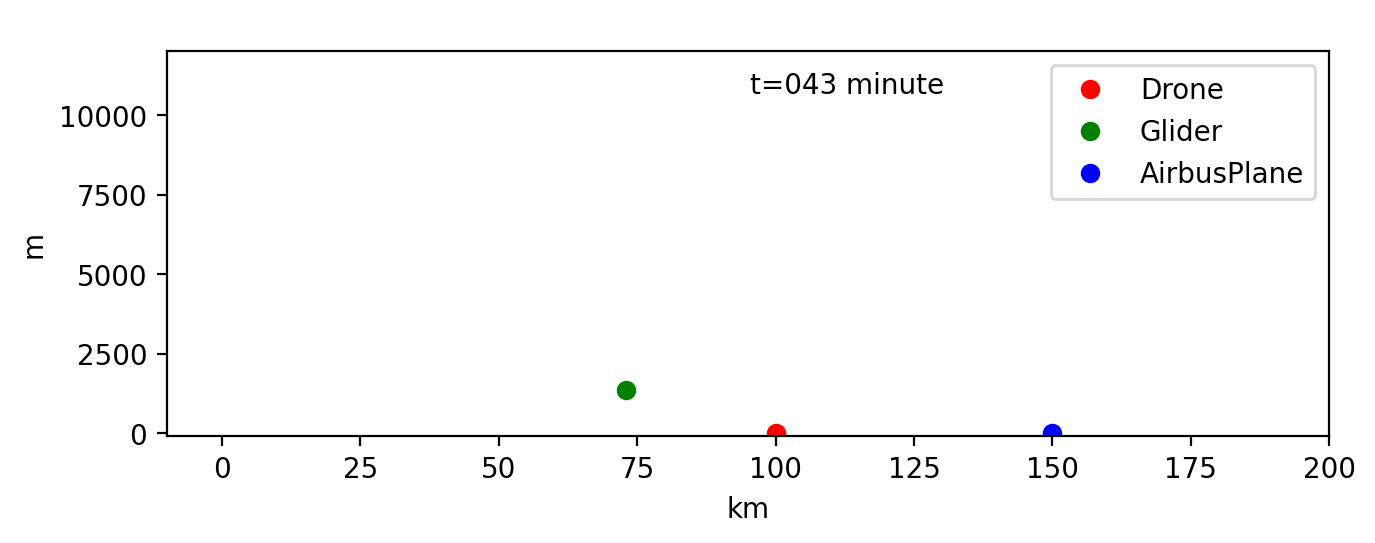

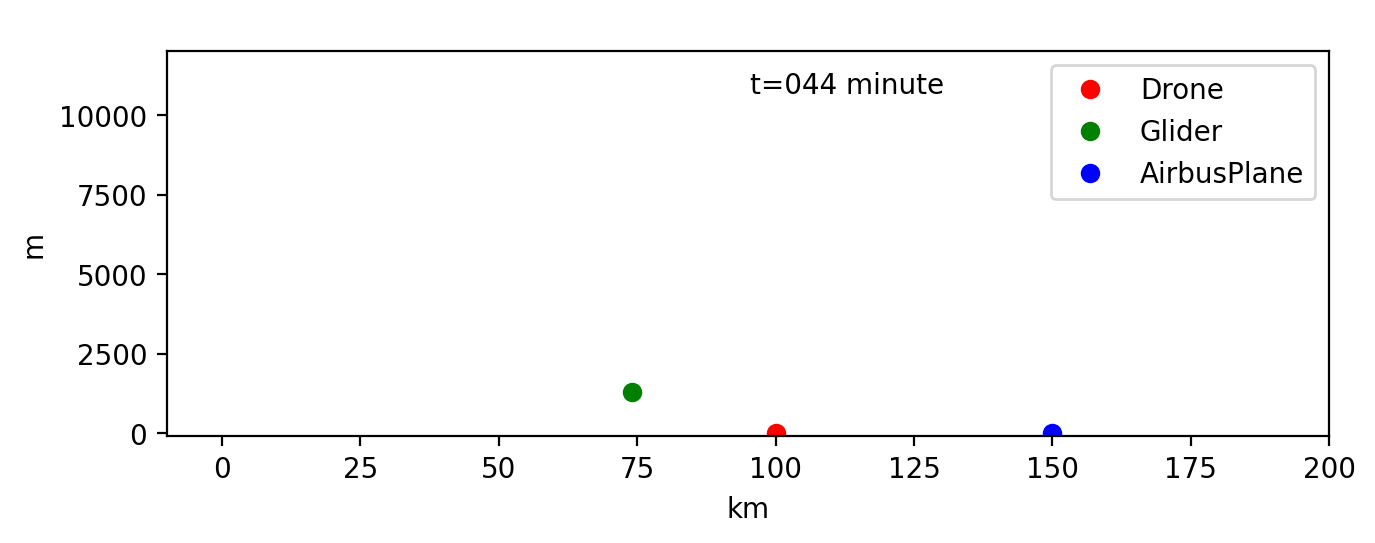

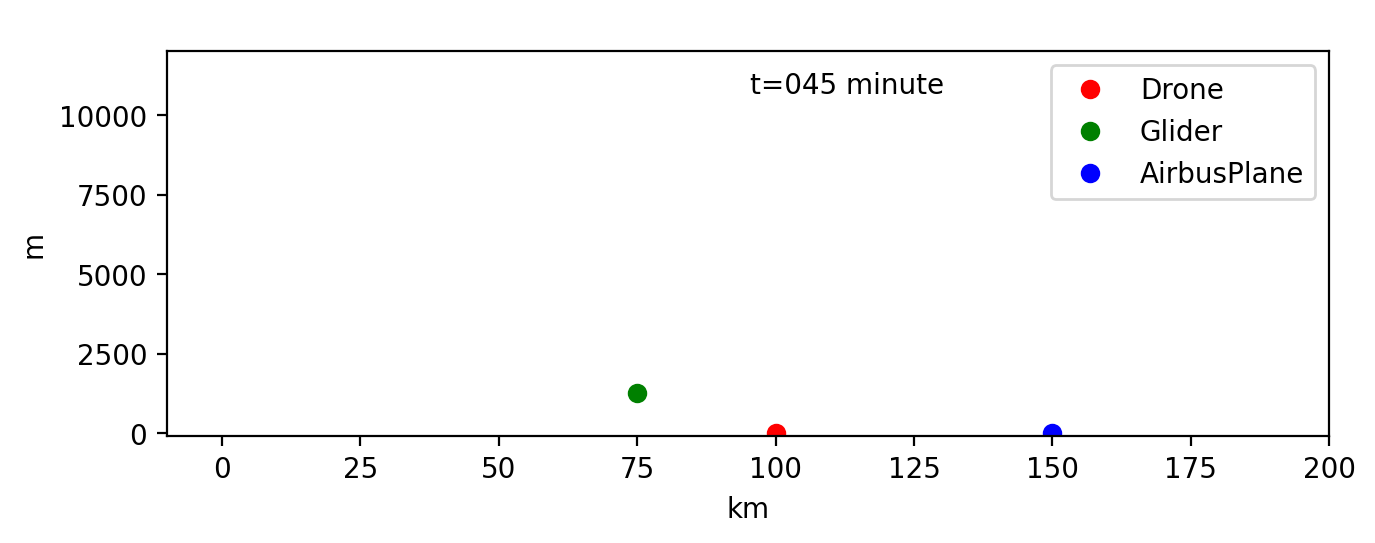

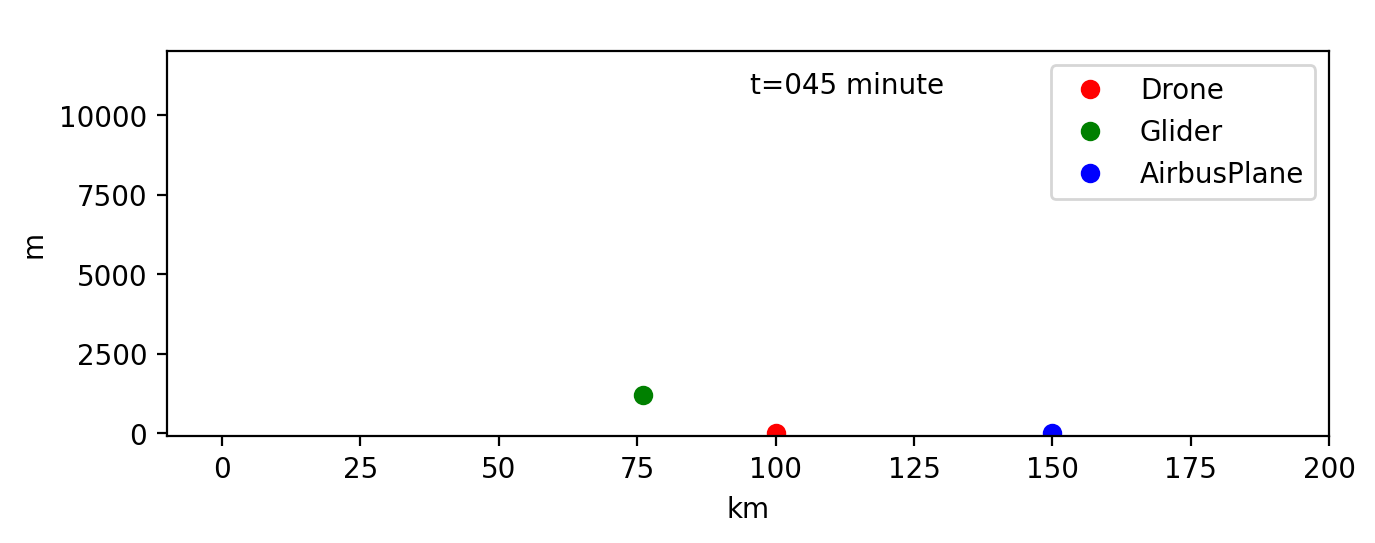

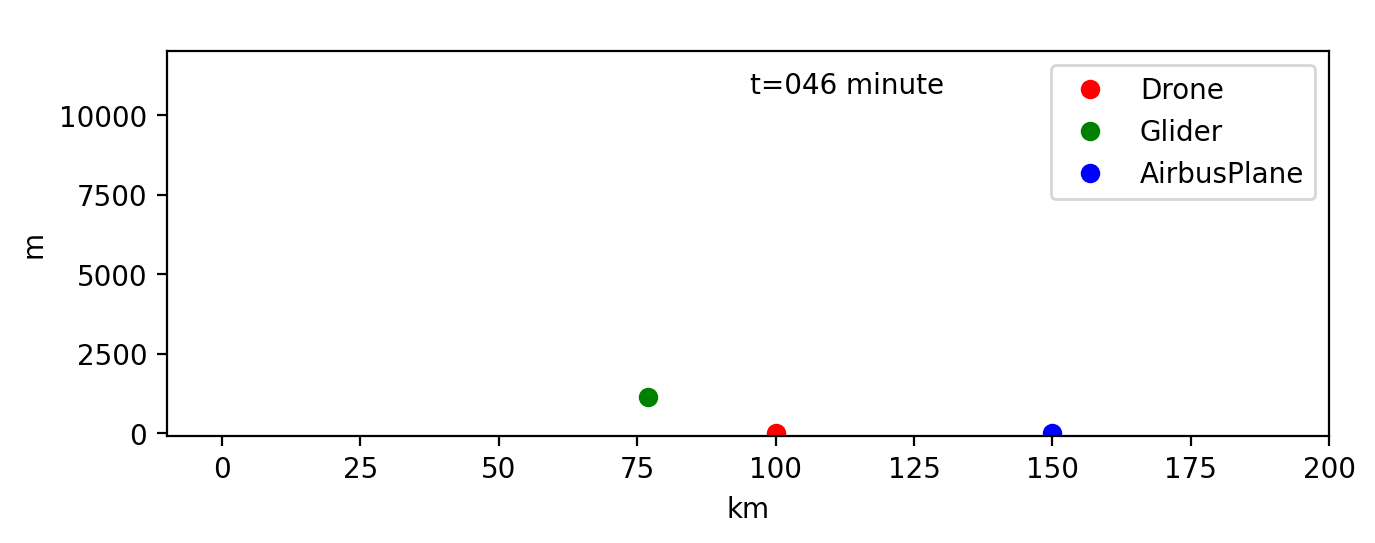

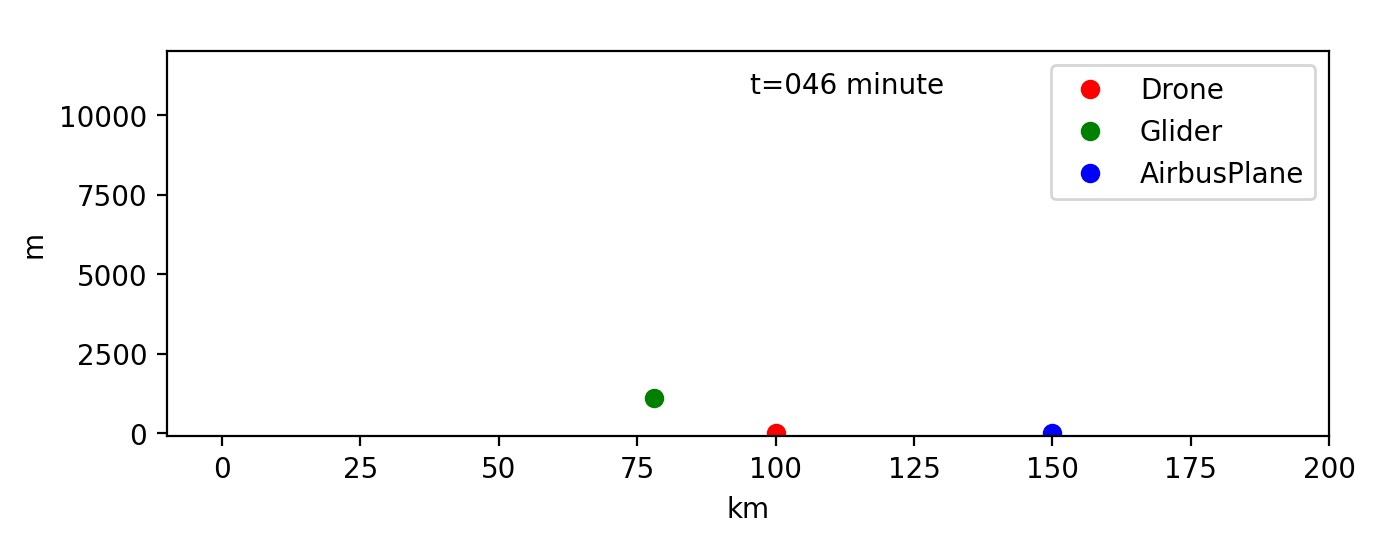

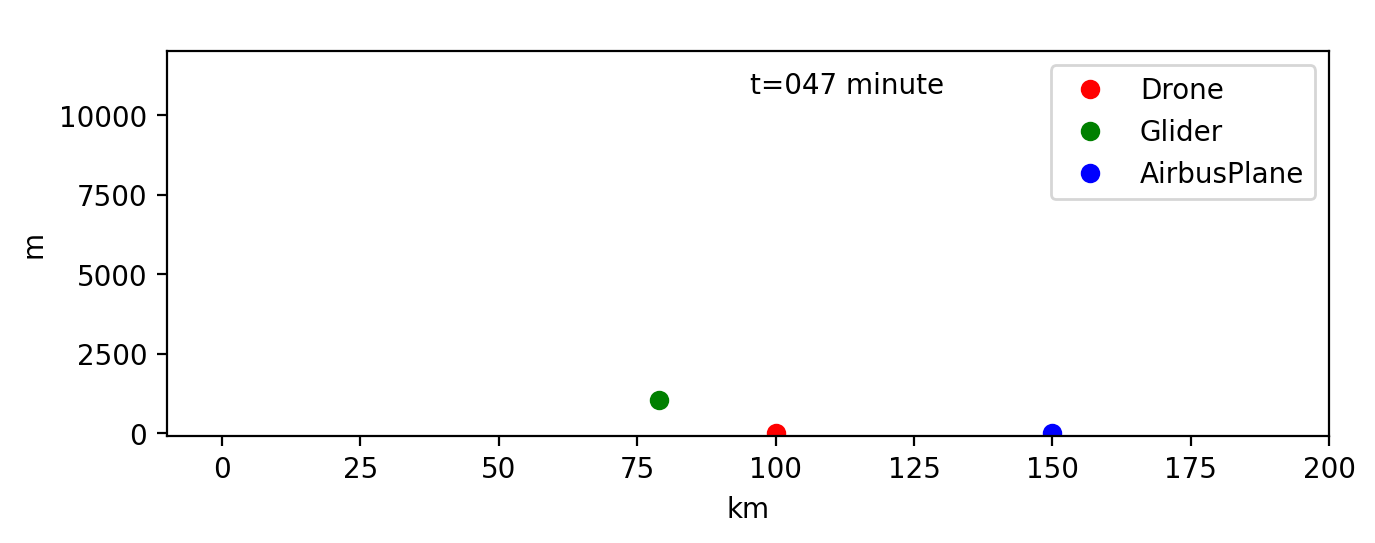

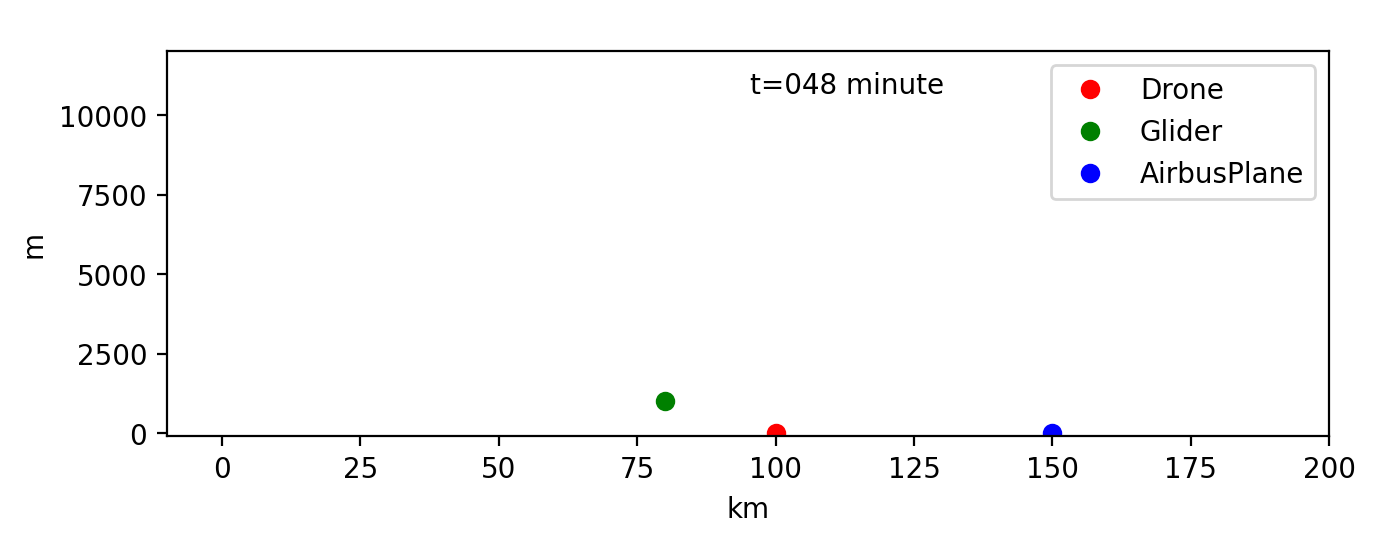

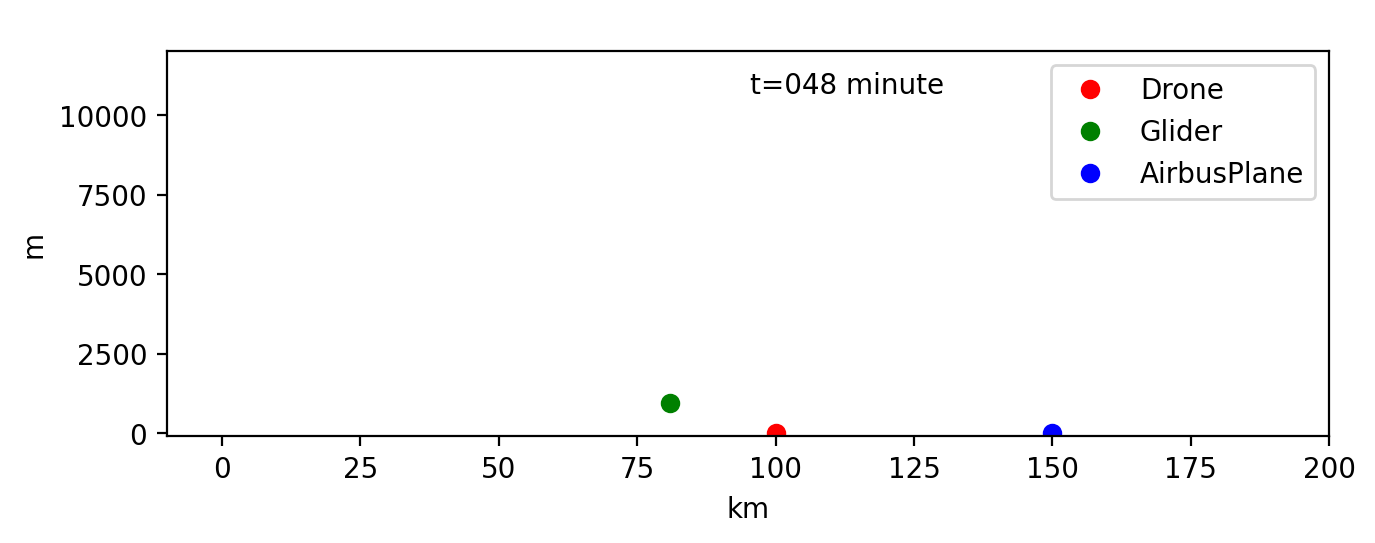

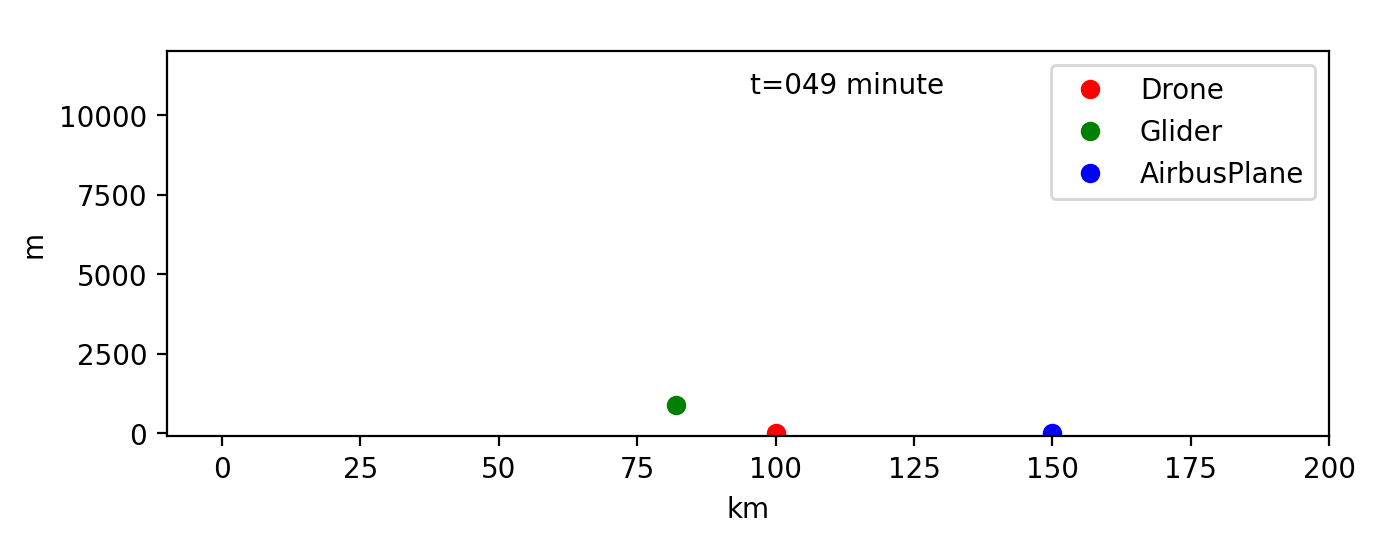

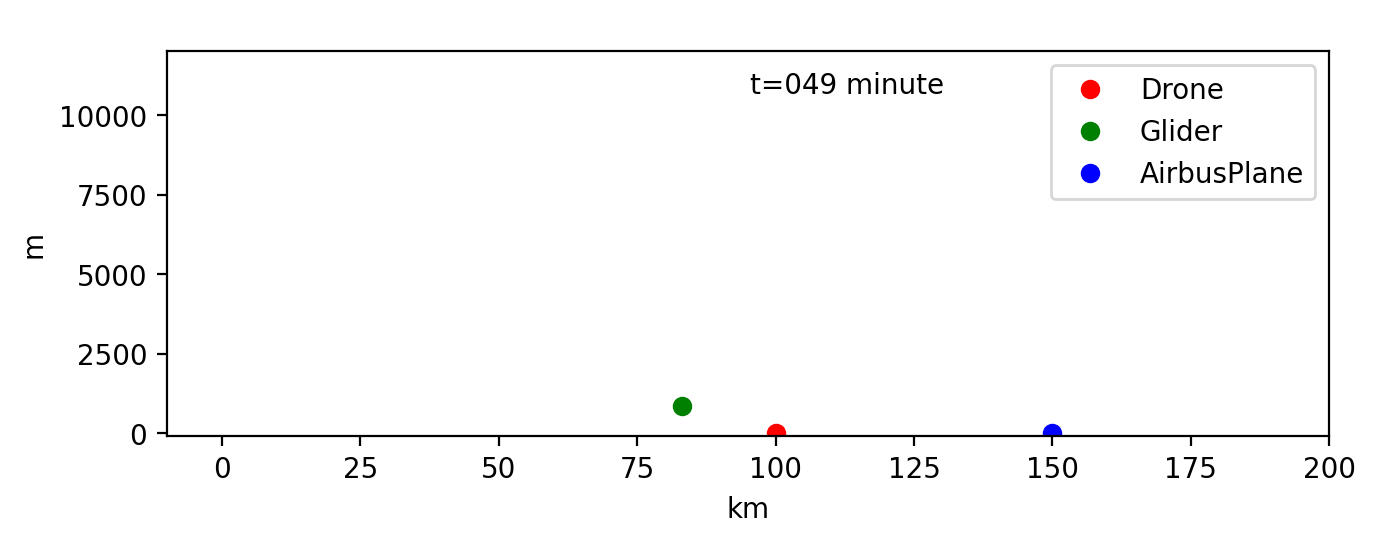

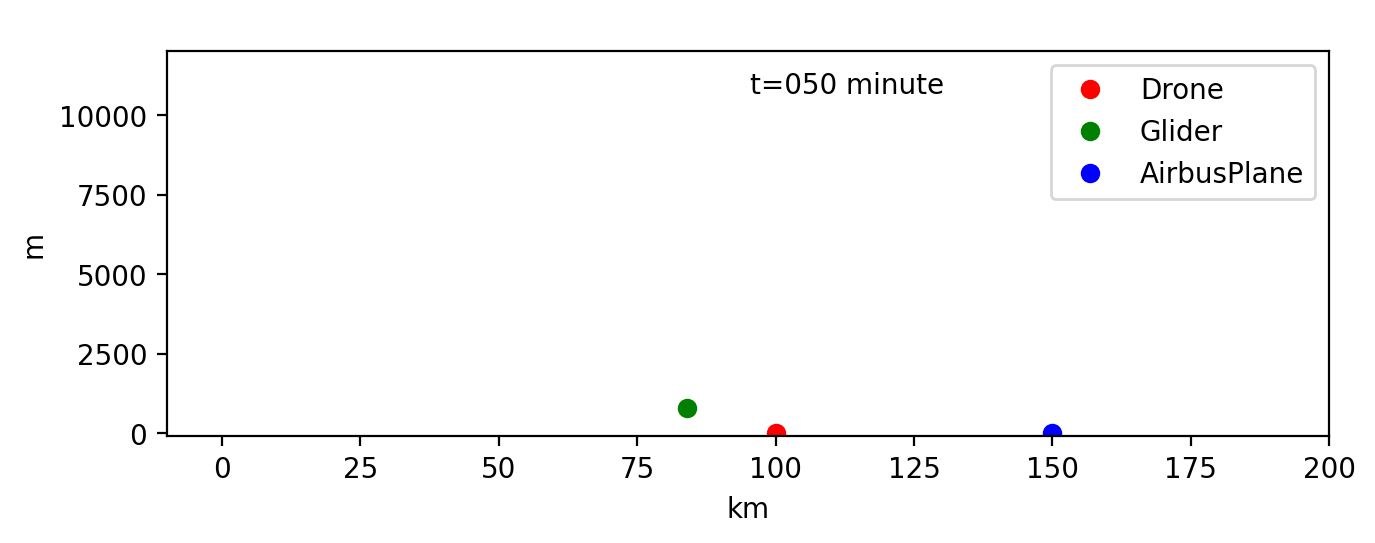

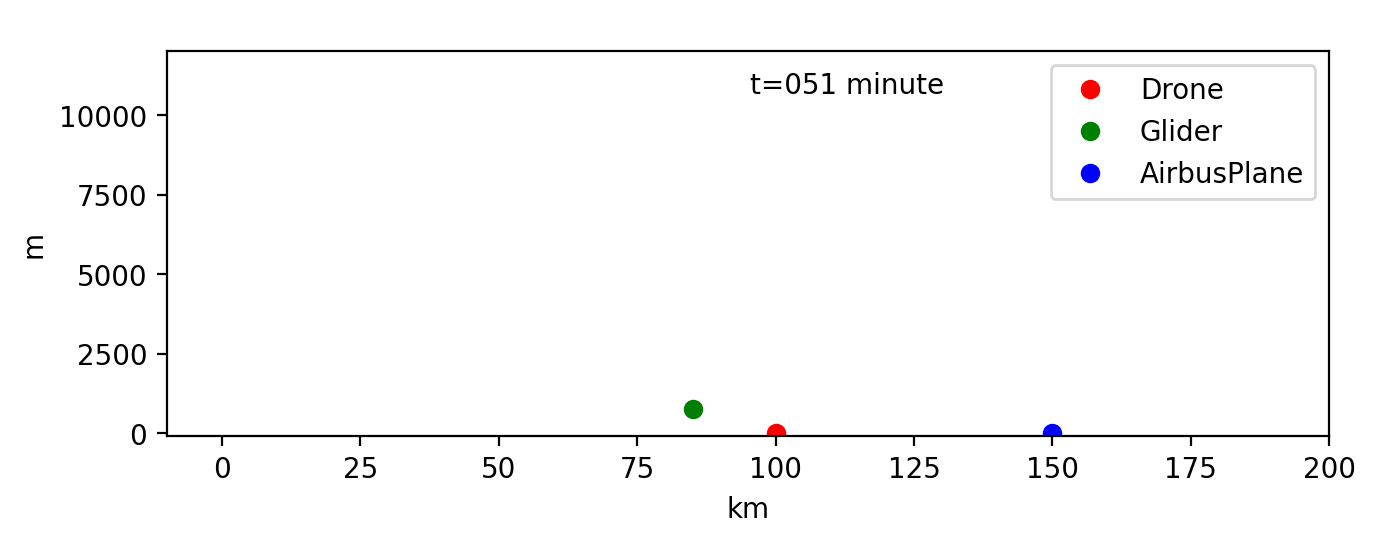

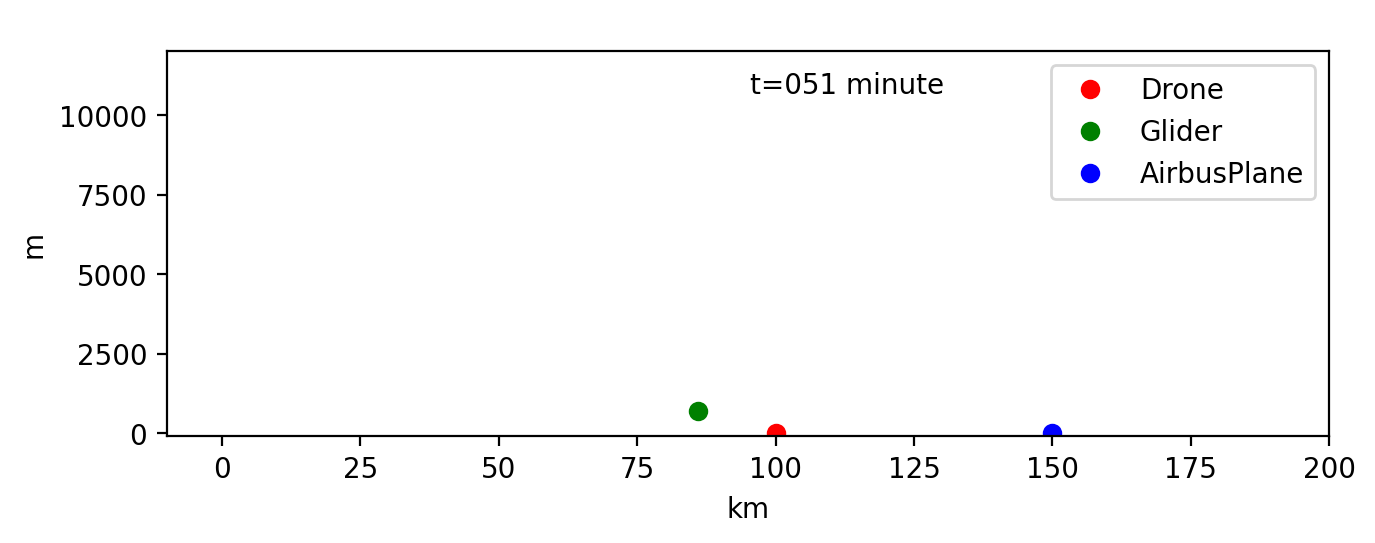

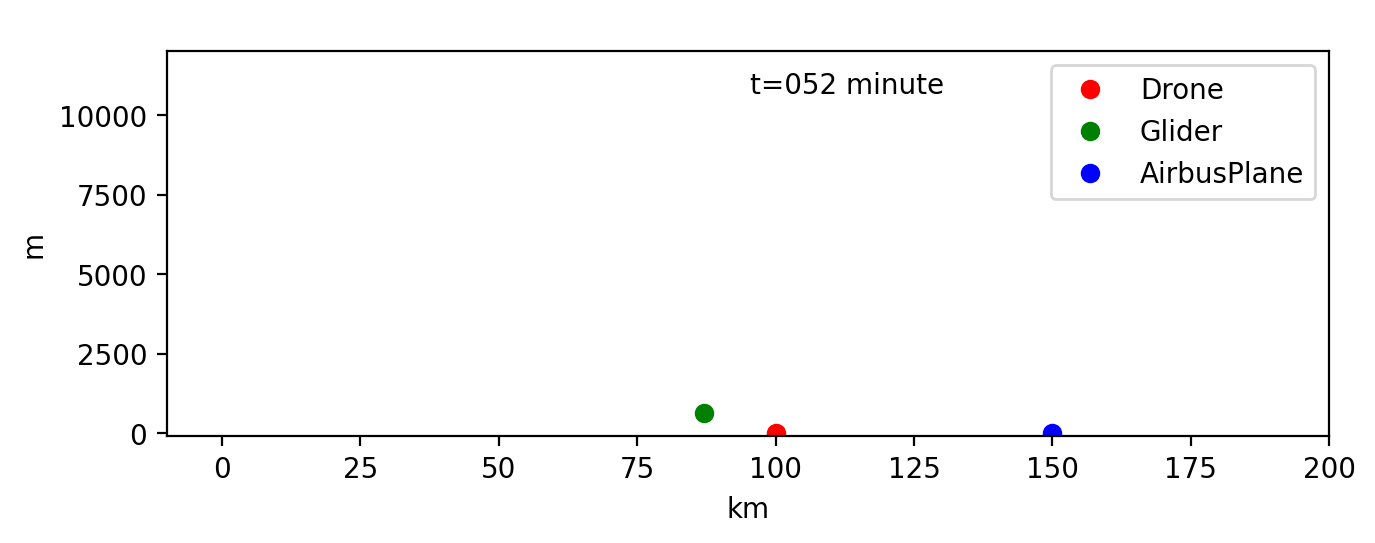

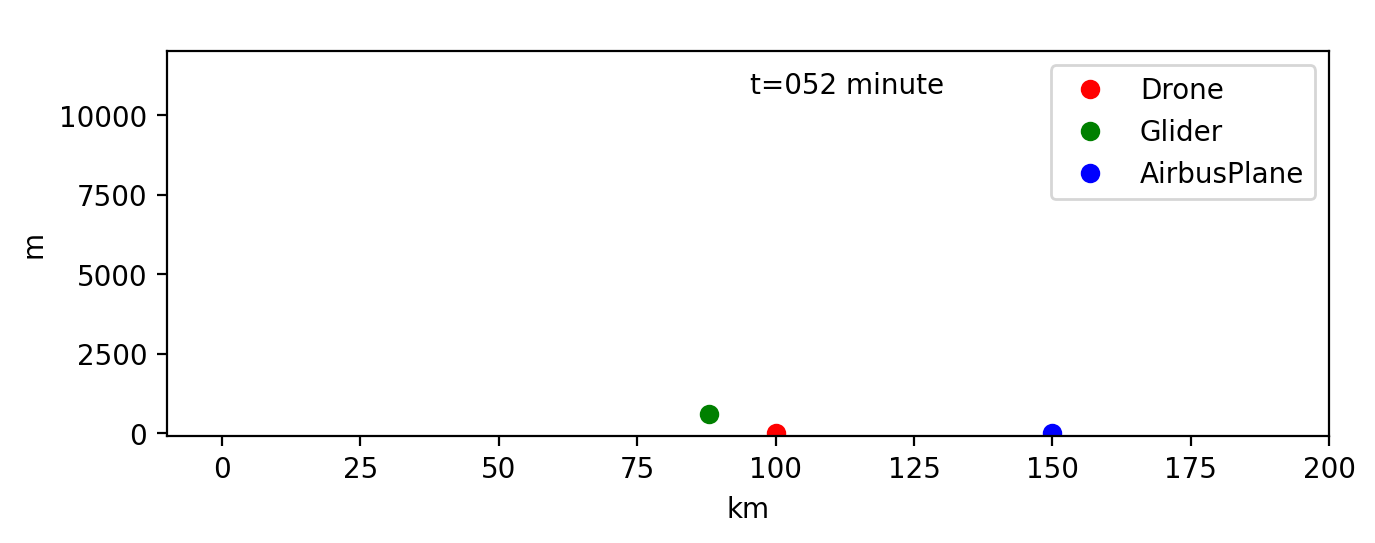

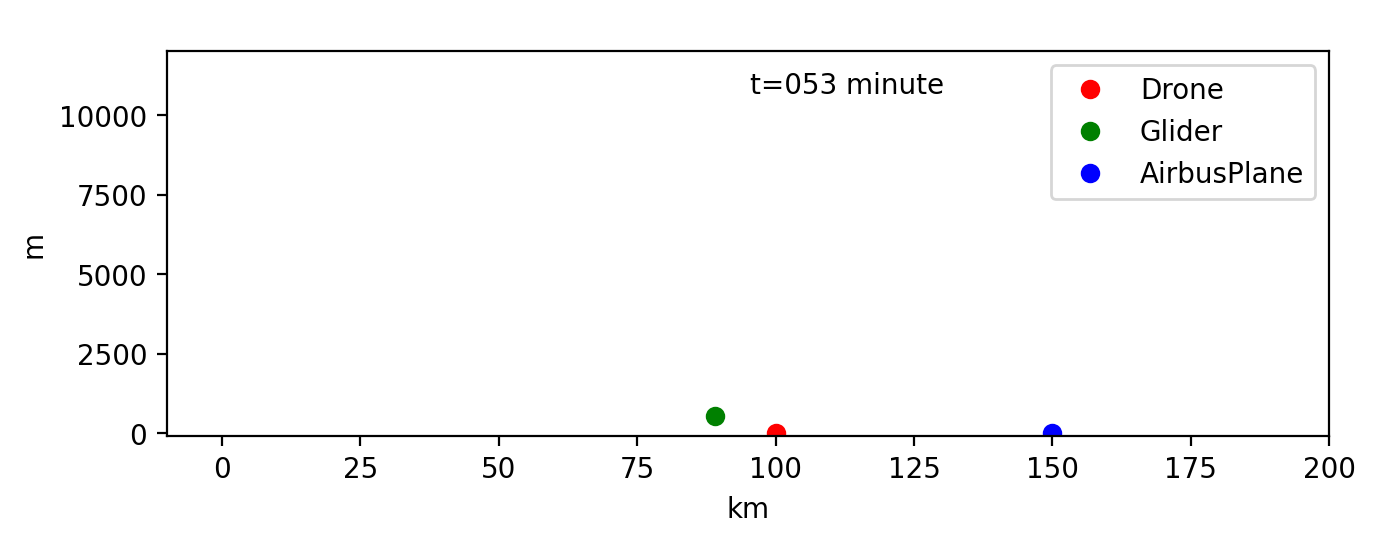

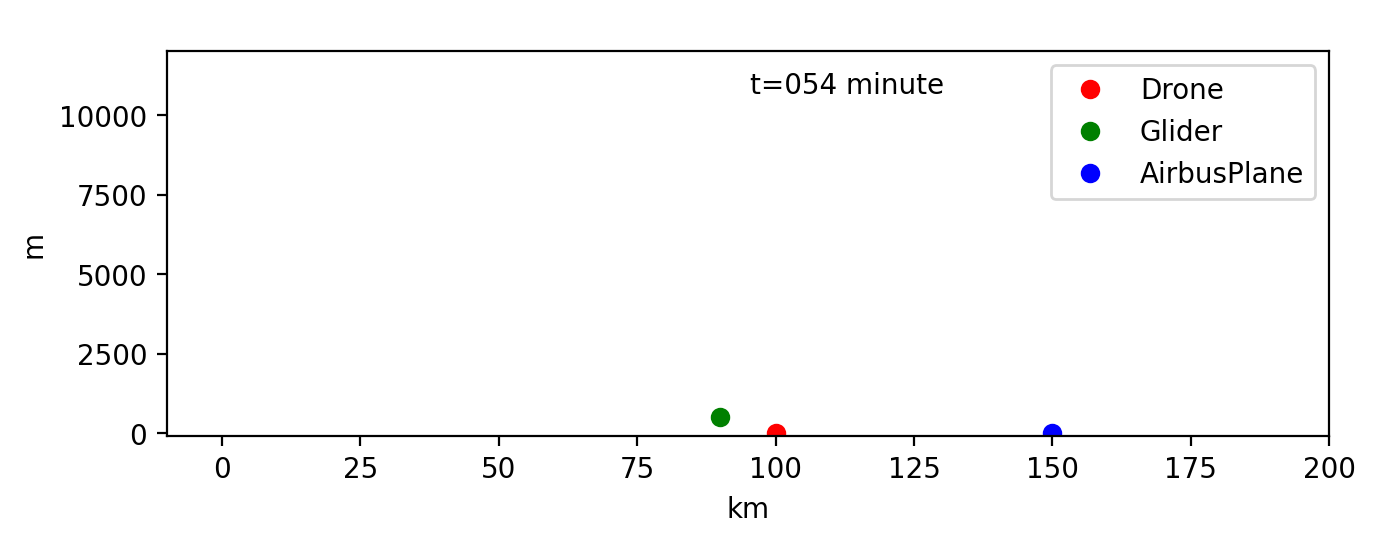

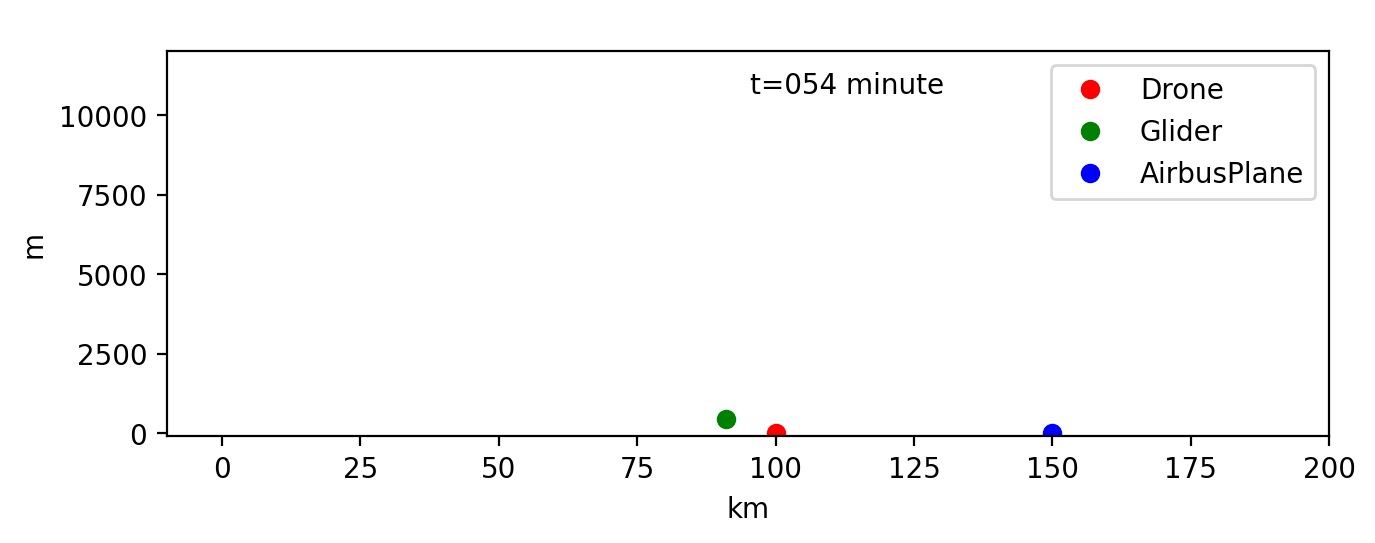

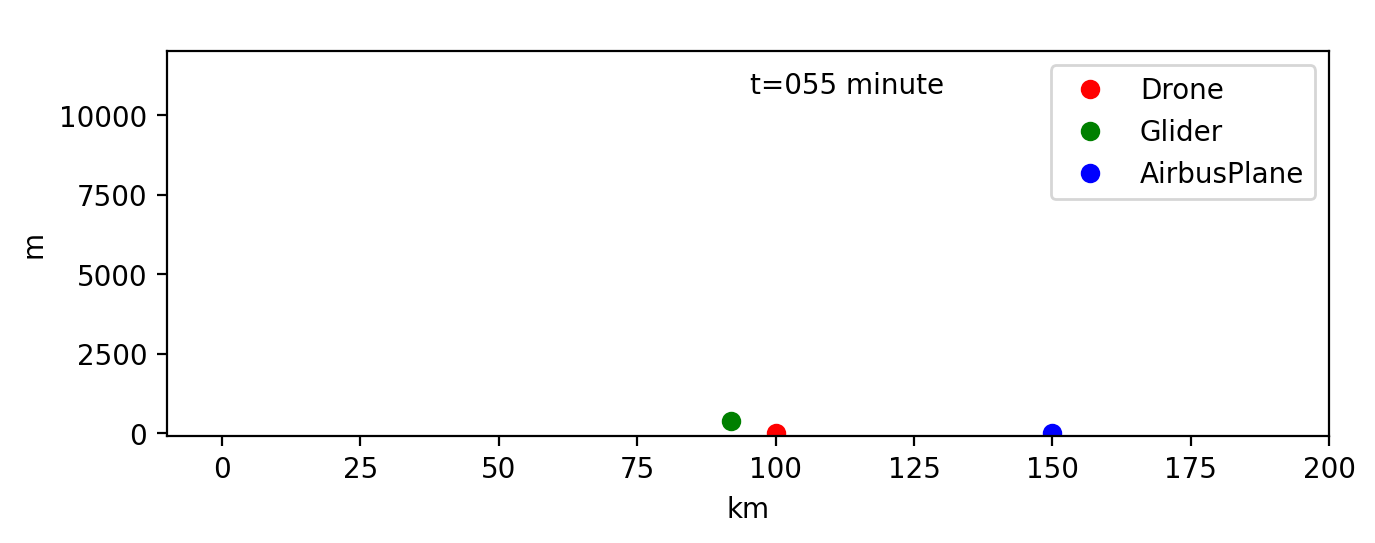

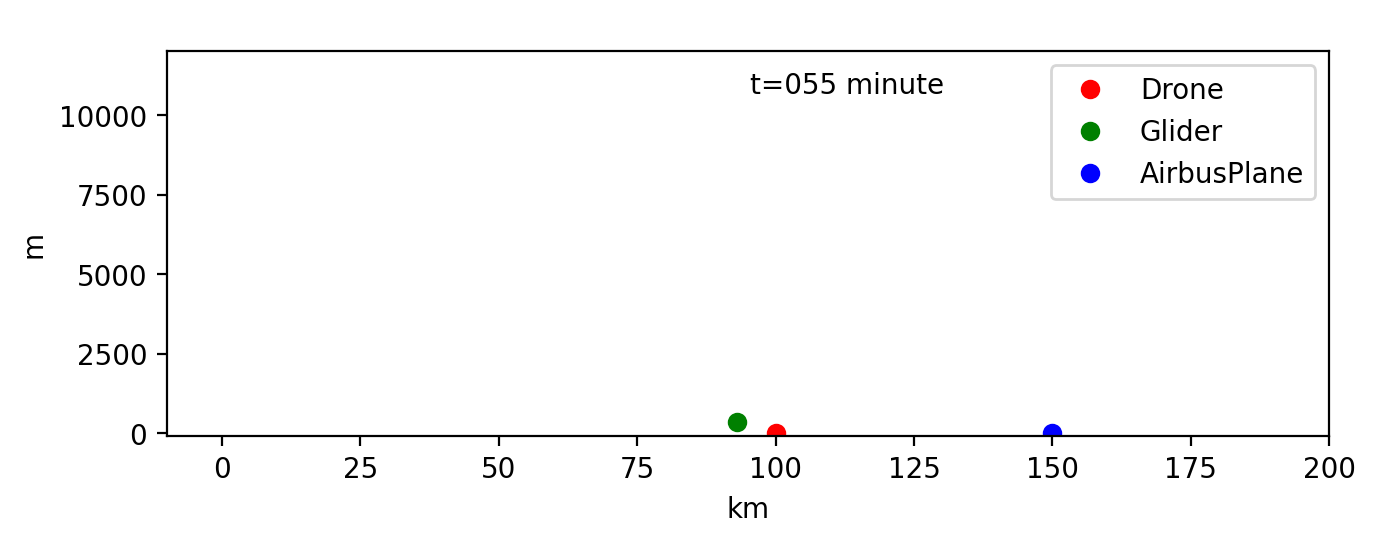

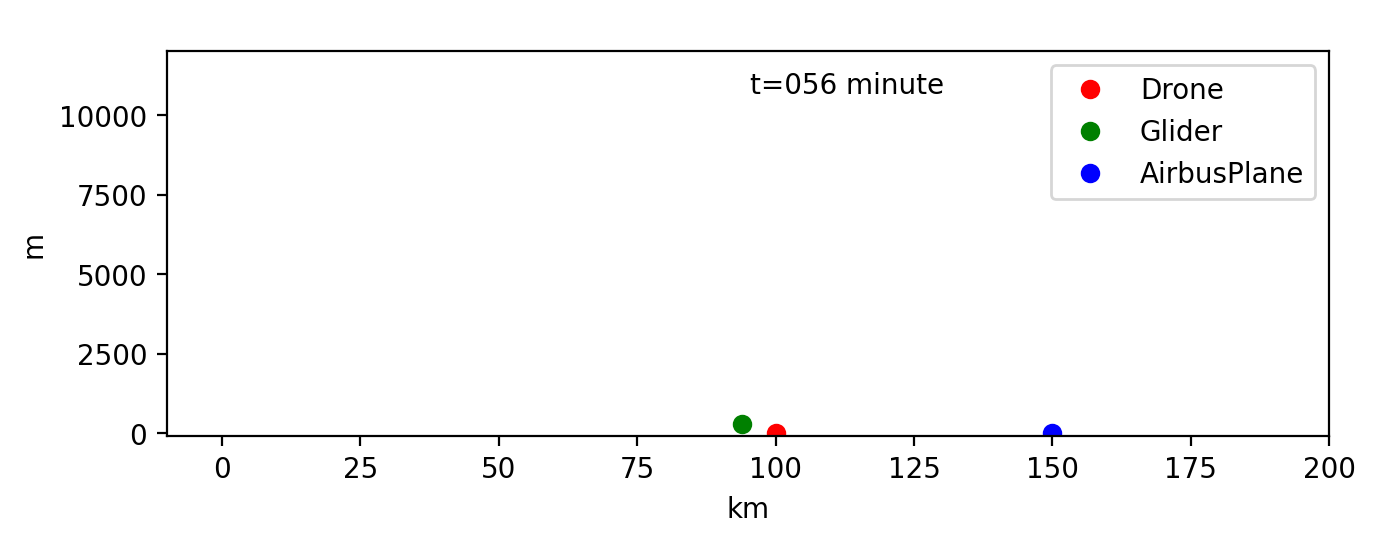

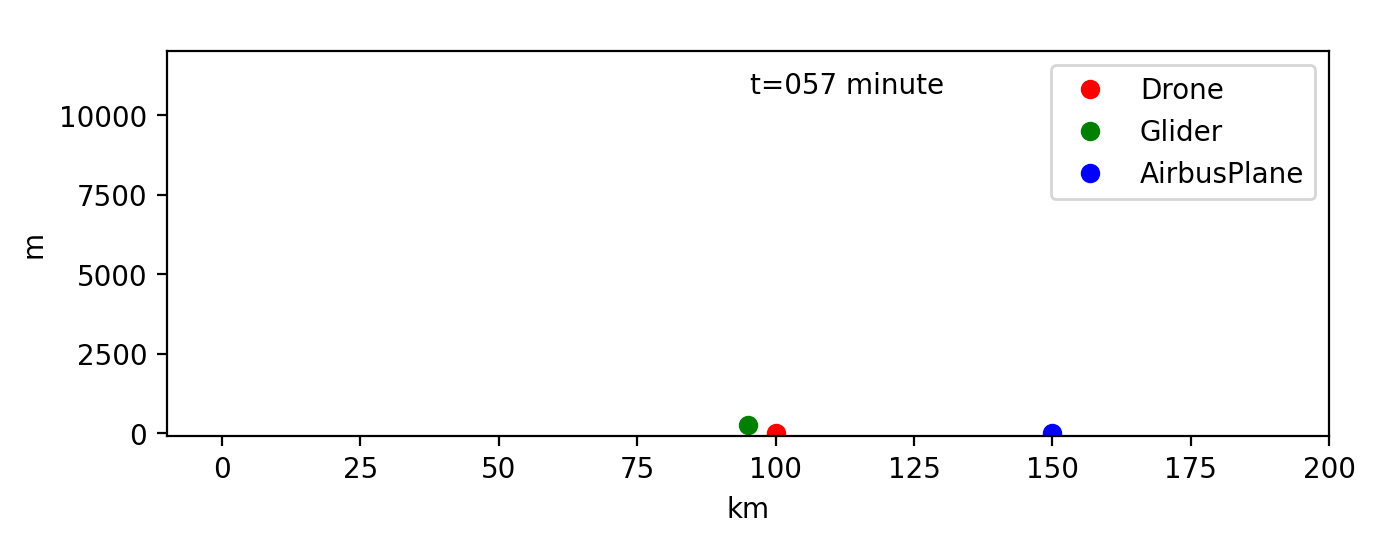

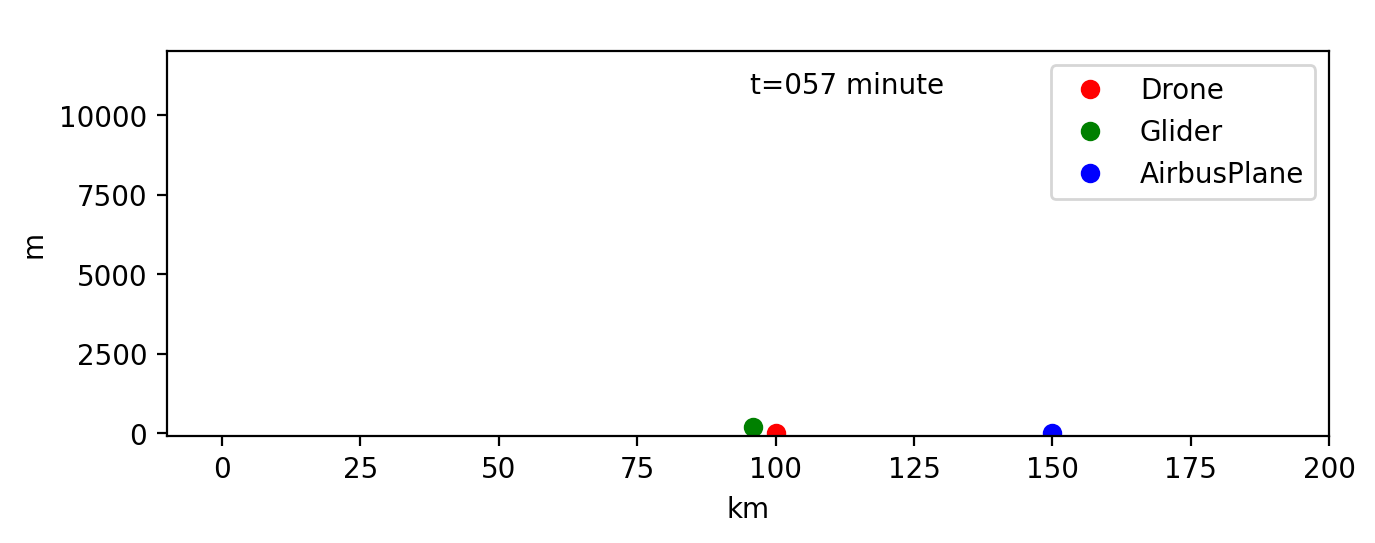

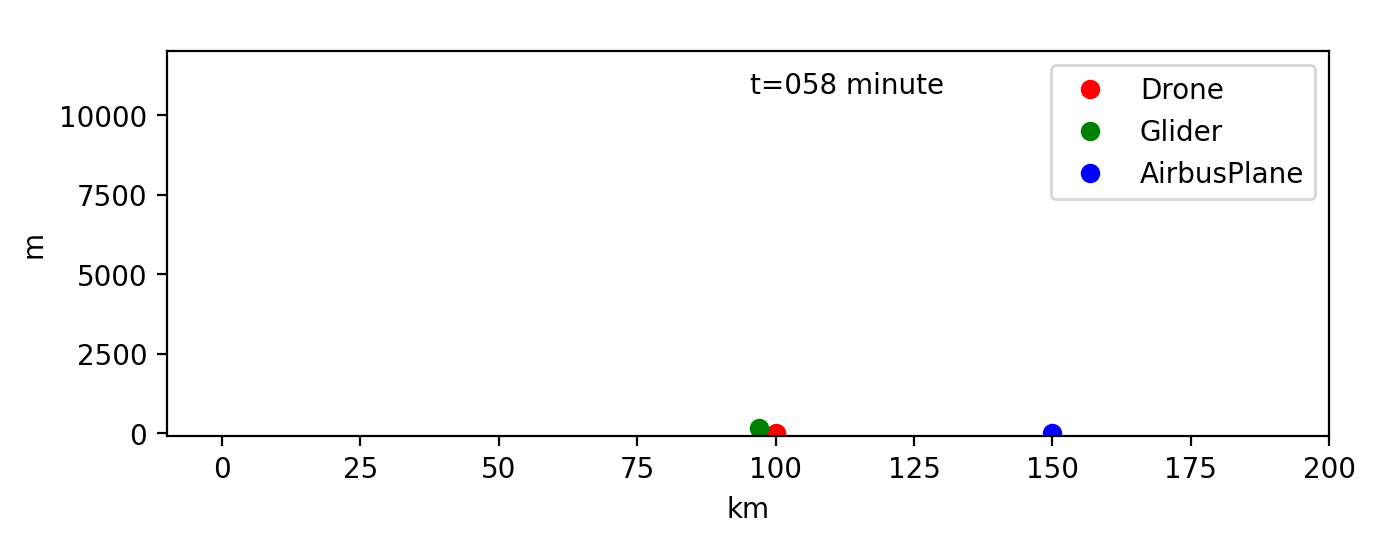

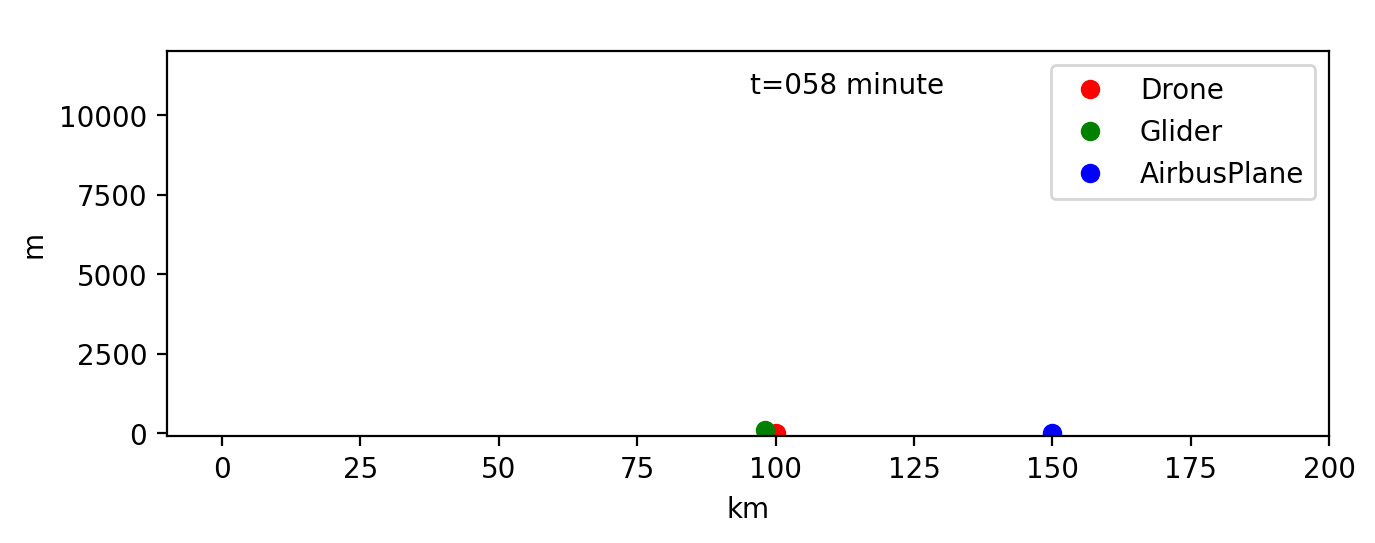

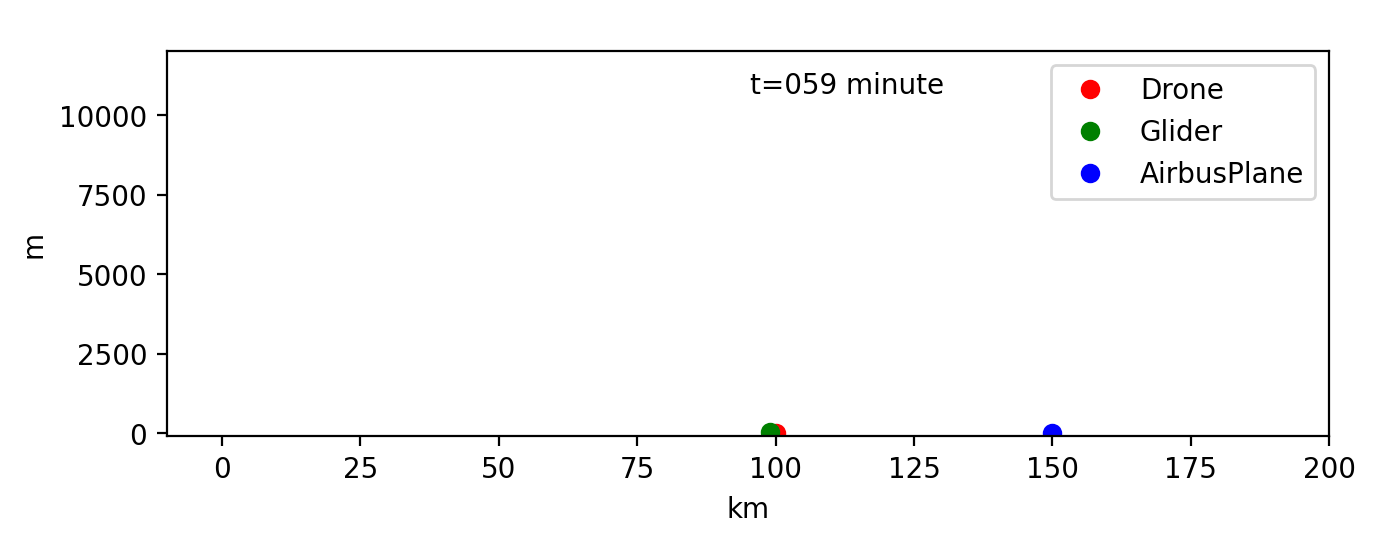

In [102]:
sim = Simulator(planes=planes)

sim.run_sim()

In [103]:
import imageio, glob
images = []

filenames = glob.glob("figs/fig_*.png")
filenames = sorted(filenames)
print(len(filenames))

for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('plane_traj.gif', images)

100


/var/folders/71/d5xhvtkn215cb3g26qsjh5q00000gn/T/ipykernel_24485/691581119.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [104]:
sim.planes_trajectories

[[(0, 500, 200), (0, 5000, 100), (0, 10000, 500)],
 [(2.0, 500, 200), (1.0, 4950.0, 100), (5.0, 10000, 500)],
 [(4.0, 500, 200), (2.0, 4900.0, 100), (10.0, 10000, 500)],
 [(6.0, 500, 200), (3.0, 4850.0, 100), (15.0, 10000, 500)],
 [(8.0, 500, 200), (4.0, 4800.0, 100), (20.0, 10000, 500)],
 [(10.0, 500, 200), (5.0, 4750.0, 100), (25.0, 10000, 500)],
 [(12.0, 500, 200), (6.0, 4700.0, 100), (30.0, 10000, 500)],
 [(14.0, 500, 200), (7.0, 4650.0, 100), (35.0, 10000, 500)],
 [(16.0, 500, 200), (8.0, 4600.0, 100), (40.0, 10000, 500)],
 [(18.0, 500, 200), (9.0, 4550.0, 100), (45.0, 10000, 500)],
 [(20.0, 500, 200), (10.0, 4500.0, 100), (50.0, 10000, 500)],
 [(22.0, 500, 200), (11.0, 4450.0, 100), (55.0, 9500.0, 500)],
 [(24.0, 500, 200), (12.0, 4400.0, 100), (60.0, 9000.0, 500)],
 [(26.0, 500, 200), (13.0, 4350.0, 100), (65.0, 8500.0, 500)],
 [(28.0, 500, 200), (14.0, 4300.0, 100), (70.0, 8000.0, 500)],
 [(30.0, 500, 200), (15.0, 4250.0, 100), (75.0, 7500.0, 500)],
 [(32.0, 500, 200), (16.0, 4

In [105]:
# let's plot the trajectories
def plot_plane_trajectory(Xs, Ys, plane_class, ax=None):
    plane_colors = {
        "Drone": "red",
        "Glider": "green",
        "AirbusPlane": "blue",
    }
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(7.5, 2.5), dpi=200)
    
    ax.plot(Xs, Ys, '-o', 
            color=plane_colors[plane_class],
            label=plane_class
    )
    
    ax.set_ylim(-10, 15000)
    ax.set_xlim(-10, 200)
    ax.legend()
    ax.set_xlabel("km")
    ax.set_ylabel("m")
    return ax

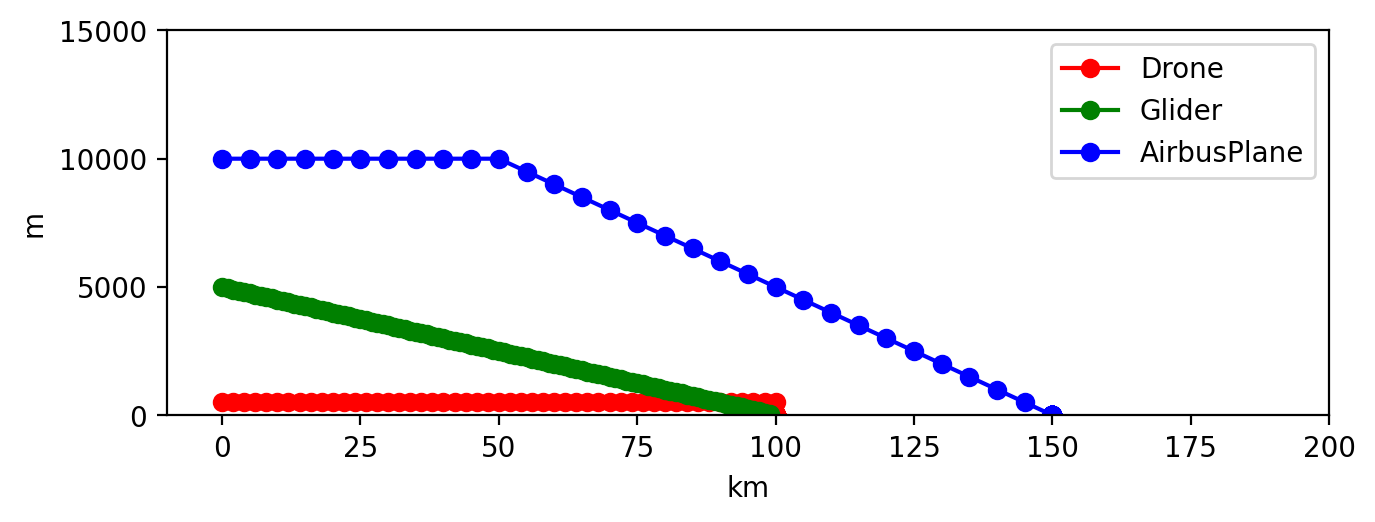

In [106]:
Xs = [planes_tup[0][0] for planes_tup in sim.planes_trajectories]
Ys = [planes_tup[0][1] for planes_tup in sim.planes_trajectories]
ax = plot_plane_trajectory(Xs, Ys, "Drone")
Xs = [planes_tup[1][0] for planes_tup in sim.planes_trajectories]
Ys = [planes_tup[1][1] for planes_tup in sim.planes_trajectories]
plot_plane_trajectory(Xs, Ys, "Glider", ax=ax)
Xs = [planes_tup[2][0] for planes_tup in sim.planes_trajectories]
Ys = [planes_tup[2][1] for planes_tup in sim.planes_trajectories]
plot_plane_trajectory(Xs, Ys, "AirbusPlane", ax=ax)
plt.show()